In [163]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os
path = os.path.dirname(os.getcwd())
path = os.path.dirname(path)
path = os.path.join(path, "/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData")
train = pd.read_csv(os.path.join(path,"merged_train.csv"))
test = pd.read_csv(os.path.join(path,"merged_test.csv"))

1보다 큰 지역

- 세종특별자치시
- 울산광역시 공공임대(10년)
- 대구광역시 공공임대(10년)
- 전라남도 영구임대 
- 전라남도 공공임대(10년)
- 강원도 공공임대(50년) 공공임대(10년) 행복주택 
- 경상남도 공공임대(50년)/공공임대(10년)
- 경상북도 국민임대 
- 서울특별시 
- 경기도 공공임대(10년)
- 대전광역시 공공임대(5년)/행복주택/공공분양/공공분양(분납)/공공임대(10년)
- 부산광역시 공공임대(50년)
- 전라북도 영구임대/공공임대(10년)/행복주택
- 충청남도 공공임대(50년)
- 충청북도 공공임대(50년)

1보다 작은 지역

- 울산광역시 국민임대
- 대구광역시 영구임대/행복주택
- 전라남도 행복주택 
- 강원도 영구임대 
- 경상남도 행복주택/ 영구임대
- 경상북도 행복주택 
- 경기도 행복주택/ 영구임대 
- 대전광역시 영구임대/공공임대(50년)
- 부산광역시 행복주택/영구임대/국민임대
- 광주광역시 영구임대
- 충청북도 영구임대/ 행복주택

In [90]:
train['공급유형'].unique()

array(['국민임대', '공공임대(50년)', '영구임대', '공공임대(10년)', '공공임대(분납)', '장기전세',
       '공공분양', '행복주택', '공공임대(5년)', '임대상가'], dtype=object)

In [165]:
tmp = train.groupby(['단지코드','임대건물구분']).count().iloc[:,:1].reset_index()
store = tmp[tmp['임대건물구분']=='상가'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'상가수'})
apt = tmp[tmp['임대건물구분']=='아파트'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'아파트수'})
total = pd.merge(apt,store,on='단지코드',how='left').fillna(0)
total['상가비율'] = total.apply(lambda x : x['상가수']/(x['아파트수']+x['상가수']),axis=1)
train = pd.merge(train,total[['단지코드','상가비율']],on='단지코드',how='left')

tmp = test.groupby(['단지코드','임대건물구분']).count().iloc[:,:1].reset_index()
store = tmp[tmp['임대건물구분']=='상가'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'상가수'})
apt = tmp[tmp['임대건물구분']=='아파트'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'아파트수'})
total = pd.merge(apt,store,on='단지코드',how='left').fillna(0)
total['상가비율'] = total.apply(lambda x : x['상가수']/(x['아파트수']+x['상가수']),axis=1)
test = pd.merge(test,total[['단지코드','상가비율']],on='단지코드',how='left')

In [166]:
train = train[train['임대건물구분']=='아파트']
test = test[test['임대건물구분']=='아파트']

In [167]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [168]:
train.shape

(2334, 35)

In [169]:
area = ['경상남도', '전라북도', '강원도', '광주광역시', '충청남도', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '세종특별자치시']
for ind in range(train.shape[0]):
    if train.loc[ind,'지역'] in area :
        train.loc[ind,'환승역 수'] = 0

area = ['경상남도', '전라북도', '강원도', '광주광역시', '충청남도', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '세종특별자치시']
for ind in range(test.shape[0]):
    if test.loc[ind,'지역'] in area :
        test.loc[ind,'환승역 수'] = 0

In [170]:
train['공가비율'] = train.apply(lambda x : x['공가수']/x['총세대수'],axis=1)
test['공가비율'] = test.apply(lambda x : x['공가수']/x['총세대수'],axis=1)

In [171]:
train['0~19 인구수'] = train['0~19세_비율']*train['총세대수']
train['20~39 인구수'] = train['20~39세_비율']*train['총세대수']
train['40~69 인구수'] = train['40~69세_비율']*train['총세대수']
train['70세이상 인구수'] = train['70세이상_비율']*train['총세대수']

test['0~19 인구수'] = test['0~19세_비율']*test['총세대수']
test['20~39 인구수'] = test['20~39세_비율']*test['총세대수']
test['40~69 인구수'] = test['40~69세_비율']*test['총세대수']
test['70세이상 인구수'] = test['70세이상_비율']*test['총세대수']

In [172]:
def func(x):
    for i in range(10,90,10):
        if int(x) in range(i,i+10):
            return i+5

train['전용면적'] = train['전용면적'].apply(lambda x : func(x))
test['전용면적'] = test['전용면적'].apply(lambda x : func(x))

In [173]:
train = train.join(pd.get_dummies(train['공급유형']))
test = test.join(pd.get_dummies(test['공급유형']))
test['공공분양'] = 0
test['공공임대(5년)'] = 0 
test['장기전세'] = 0

In [174]:
not_unique = ['자격유형','임대보증금','임대료','전용면적별세대수','전용면적','공급유형']

In [176]:
tmp1 = train.drop(not_unique,axis=1).drop_duplicates()

tmp = pd.DataFrame(train.groupby(['단지코드','전용면적','공급유형']).sum()['전용면적별세대수']).reset_index()
tmp = pd.merge(tmp,tmp1.drop_duplicates(),on='단지코드',how='left')
total = pd.DataFrame(tmp.groupby('단지코드').sum()['전용면적별세대수']).reset_index(drop=False).rename(columns={'전용면적별세대수':'total'})
tmp = pd.merge(tmp,total,on='단지코드',how='left')
tmp['ratio'] = tmp.apply(lambda x : x['전용면적별세대수']/x['total'],axis=1)
tmp['y1'] = tmp.apply(lambda x : x['ratio']*x['등록차량수'],axis=1)

total = pd.DataFrame(train.groupby(['단지코드','전용면적','공급유형']).mean()['임대료']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

total = pd.DataFrame(train.groupby(['단지코드','전용면적','공급유형']).mean()['임대보증금']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

tmp['단지내주차면수_new'] = tmp.apply(lambda x : x['단지내주차면수']*x['ratio'],axis=1)
tmp = tmp.drop(['ratio'],axis=1)

train = tmp
train['y2'] = train.apply(lambda x : x['y1']/x['단지내주차면수_new'],axis=1)

In [177]:
tmp1 = test.drop(not_unique,axis=1).drop_duplicates()

tmp = pd.DataFrame(test.groupby(['단지코드','전용면적','공급유형']).sum()['전용면적별세대수']).reset_index()
tmp = pd.merge(tmp,tmp1.drop_duplicates(),on='단지코드',how='left')
total = pd.DataFrame(tmp.groupby('단지코드').sum()['전용면적별세대수']).reset_index(drop=False).rename(columns={'전용면적별세대수':'total'})
tmp = pd.merge(tmp,total,on='단지코드',how='left')
tmp['ratio'] = tmp.apply(lambda x : x['전용면적별세대수']/x['total'],axis=1)

total = pd.DataFrame(test.groupby(['단지코드','전용면적','공급유형']).mean()['임대료']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

total = pd.DataFrame(test.groupby(['단지코드','전용면적','공급유형']).mean()['임대보증금']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

tmp['단지내주차면수_new'] = tmp.apply(lambda x : x['단지내주차면수']*x['ratio'],axis=1)
tmp = tmp.drop(['ratio'],axis=1)

test = tmp

In [178]:
train['0~19 인구수'] = train['0~19세_비율']*train['전용면적별세대수']
train['20~39 인구수'] = train['20~39세_비율']*train['전용면적별세대수']
train['40~69 인구수'] = train['40~69세_비율']*train['전용면적별세대수']
train['70세이상 인구수'] = train['70세이상_비율']*train['전용면적별세대수']

test['0~19 인구수'] = test['0~19세_비율']*test['전용면적별세대수']
test['20~39 인구수'] = test['20~39세_비율']*test['전용면적별세대수']
test['40~69 인구수'] = test['40~69세_비율']*test['전용면적별세대수']
test['70세이상 인구수'] = test['70세이상_비율']*test['전용면적별세대수']

col = ['0~19세_비율','20~39세_비율','40~69세_비율','70세이상_비율']
train = train.drop(col,axis=1)
test = test.drop(col,axis=1)

In [108]:
train.columns

Index(['단지코드', '전용면적', '공급유형', '전용면적별세대수', '총세대수', '임대건물구분', '지역', '공가수',
       '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명', '도로명주소', '연면적', '위도', '경도',
       'subway_name', 'subway_dist', '환승역 수', '총인구수', '세대당_인구', '남/여비율',
       '남/여_0~19세', '남/여_20~39세', '남/여_40~69세', '남/여_70세이상', '상가비율', '공가비율',
       '0~19 인구수', '20~39 인구수', '40~69 인구수', '70세이상 인구수', '공공분양', '공공임대(10년)',
       '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대', '장기전세', '행복주택',
       'total', 'y1', '임대료', '임대보증금', '단지내주차면수_new', 'y2'],
      dtype='object')

In [80]:
# import smogn
# sns.kdeplot(train['y2'], label = "Original")
# sns.kdeplot(tr_smogn['y2'], label = "Modified")
# tr_smogn = smogn.smoter(
    
#     data = train,  ## pandas dataframe
#     y = 'y2',  ## string ('header name')
#      samp_method = 'extreme'
    

# )

r_index: 100%|##########| 61/61 [00:00<00:00, 281.95it/s]


In [21]:
train.corr()['y2']

전용면적           0.272737
전용면적별세대수      -0.072524
총세대수          -0.145421
공가수           -0.265737
지하철역          -0.063657
버스정류장          0.036348
단지내주차면수       -0.050276
등록차량수          0.363013
연면적            0.005723
위도            -0.041786
경도             0.083341
subway_dist   -0.000263
환승역 수         -0.039037
총인구수          -0.082692
세대당_인구         0.039506
남/여비율          0.006577
남/여_0~19세     -0.020200
남/여_20~39세     0.015812
남/여_40~69세    -0.022726
남/여_70세이상      0.016666
상가비율          -0.137332
공가비율          -0.099302
0~19 인구수      -0.050625
20~39 인구수     -0.067115
40~69 인구수     -0.074199
70세이상 인구수     -0.084072
공공분양           0.083793
공공임대(10년)      0.270612
공공임대(50년)      0.138447
공공임대(5년)       0.028804
공공임대(분납)       0.060542
국민임대          -0.060507
영구임대          -0.148812
장기전세           0.002327
행복주택          -0.074147
total         -0.013923
y1             0.300276
임대료            0.273141
임대보증금          0.084868
단지내주차면수_new   -0.004911
y2             1.000000
Name: y2, dtype:

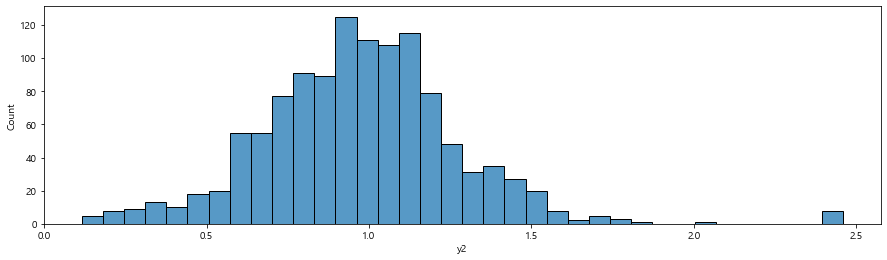

In [104]:
fig,ax = plt.subplots(figsize=(15,4))
sns.histplot(train['y2'])

In [30]:
train[train['y2']>2][['단지코드','y1','단지내주차면수_new','y2']] 

단지코드           y1  단지내주차면수_new        y2
7    C2086   780.598315   584.936533  2.001751
8    C2086   374.513984   280.639744  2.001751
9    C2086   335.439741   251.359701  2.001751
10   C2086   351.362772   263.291526  2.001751
11   C2086   390.298865   292.468047  2.001751
15   C1544   455.758860   340.700522  2.006567
18   C1642   133.662964    99.909691  2.006757
22   C1940   208.598649   155.051464  2.018027
24   C1940   332.030253   246.798227  2.018027
28   C1163   157.689462   115.606692  2.046025
31   C1163   124.993080    91.636031  2.046025
38   C1803    26.349573    19.255457  2.052632
39   C1803    25.608226    18.713704  2.052632
40   C1803    26.028687    19.020963  2.052632
41   C1803    26.520000    19.380000  2.052632
43   C1803    26.520000    19.380000  2.052632
51   C2496   860.863824   611.828218  2.110553
58   C2336   207.442698   147.276934  2.112782
60   C2336   220.796624   156.757746  2.112782
65   C1468   496.078622   351.542135  2.116725
68   C1350   191.677373   135.457530  2.122555
70   C1350   188.372591   133.122056  2.122555
77   C1350   262.179396   185.280990  2.122555
80   C1350   188.372591   133.122056  2.122555
81   C1350   188.372591   133.122056  2.122555
83   C1350   191.677373   135.457530  2.122555
84   C1350   191.677373   135.457530  2.122555
87   C1350   129.437307    91.472758  2.122555
89   C1350   129.437307    91.472758  2.122555
91   C1350   129.437307    91.472758  2.122555
97   C1363   295.844939   208.599686  2.127364
98   C1363   285.644807   201.407594  2.127364
99   C1363   354.106045   249.679478  2.127364
100  C1363   291.088218   205.245731  2.127364
101  C1363   367.406542   259.057632  2.127364
102  C1363   285.373625   201.216383  2.127364
103  C1363   367.406542   259.057632  2.127364
107  C1363   273.072430   192.542835  2.127364
111  C1363   354.497664   249.955607  2.127364
115  C1732    88.402898    62.246235  2.130319
116  C1732    82.980427    58.428166  2.130319
129  C1933   890.068122   618.417273  2.158902
130  C1402   182.498801   126.063429  2.171512
134  C1402   189.044723   130.585110  2.171512
135  C1402   157.632818   108.886927  2.171512
136  C1970    54.346226    36.914418  2.208333
141  C1970    54.610669    37.094039  2.208333
153  C2099    65.053116    43.821682  2.226744
155  C2099   116.035750    78.165075  2.226744
156  C1013   727.691501   489.061135  2.231903
160  C1013   347.626200   233.629861  2.231903
161  C1013   356.191876   239.386612  2.231903
168  C2096   264.032632   174.512997  2.269452
169  C2096   260.561873   172.218990  2.269452
174  C2595   951.913649   628.305035  2.272575
177  C2595   299.392661   197.612375  2.272575
200  C2620   493.390928   306.312332  2.416117
202  C2620   482.048847   299.270817  2.416117
203  C2620   504.036219   312.921257  2.416117
205  C2620   629.569810   390.856389  2.416117
211  C2040   101.045344    60.146038  2.520000
214  C2405   455.915990   267.666807  2.554945
220  C1743   565.049574   322.690138  2.626589
221  C1743   519.966967   296.944233  2.626589
224  C1743   412.594849   235.625855  2.626589
225  C1743   364.414184   208.110702  2.626589
228  C2601   431.051485   203.322083  2.060222
229  C2601   417.362569   205.959540  2.044750
230  C1722    60.212329    24.493151  3.687500
231  C1722    56.478324    22.974233  2.458333
232  C1722    65.200137    26.522090  2.458333
233  C1722    63.744953    25.930150  2.458333
234  C1722    50.568981    20.570433  2.458333
235  C1722    60.212329    24.493151  3.687500
236  C1722    37.457776    15.237061  2.458333
237  C1722    60.212329    24.493151  3.687500
238  C1722    35.965753    14.630137  3.687500
239  C1722    45.948174    18.690783  2.458333
240  C1722   139.823577    56.877387  2.458333
241  C1722   152.460677    62.017903  3.687500
242  C1722    63.215275    25.714688  3.687500
243  C1722   123.775955    50.349541  3.687500
244  C1722   164.719707    67.004626  2.458333
245  C1722   146.346246    59.530676  3.687500
249  C1350 

In [110]:
train = train[train['단지코드']!='C1722']
train = train.reset_index(drop=True)

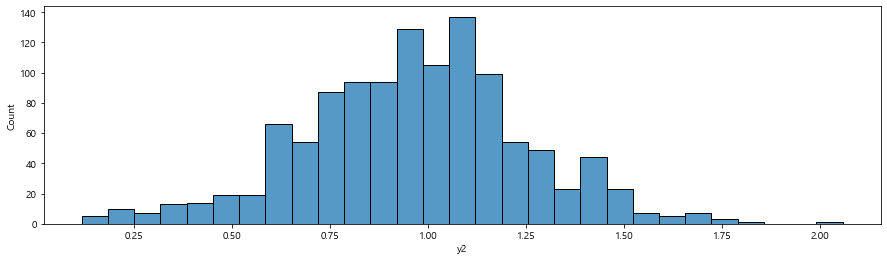

In [107]:
fig,ax = plt.subplots(figsize=(15,4))
sns.histplot(train['y2'])

In [111]:
q = list(train.y2.quantile([0,.34,.66,1.0]))
q
train["y_class"] = [99]*len(train)
for i in range(len(q[:-1])):
    train.loc[(train.y2>=q[i])&(train.y2<q[i+1]),"y_class"] = i
train.loc[train.y2==q[3],"y_class"] = 2

In [128]:
coll = list(set(train.columns) - set(['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','total','단지내주차면수','y1','y2','위도','경도','공급유형','연면적','단지내주차면수_new','index']))

In [130]:
coll

['지하철역',
 '행복주택',
 '환승역 수',
 '전용면적',
 '상가비율',
 'y_class',
 '버스정류장',
 '공공임대(10년)',
 '40~69 인구수',
 '총세대수',
 'subway_dist',
 '총인구수',
 '남/여_70세이상',
 '0~19 인구수',
 '남/여_40~69세',
 '공공임대(분납)',
 '전용면적별세대수',
 '남/여비율',
 '공가비율',
 '공공임대(5년)',
 '20~39 인구수',
 '장기전세',
 '공공임대(50년)',
 '국민임대',
 '70세이상 인구수',
 '임대료',
 '공가수',
 '세대당_인구',
 '지역',
 '남/여_20~39세',
 '임대보증금',
 '영구임대',
 '공공분양',
 '남/여_0~19세']

In [160]:
coll

['지하철역',
 '행복주택',
 '환승역 수',
 '전용면적',
 '상가비율',
 'y_class',
 '버스정류장',
 '공공임대(10년)',
 '40~69 인구수',
 '총세대수',
 'subway_dist',
 '총인구수',
 '남/여_70세이상',
 '0~19 인구수',
 '남/여_40~69세',
 '공공임대(분납)',
 '전용면적별세대수',
 '남/여비율',
 '공가비율',
 '공공임대(5년)',
 '20~39 인구수',
 '장기전세',
 '공공임대(50년)',
 '국민임대',
 '70세이상 인구수',
 '임대료',
 '공가수',
 '세대당_인구',
 '지역',
 '남/여_20~39세',
 '임대보증금',
 '영구임대',
 '공공분양',
 '남/여_0~19세']

In [218]:
raw = pd.read_csv(os.path.join(path,"merged_train.csv"))

In [227]:
get_uni = raw.groupby(["단지코드","공급유형"]).sum().reset_index()[["단지코드","공급유형"]]

In [228]:
")

단지코드       공급유형
0    C1000       국민임대
1    C1004       영구임대
2    C1004       임대상가
3    C1005       국민임대
4    C1013       국민임대
5    C1014       국민임대
6    C1015       국민임대
7    C1017       국민임대
8    C1022       국민임대
9    C1024  공공임대(10년)
10   C1026       국민임대
11   C1027       국민임대
12   C1032       국민임대
13   C1036       국민임대
14   C1039       국민임대
15   C1039       영구임대
16   C1039       장기전세
17   C1045       국민임대
18   C1046       국민임대
19   C1048       국민임대
20   C1049       국민임대
21   C1056       영구임대
22   C1056       임대상가
23   C1057       국민임대
24   C1059       국민임대
25   C1065       국민임대
26   C1068       국민임대
27   C1077       국민임대
28   C1084       국민임대
29   C1085       국민임대
30   C1089       국민임대
31   C1102       국민임대
32   C1103       국민임대
33   C1109       영구임대
34   C1109       임대상가
35   C1122       국민임대
36   C1129  공공임대(10년)
37   C1131       국민임대
38   C1133       국민임대
39   C1136       국민임대
40   C1141       국민임대
41   C1143       국민임대
42   C1155       국민임대
43   C1156       행복주택
44   C1163       국민임대
45   C1171       국민임대
46   C1173       국민임대
47   C1175       국민임대
48   C1176       국민임대
49   C1177       국민임대
50   C1180       국민임대
51   C1184       국민임대
52   C1194       국민임대
53   C1206       영구임대
54   C1206       임대상가
55   C1207       행복주택
56   C1210       행복주택
57   C1213       국민임대
58   C1227       국민임대
59   C1234       국민임대
60   C1236       국민임대
61   C1244       국민임대
62   C1258       국민임대
63   C1258       영구임대
64   C1263       국민임대
65   C1268       국민임대
66   C1269       국민임대
67   C1281       국민임대
68   C1284  공공임대(10년)
69   C1286  공공임대(10년)
70   C1301       국민임대
71   C1307       국민임대
72   C1309       국민임대
73   C1310       국민임대
74   C1312       국민임대
75   C1316       국민임대
76   C1319       국민임대
77   C1320       국민임대
78   C1326       국민임대
79   C1328       국민임대
80   C1329       국민임대
81   C1338       국민임대
82   C1340       국민임대
83   C1341       국민임대
84   C1341       영구임대
85   C1343       국민임대
86   C1344  공공임대(10년)
87   C1344   공공임대(분납)
88   C1350       공공분양
89   C1350  공공임대(10년)
90   C1350   공공임대(분납)
91   C1357  공공임대(10년)
92   C1360       국민임대
93   C1363       국민임대
94   C1363       영구임대
95   C1365       국민임대
96   C1368       국민임대
97   C1375       국민임대
98   C1379       국민임대
99   C1386       국민임대
100  C1394       국민임대
101  C1402  공공임대(10년)
102  C1406       국민임대
103  C1407       국민임대
104  C1410       국민임대
105  C1424  공공임대(50년)
106  C1426       국민임대
107  C1428       국민임대
108  C1430       국민임대
109  C1439       영구임대
110  C1439       임대상가
111  C1448       국민임대
112  C1451       국민임대
113  C1451       영구임대
114  C1455       국민임대
115  C1465       국민임대
116  C1468       국민임대
117  C1470       국민임대
118  C1476       영구임대
119  C1476       임대상가
120  C1487       국민임대
121  C1490  공공임대(10년)
122  C1492       국민임대
123  C1497  공공임대(50년)
124  C1516       국민임대
125  C1519       국민임대
126  C1527       국민임대
127  C1537       국민임대
128  C1544  공공임대(10년)
129  C1565       행복주택
130  C1566       국민임대
131  C1569       국민임대
132  C1572       국민임대
133  C1579       국민임대
134  C1584       행복주택
135  C1585       국민임대
136  C1592       국민임대
137  C1601       국민임대
138  C1613       국민임대
139  C1616       영구임대
140  C1616       임대상가
141  C1620       국민임대
142  C1636  공공임대(10년)
143  C1638       국민임대
144  C1641       국민임대
145  C1642       국민임대
146  C1649  공공임대(10년)
147  C1649       국민임대
148  C1652       행복주택
149  C1655       국민임대
150  C1656       국민임대
151  C1659       행복주택
152  C1660       국민임대
153  C1663       국민임대
154  C1666       국민임대
155  C1668       국민임대
156  C1672       국민임대
157  C1673       국민임대
158  C1674       국민임대
159  C1677       국민임대
160  C1681       국민임대
161  C1685       행복주택
162  C1687       국민임대
163  C1689       국민임대
164  C1693       국민임대
165  C1695       행복주택
166  C1697  공공임대(10년)
167  C1698       영구임대
168  C1698       임대상가
169  C1699       국민임대
170  C1700  공공임대(10년)
171  C1704       영구임대
172  C1704       임대상가
173  C1706       국민임대
174  C1713       국민임대
175  C1718       국민임대
176  C1722  공공임대(50년)
177  C1722       영구임대
178  C1722       임대상가
179  C1724       국민임대
180  C1724       영구임대
18

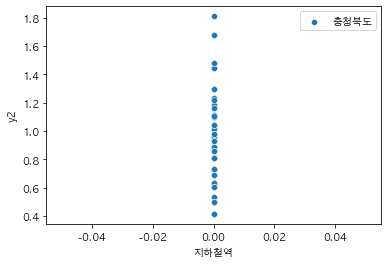

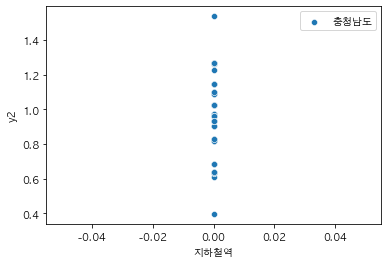

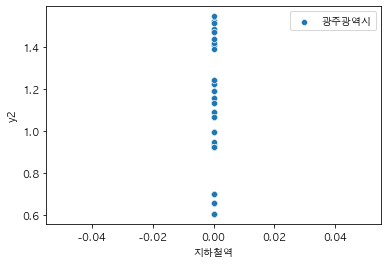

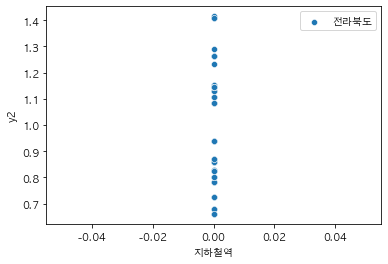

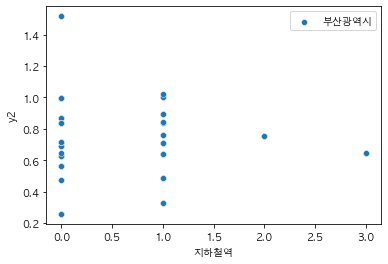

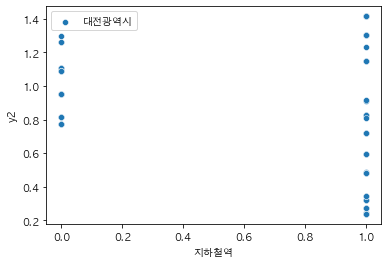

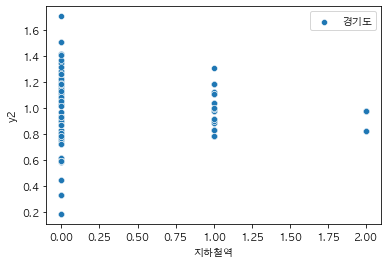

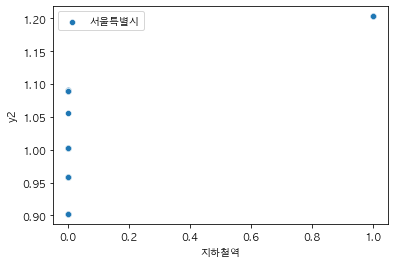

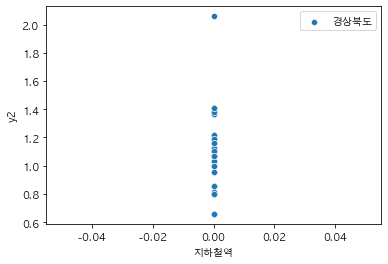

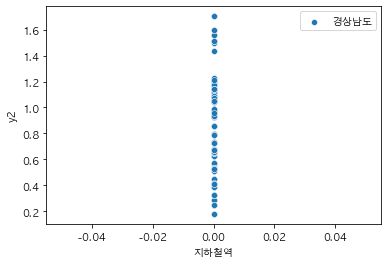

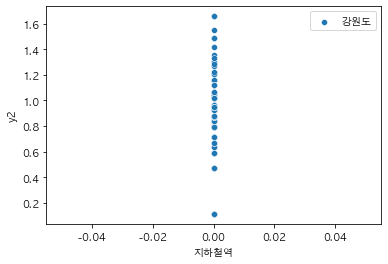

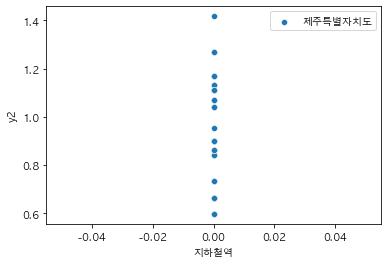

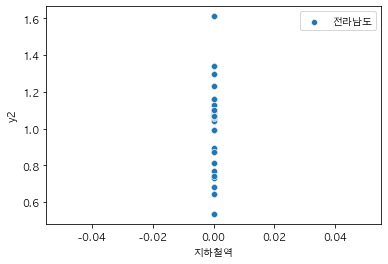

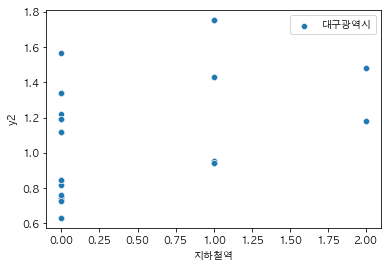

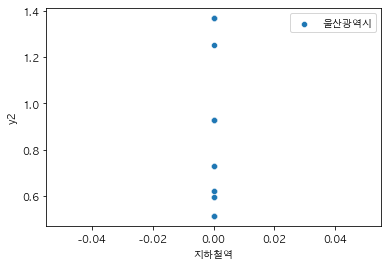

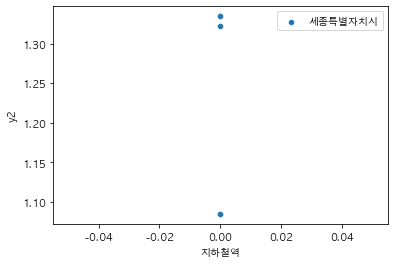

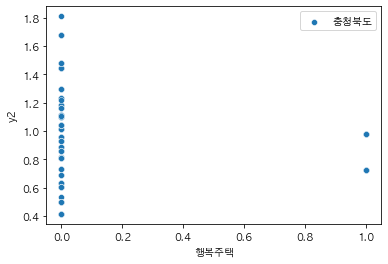

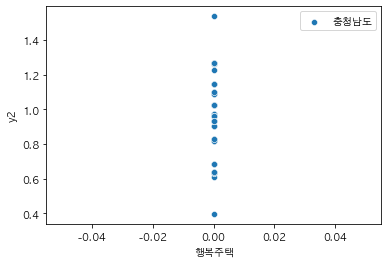

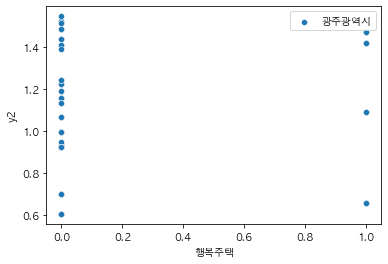

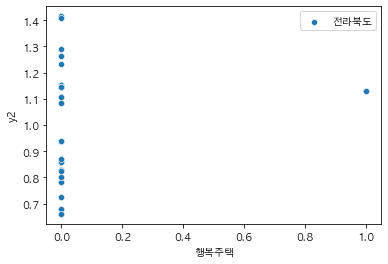

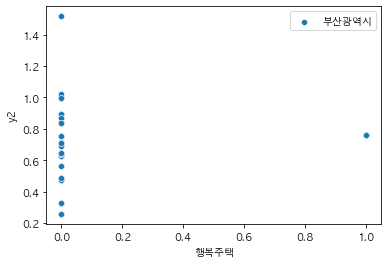

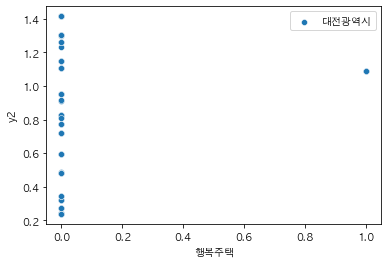

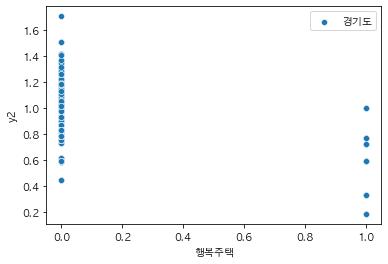

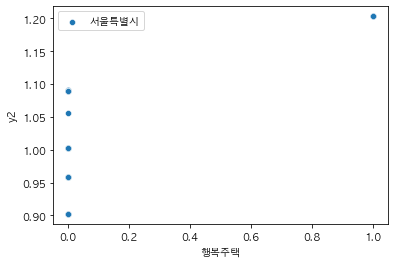

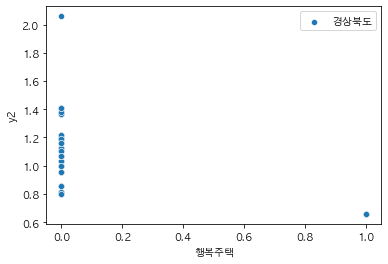

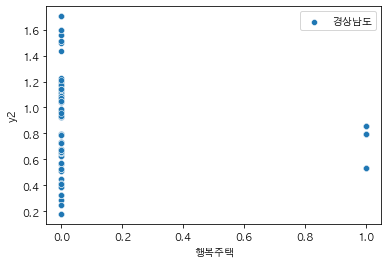

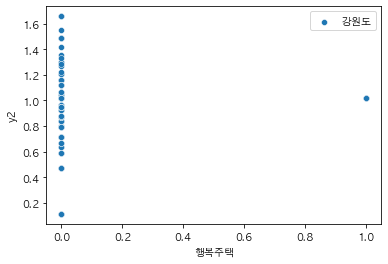

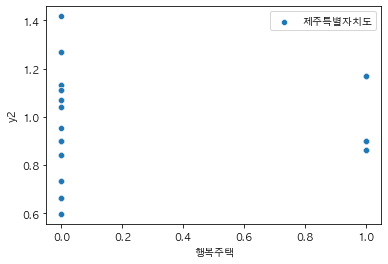

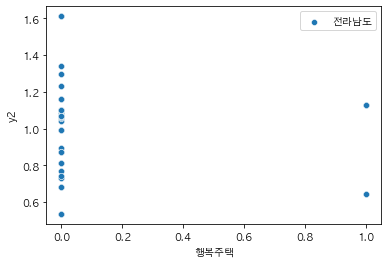

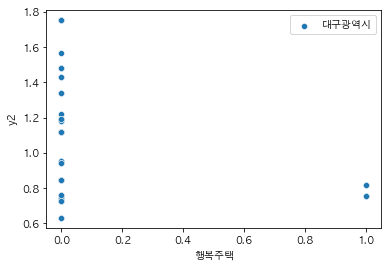

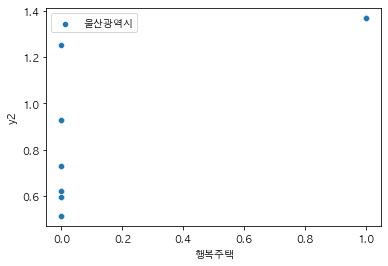

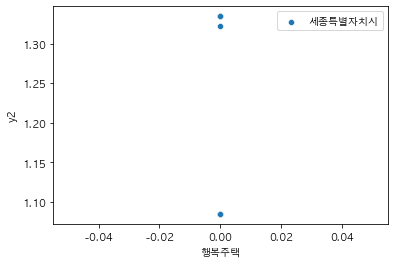

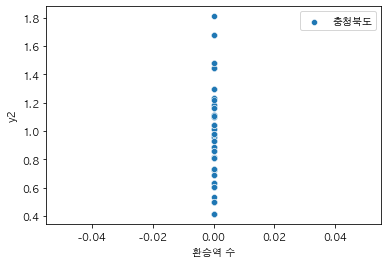

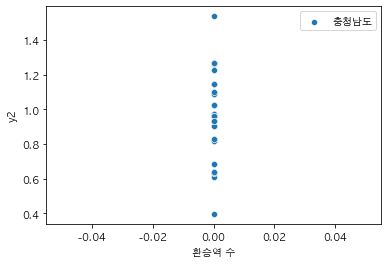

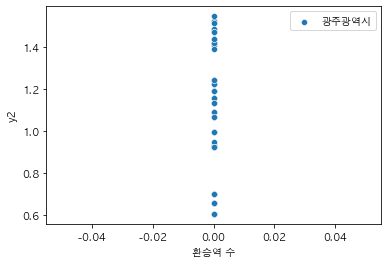

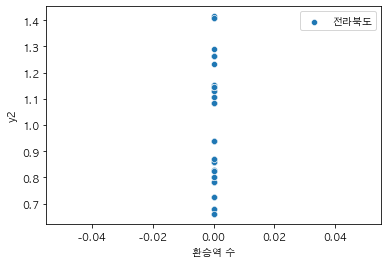

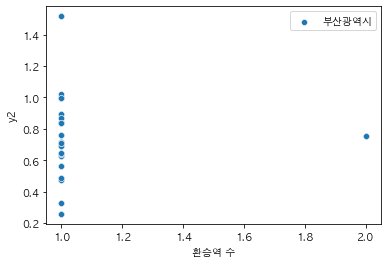

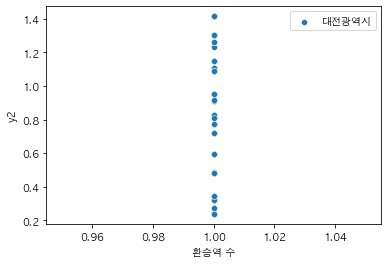

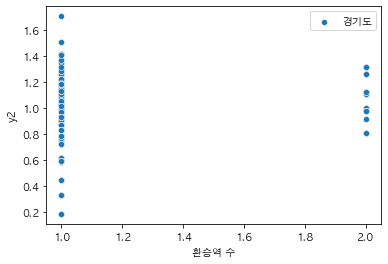

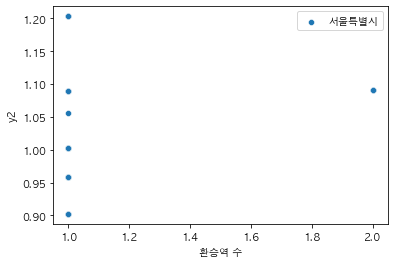

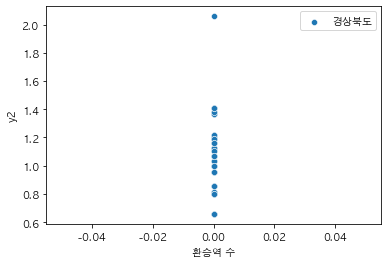

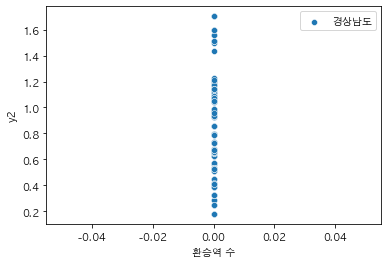

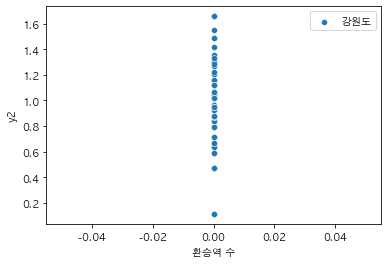

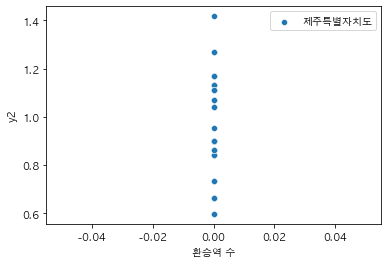

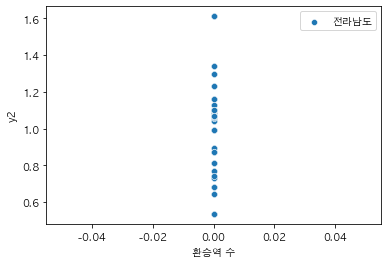

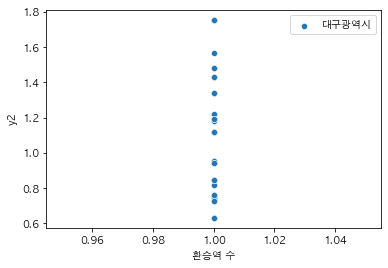

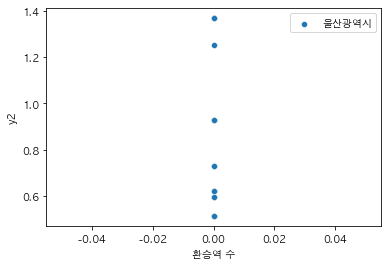

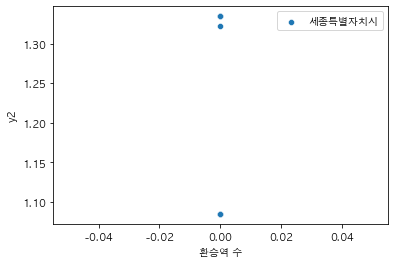

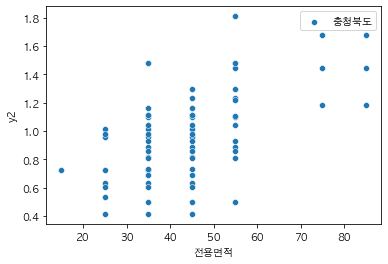

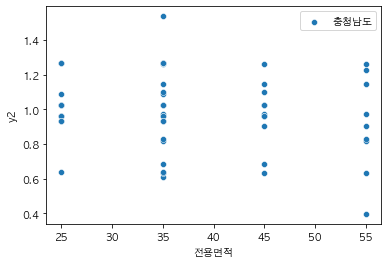

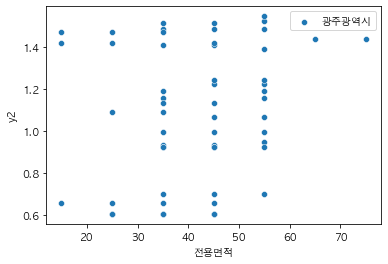

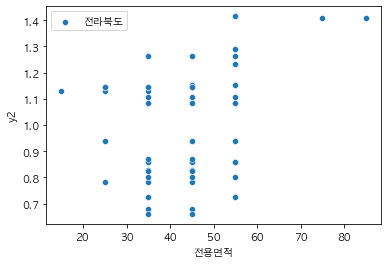

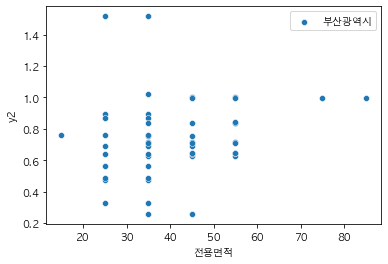

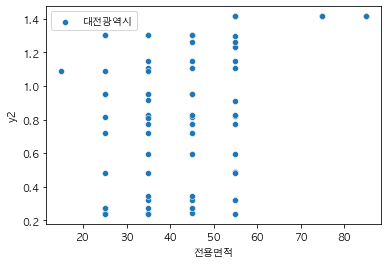

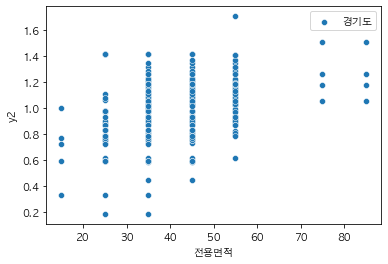

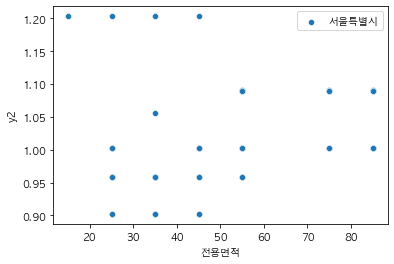

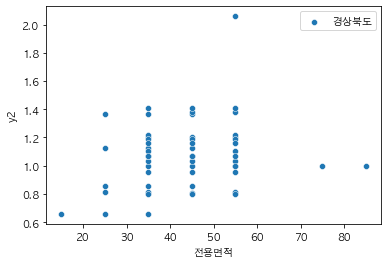

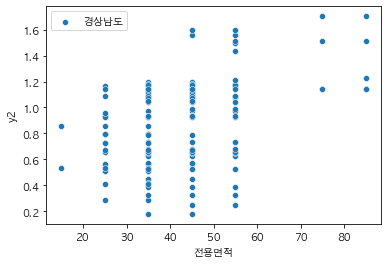

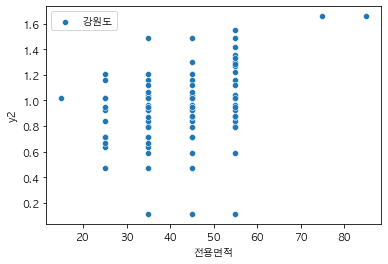

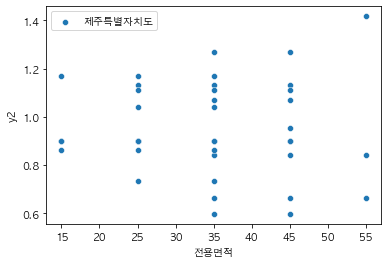

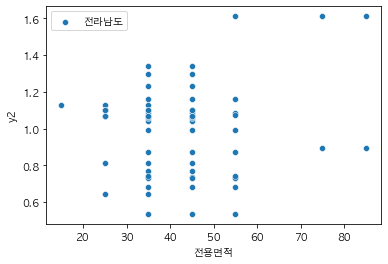

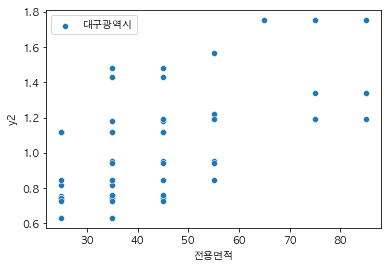

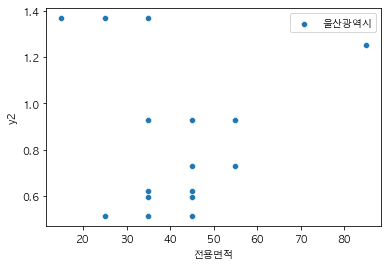

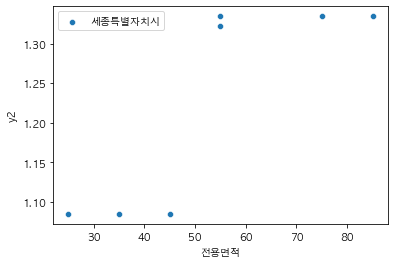

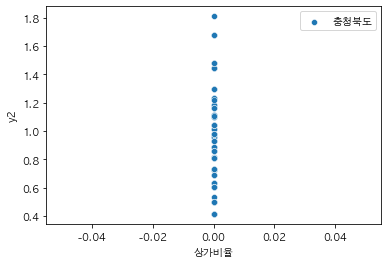

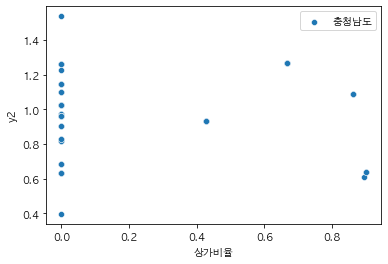

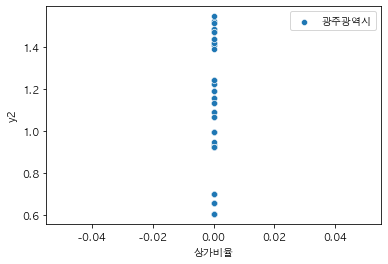

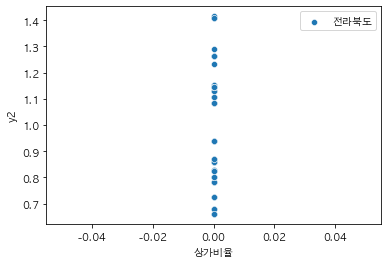

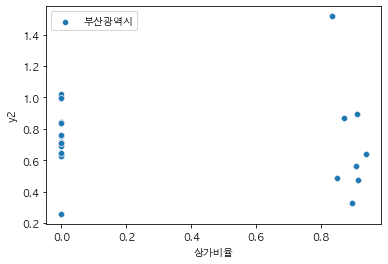

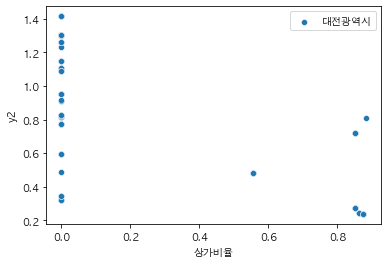

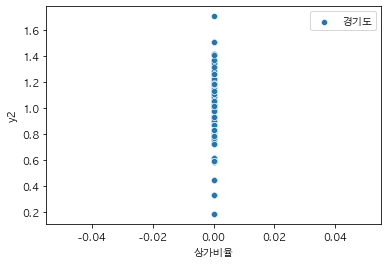

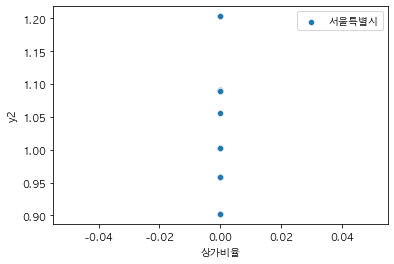

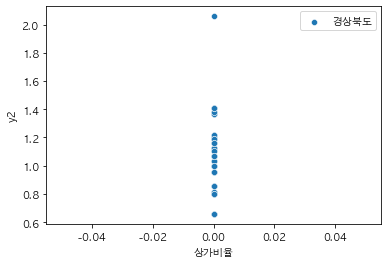

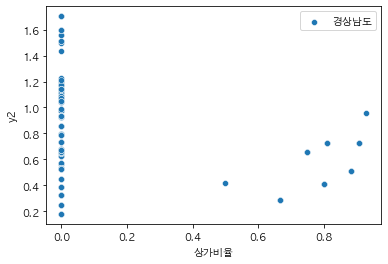

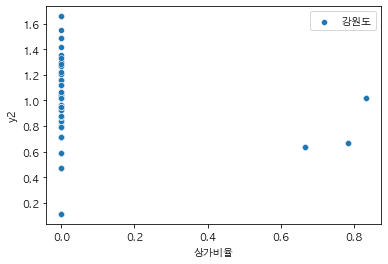

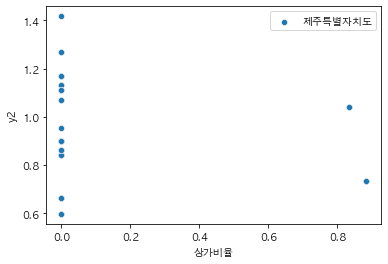

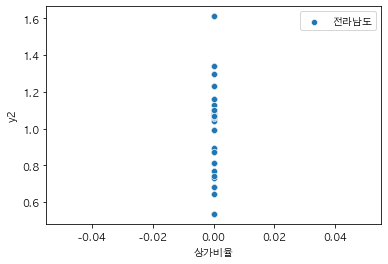

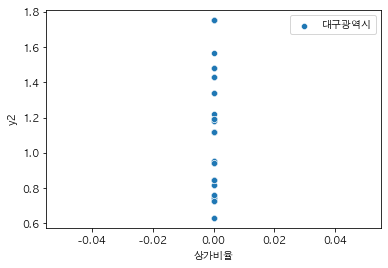

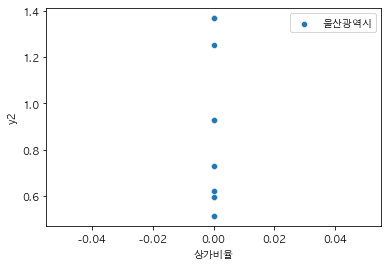

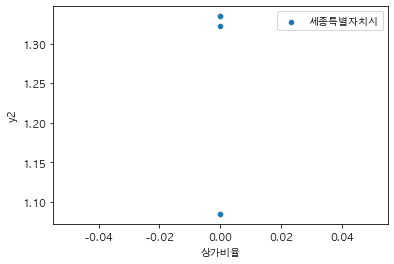

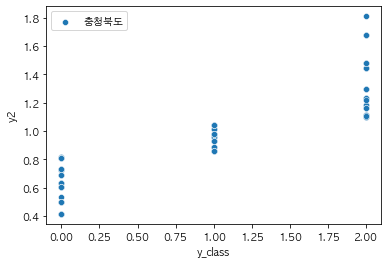

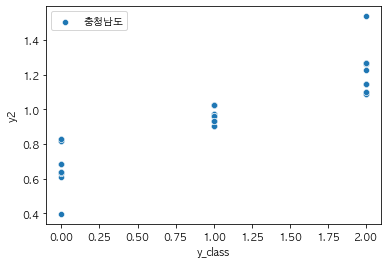

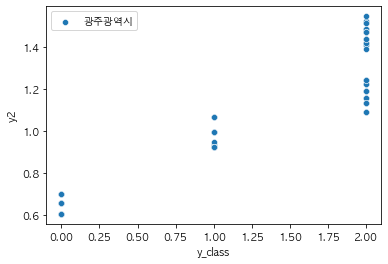

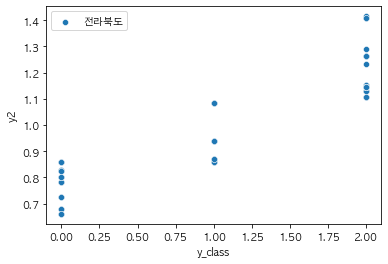

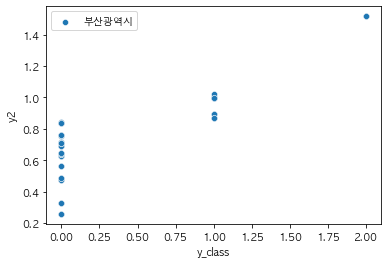

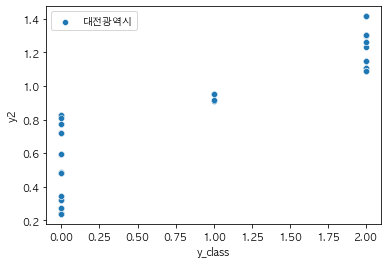

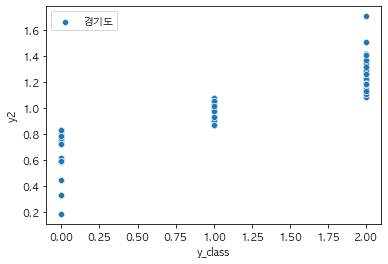

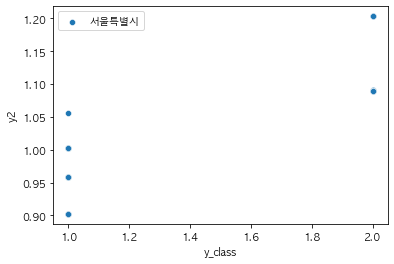

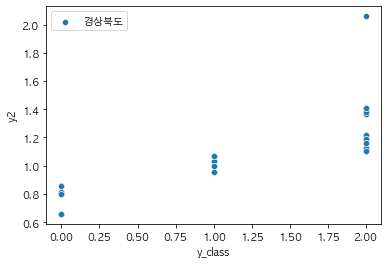

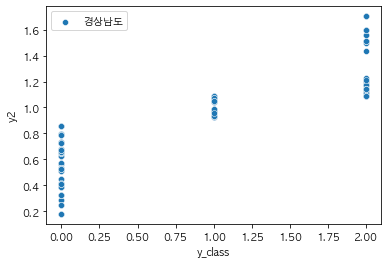

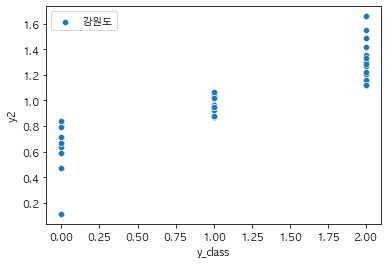

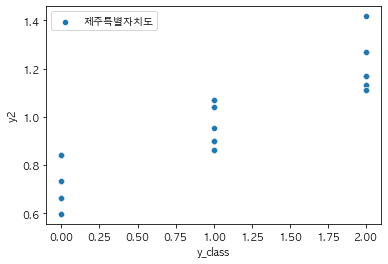

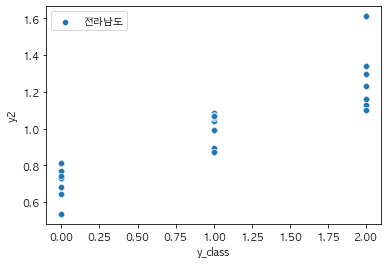

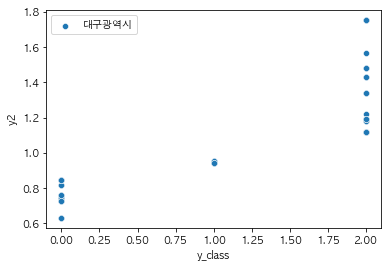

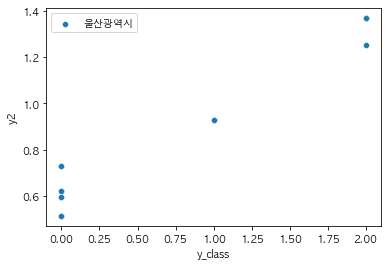

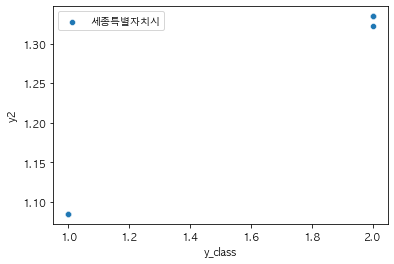

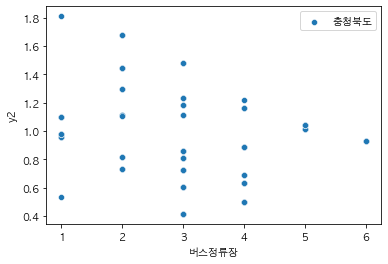

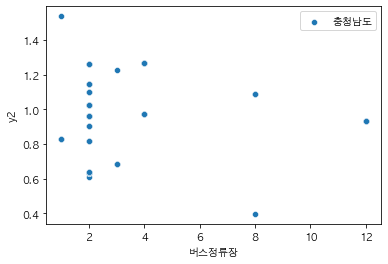

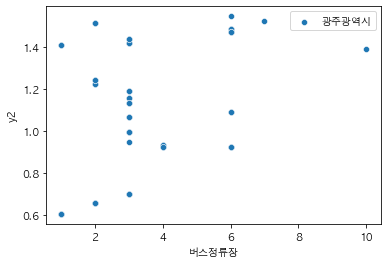

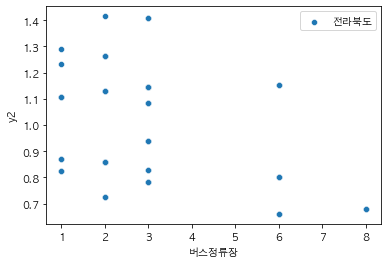

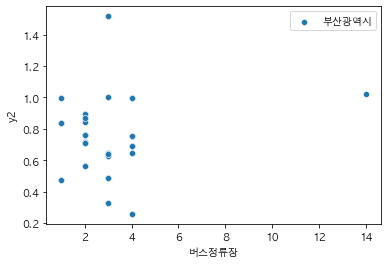

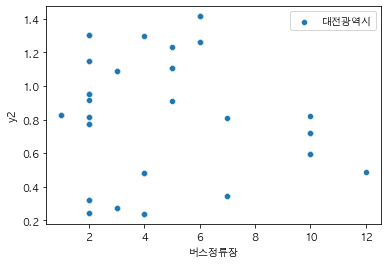

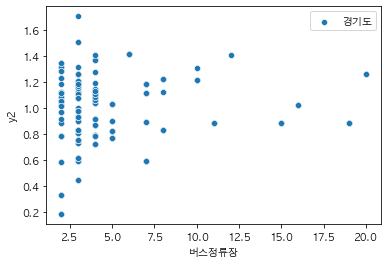

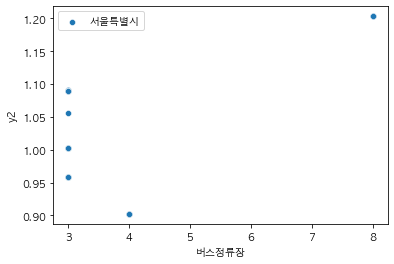

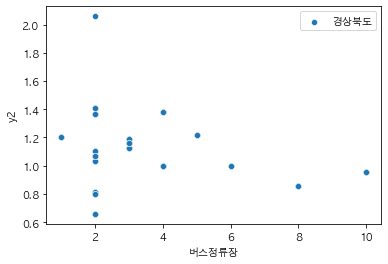

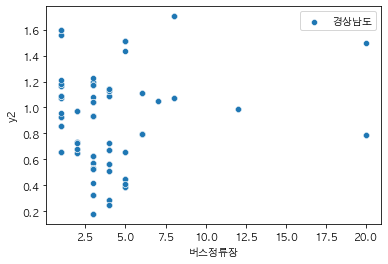

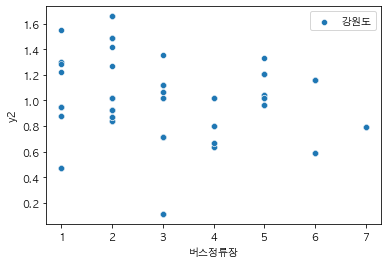

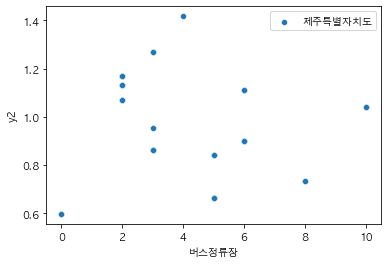

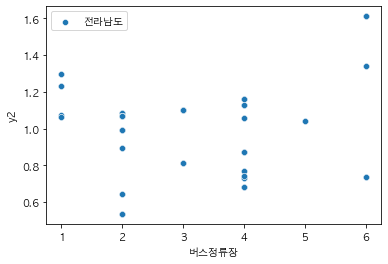

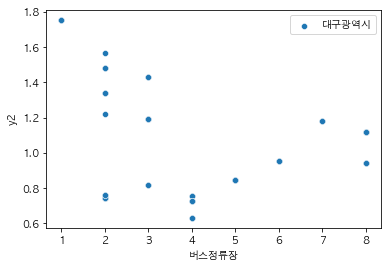

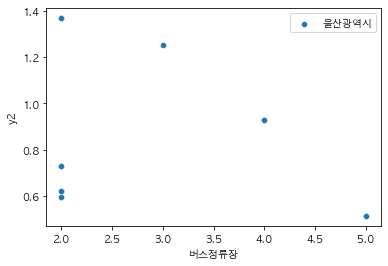

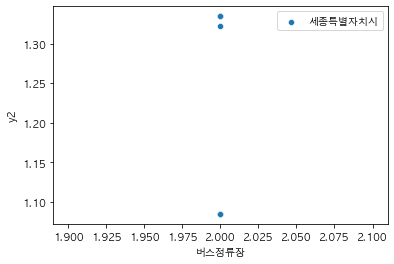

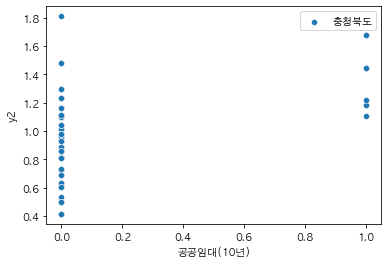

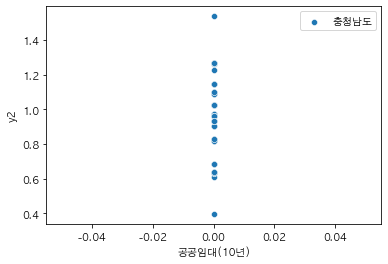

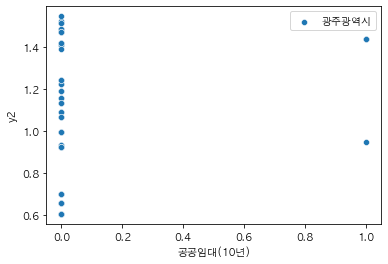

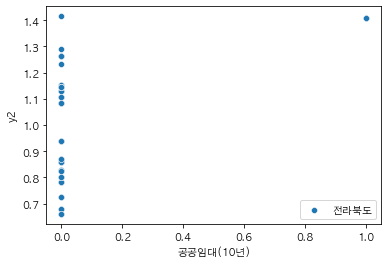

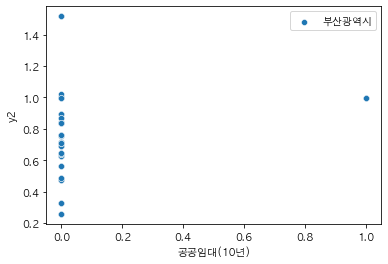

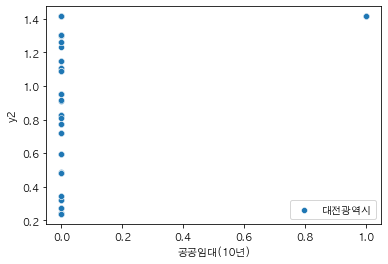

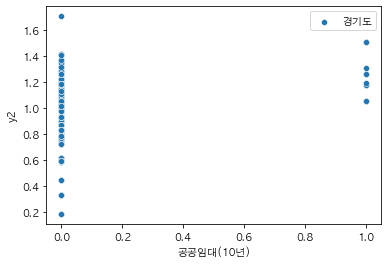

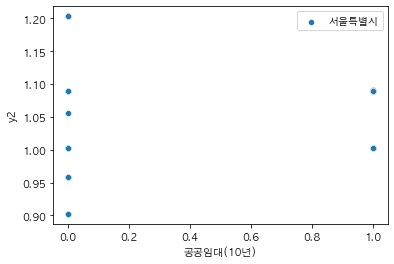

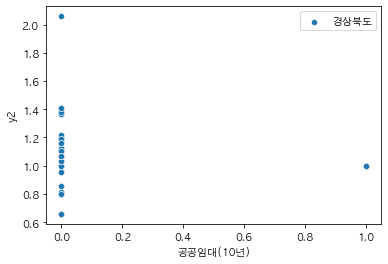

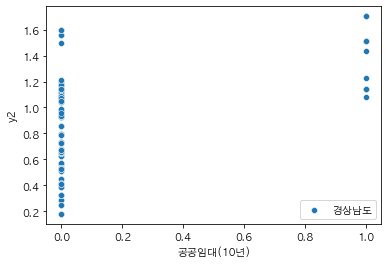

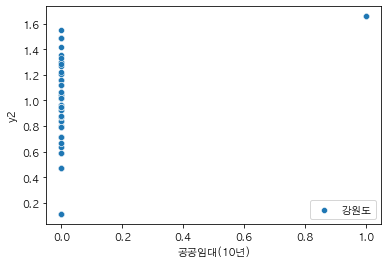

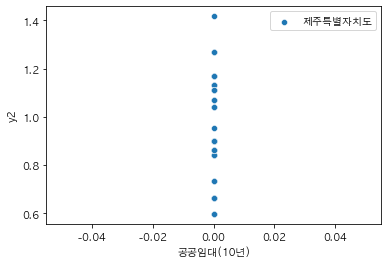

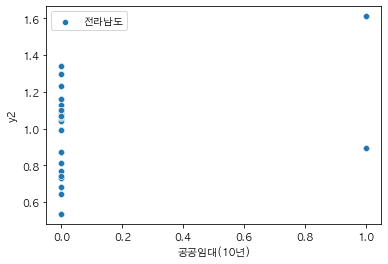

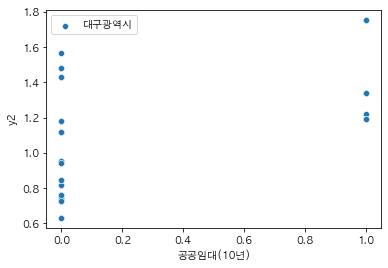

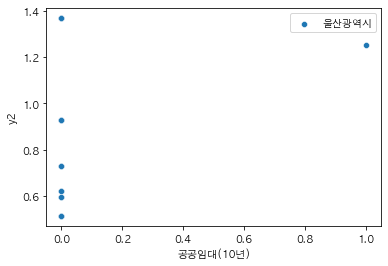

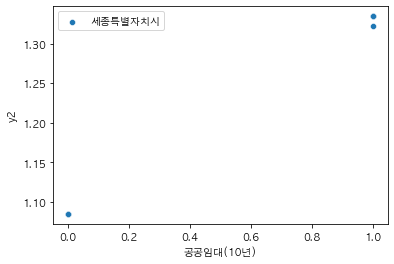

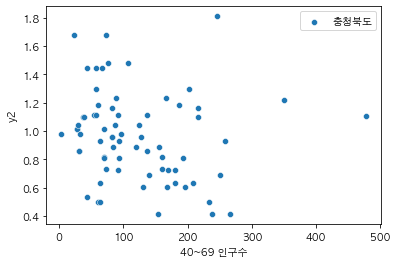

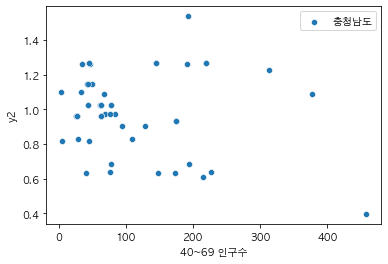

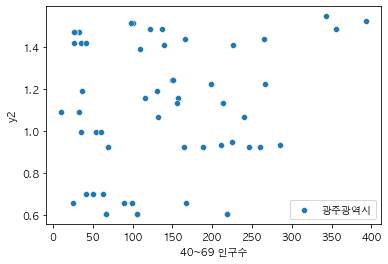

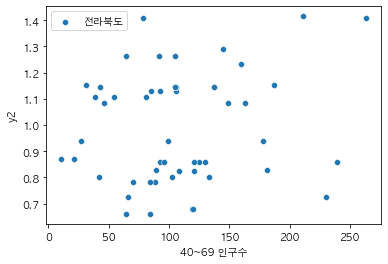

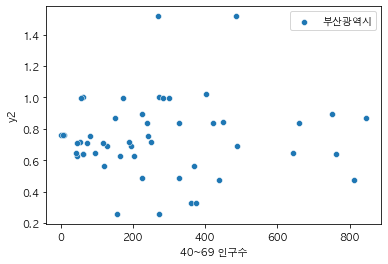

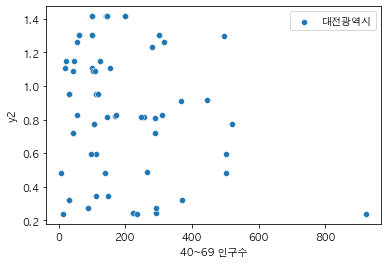

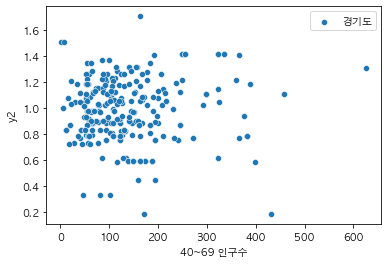

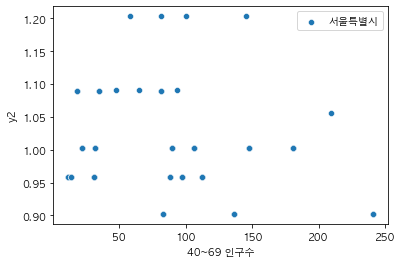

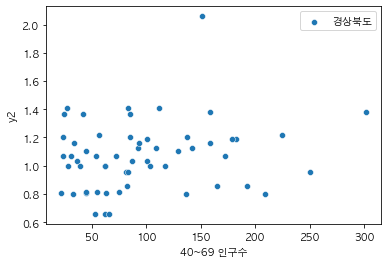

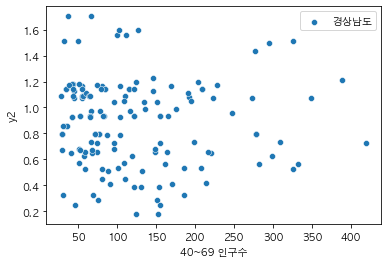

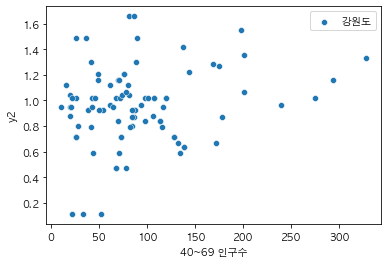

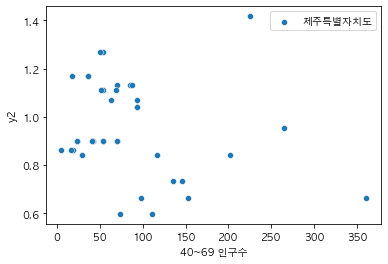

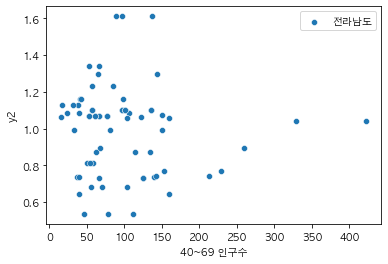

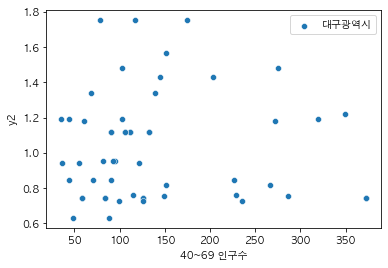

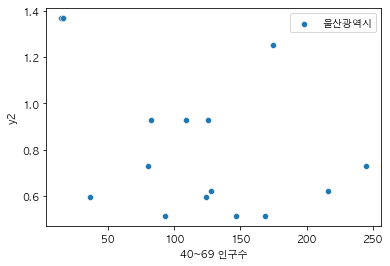

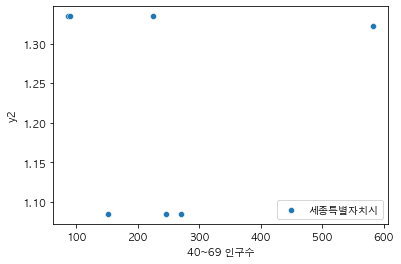

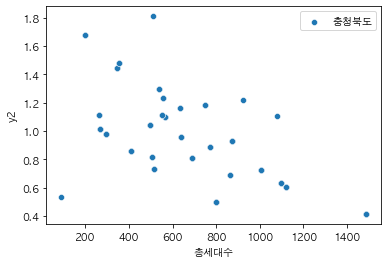

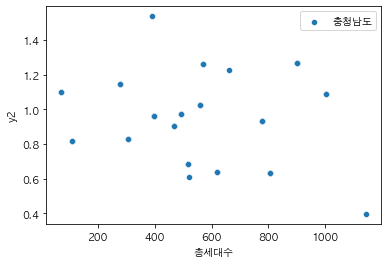

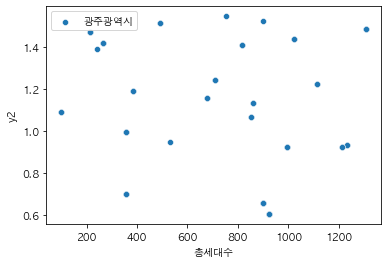

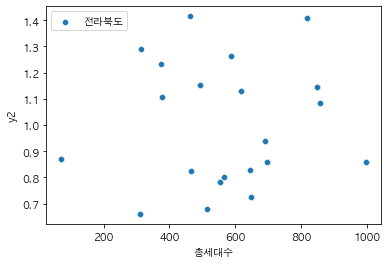

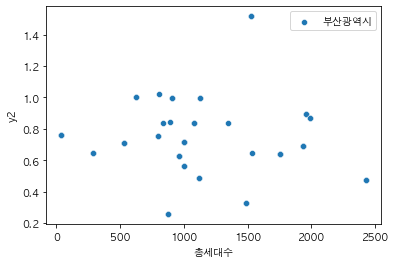

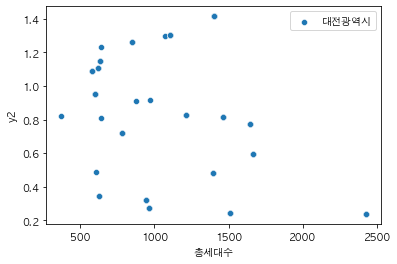

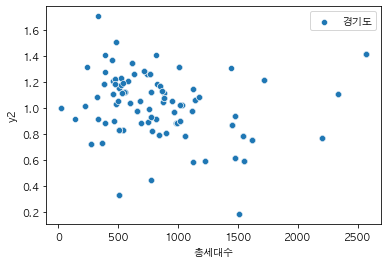

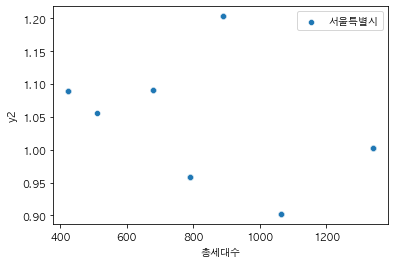

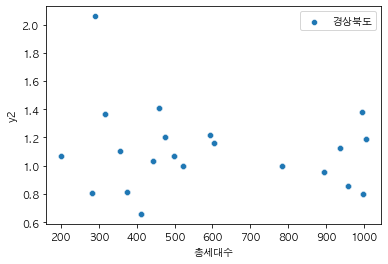

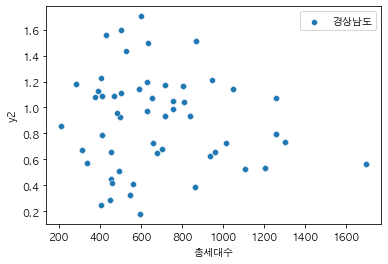

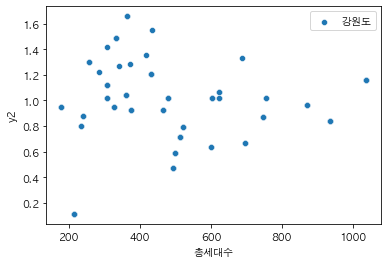

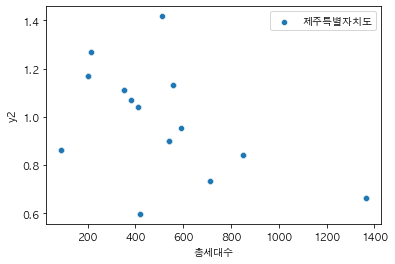

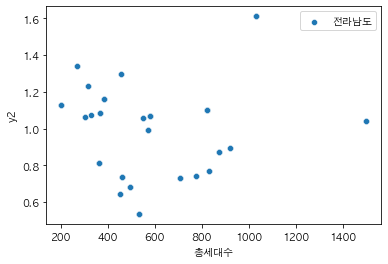

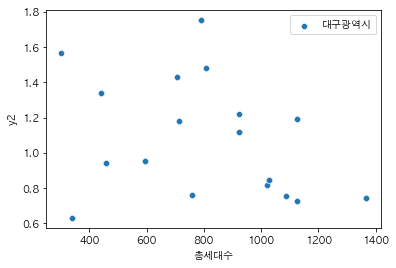

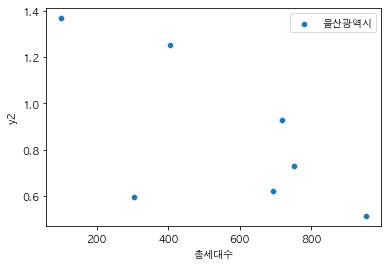

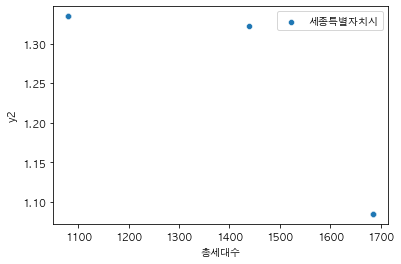

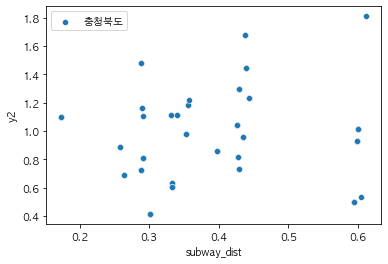

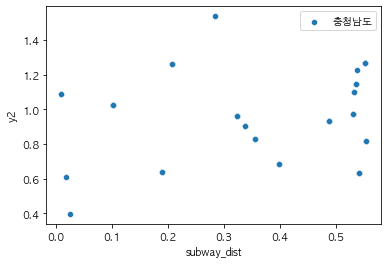

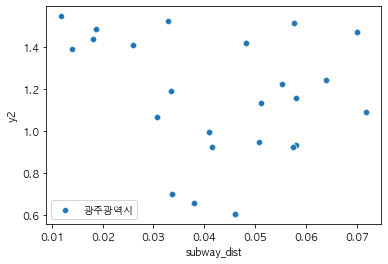

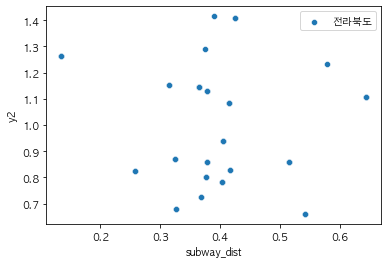

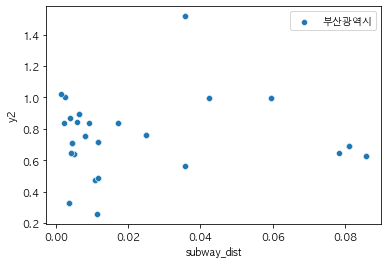

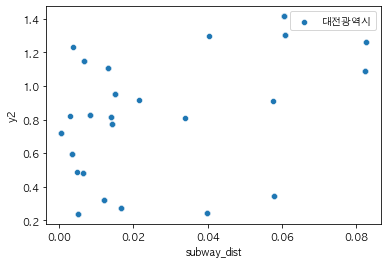

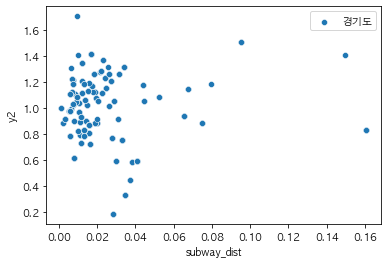

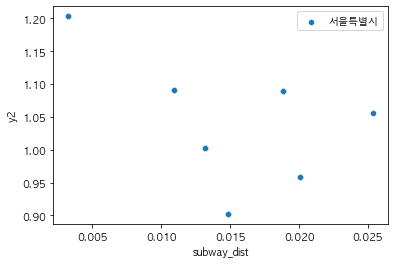

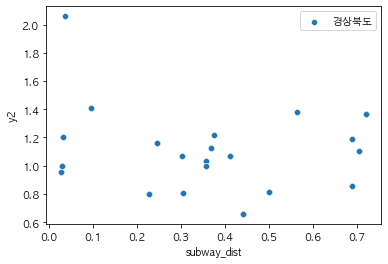

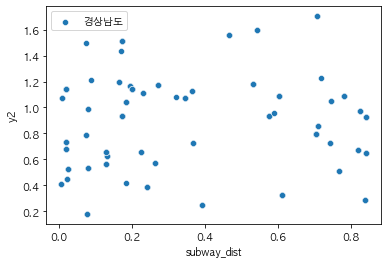

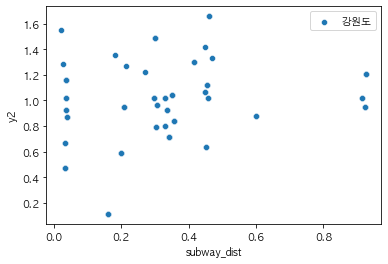

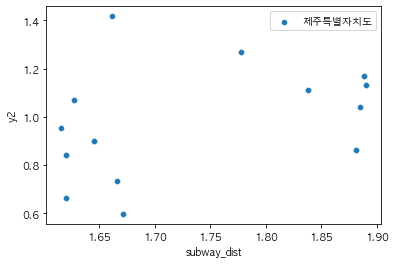

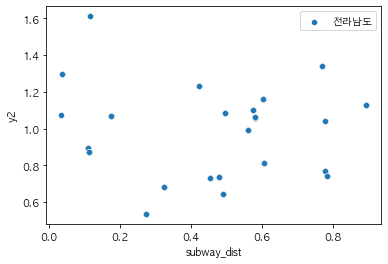

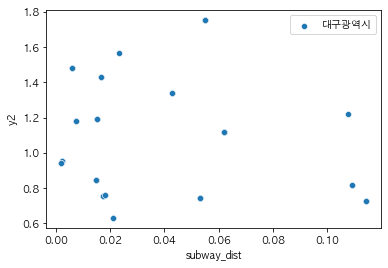

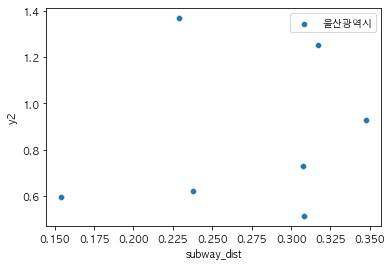

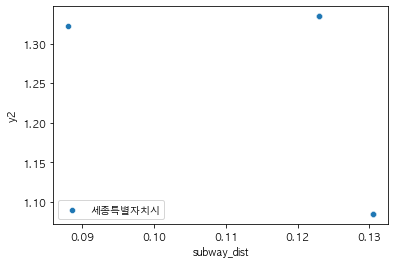

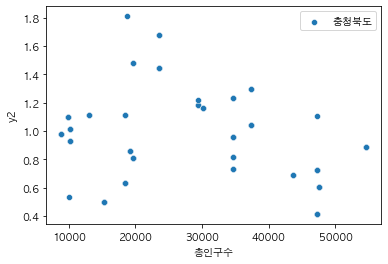

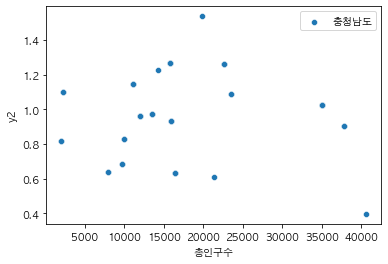

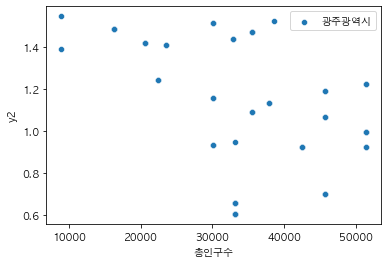

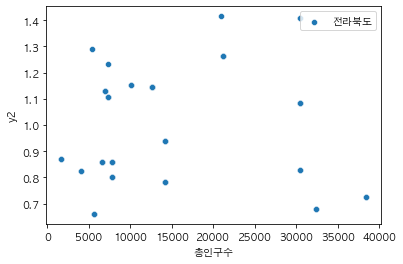

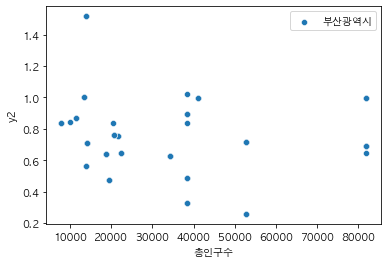

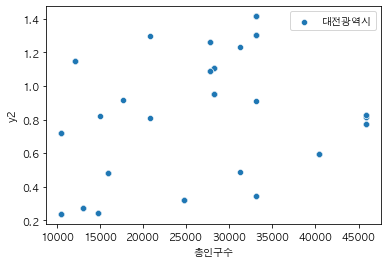

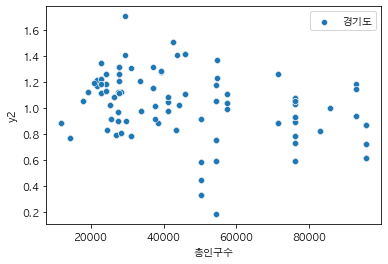

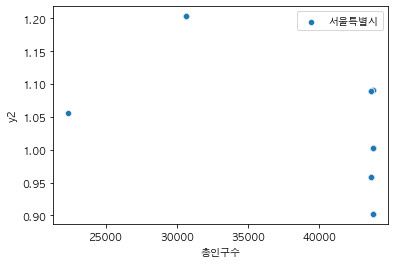

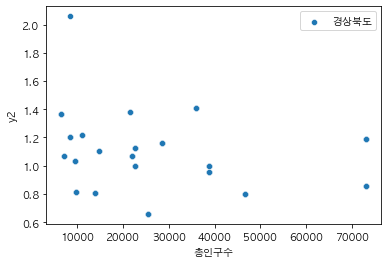

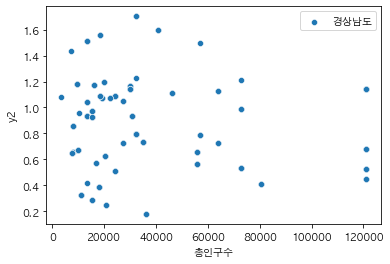

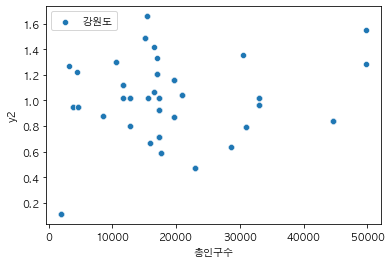

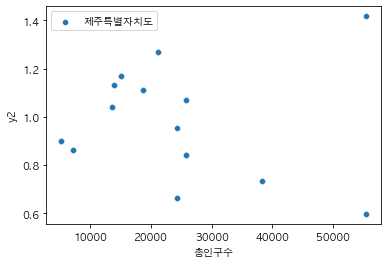

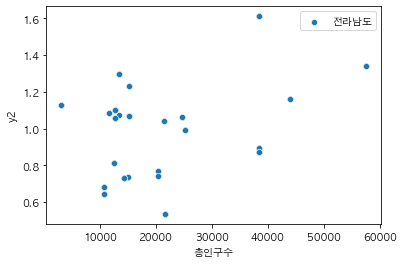

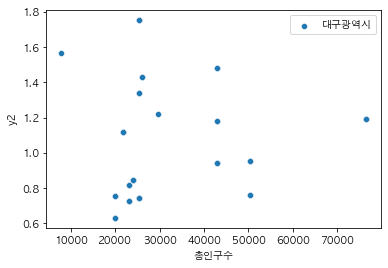

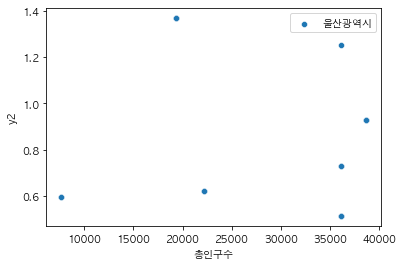

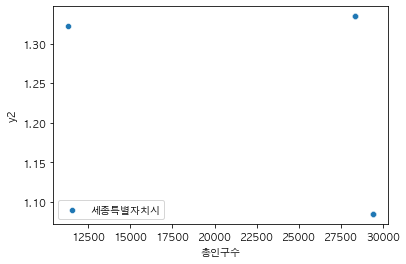

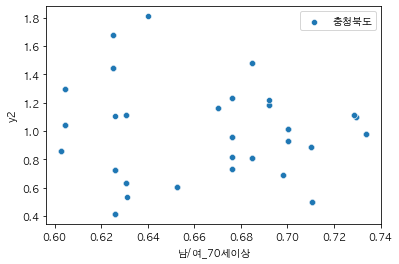

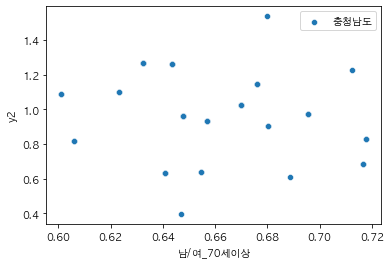

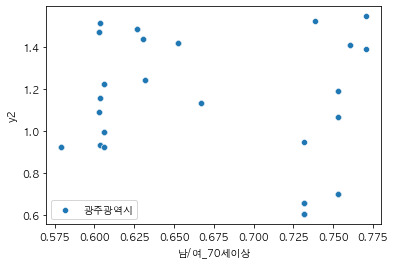

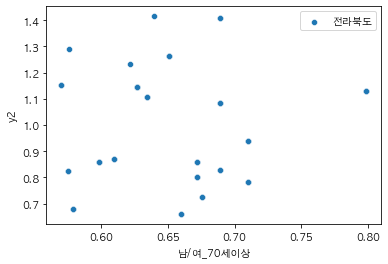

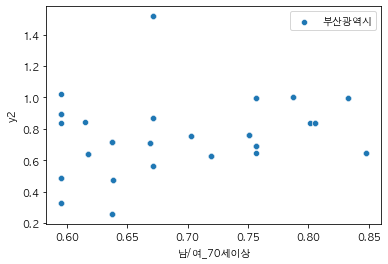

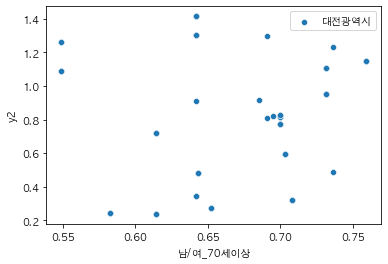

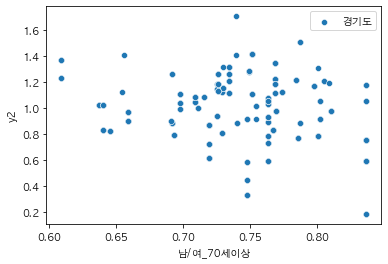

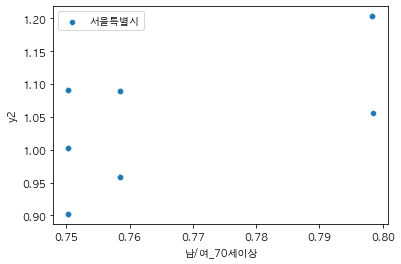

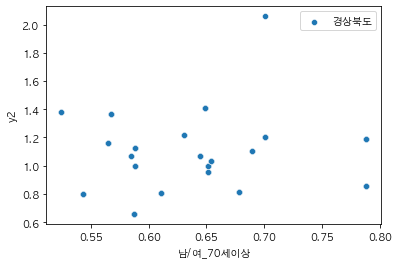

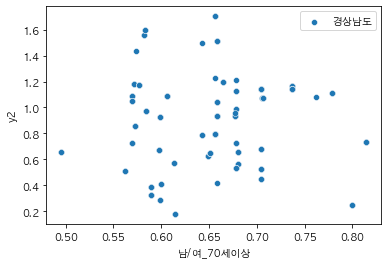

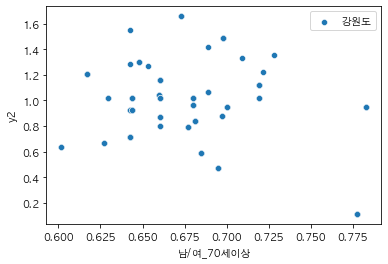

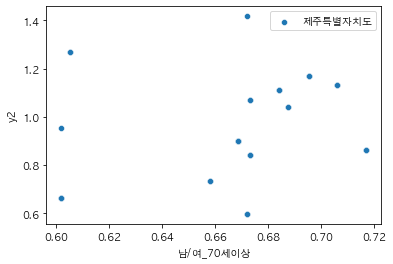

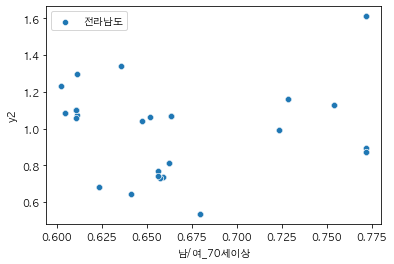

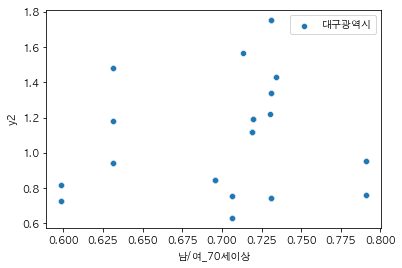

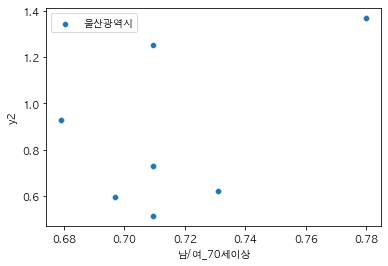

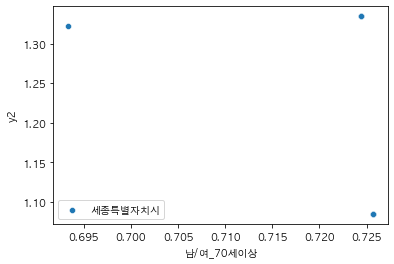

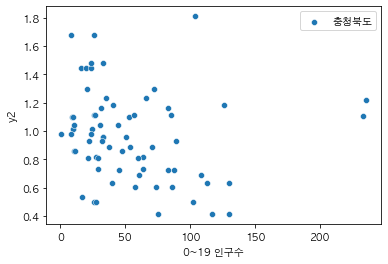

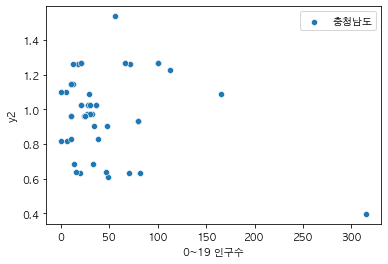

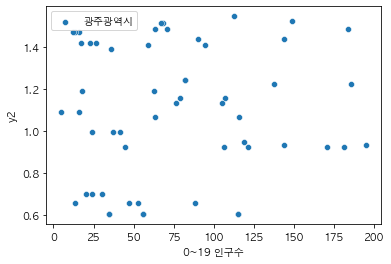

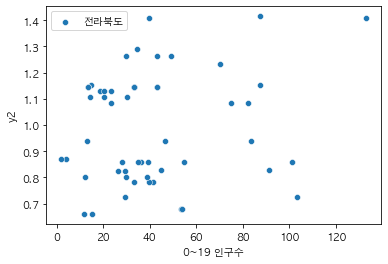

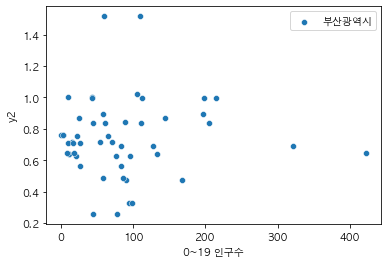

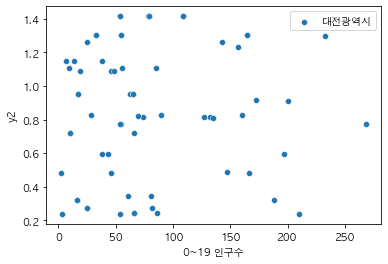

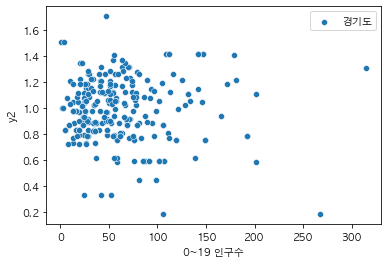

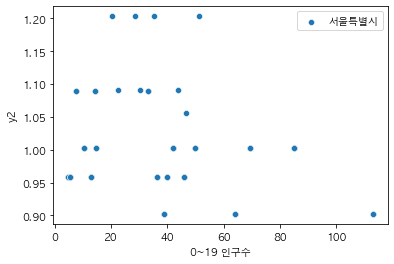

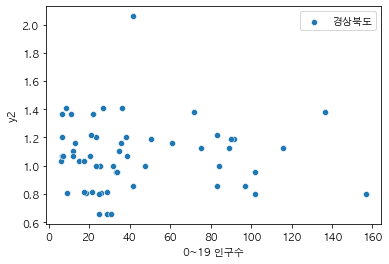

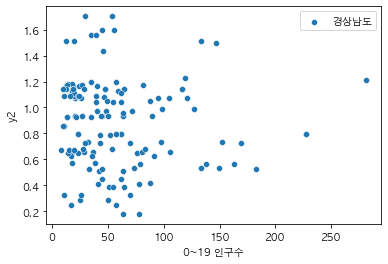

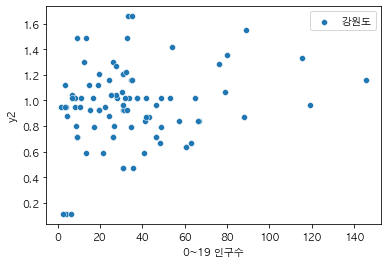

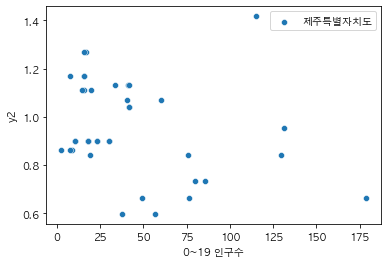

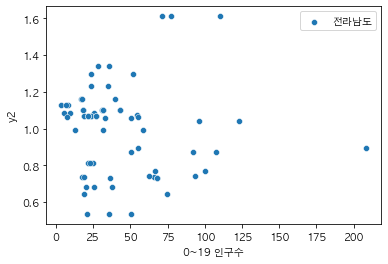

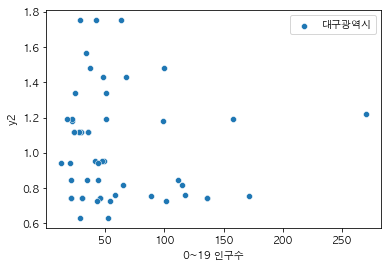

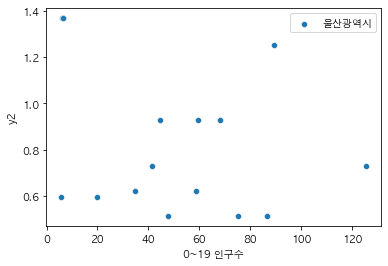

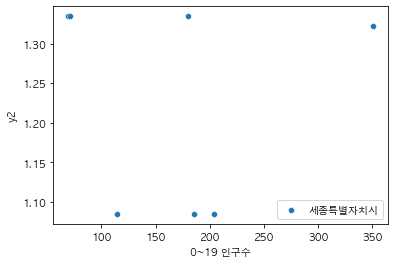

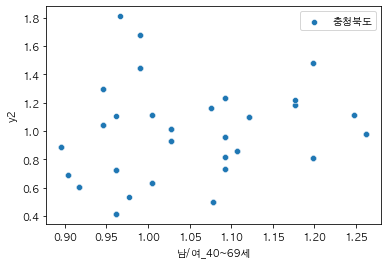

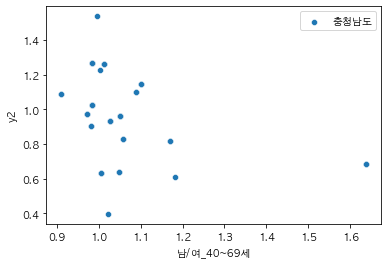

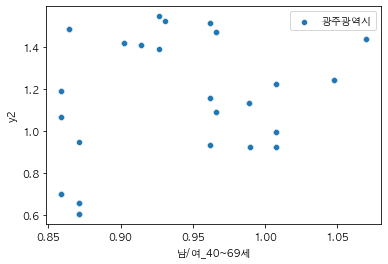

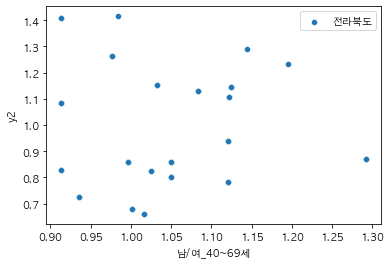

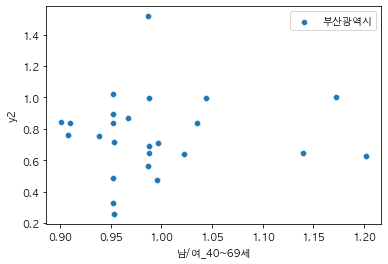

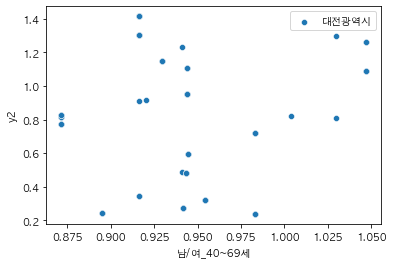

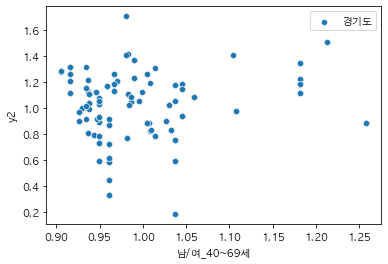

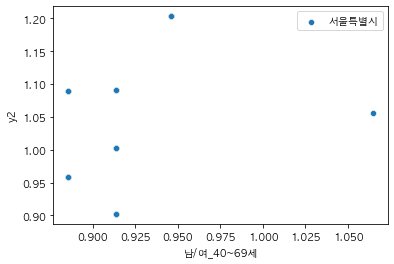

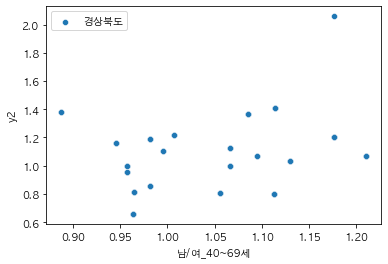

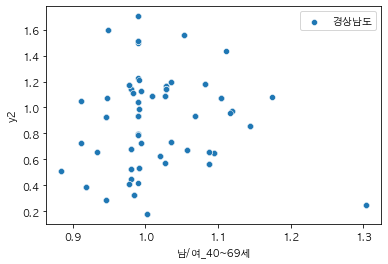

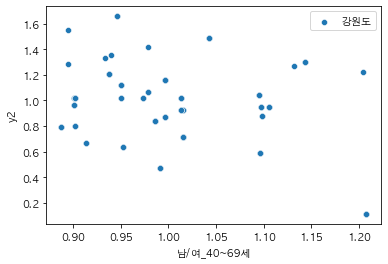

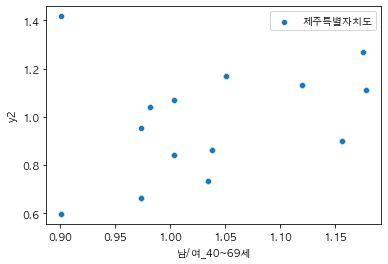

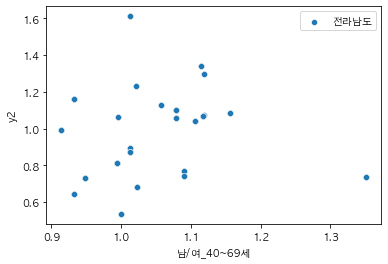

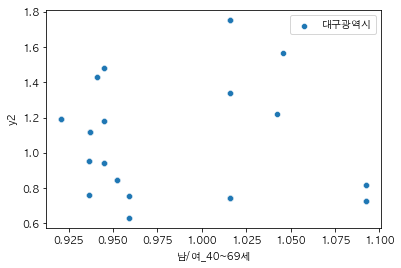

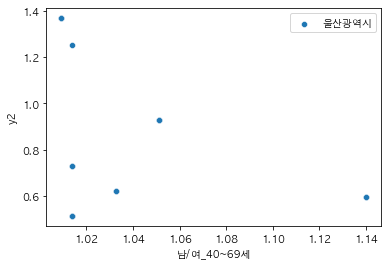

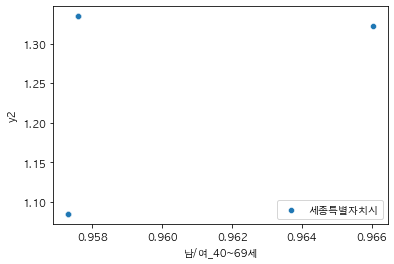

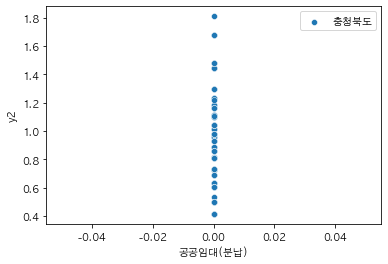

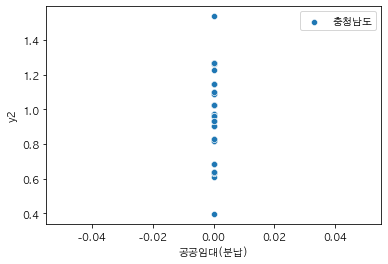

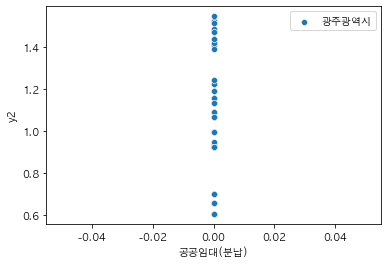

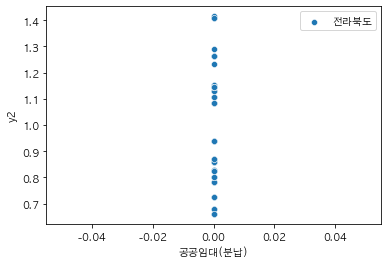

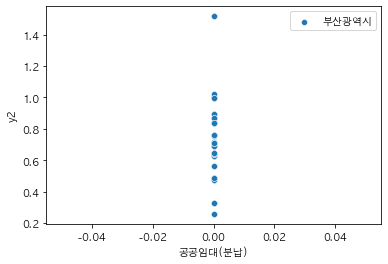

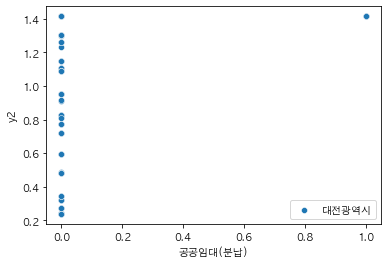

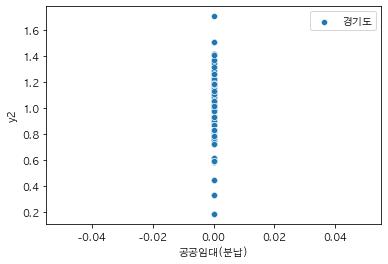

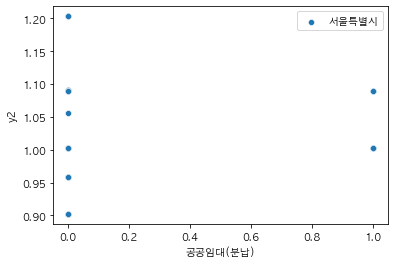

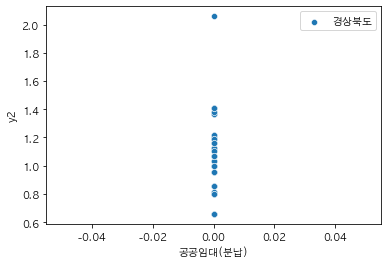

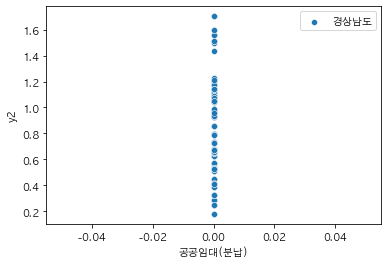

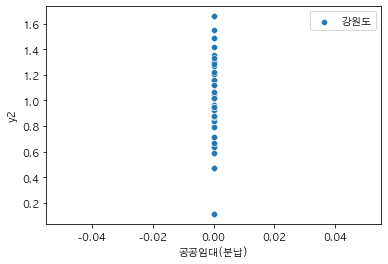

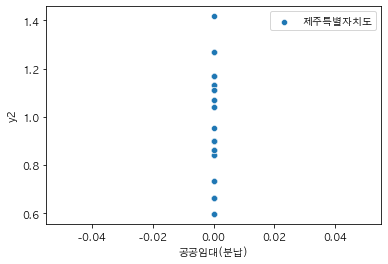

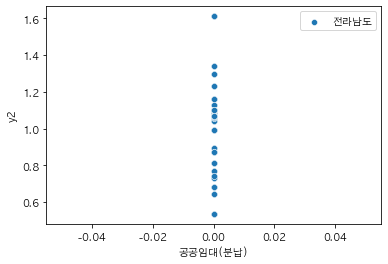

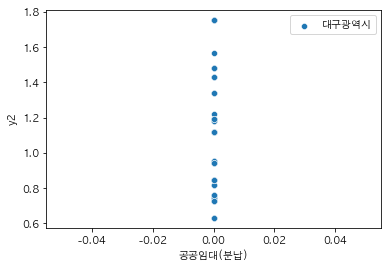

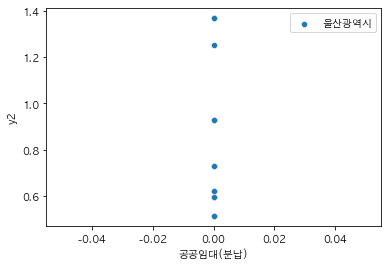

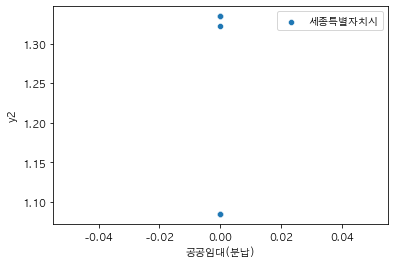

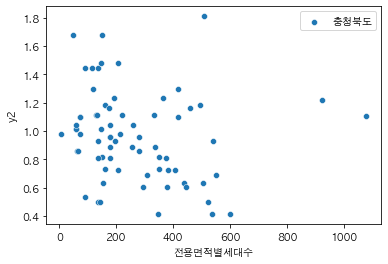

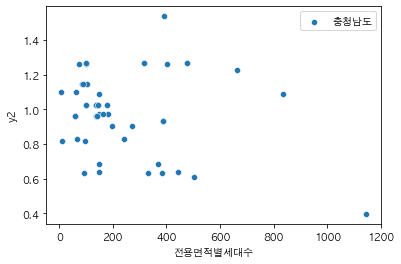

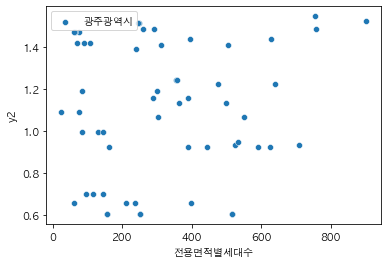

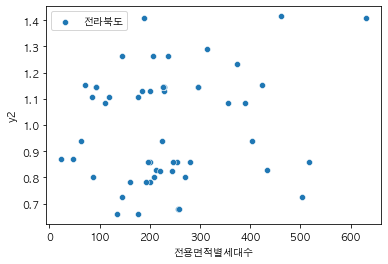

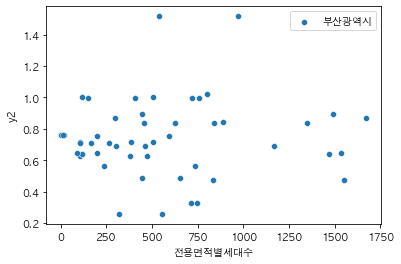

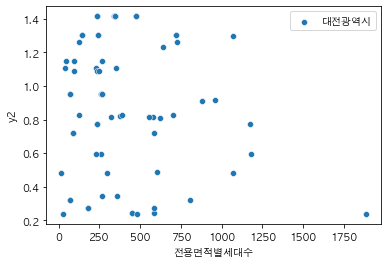

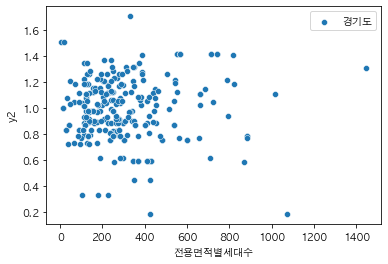

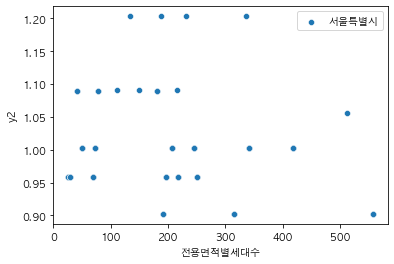

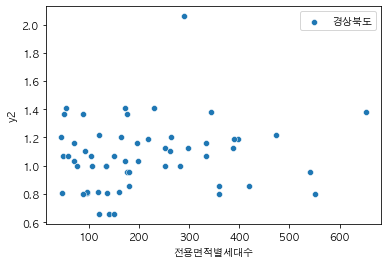

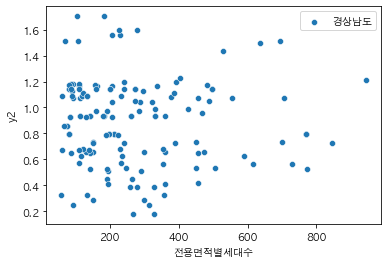

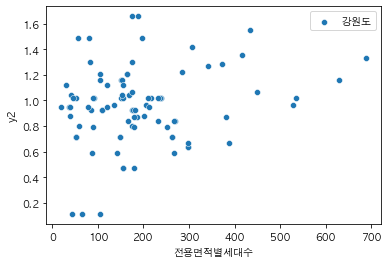

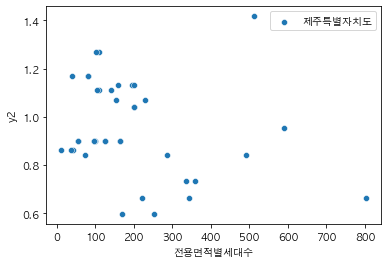

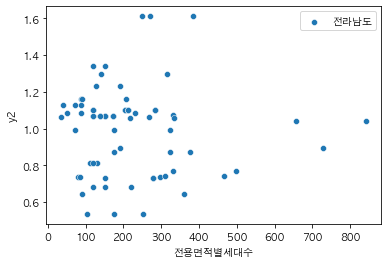

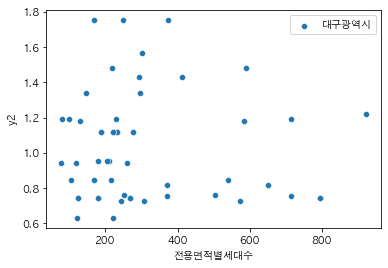

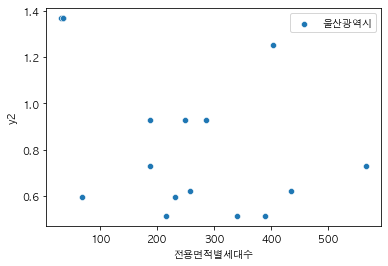

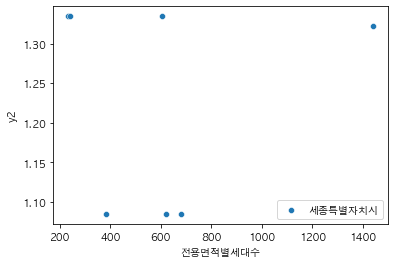

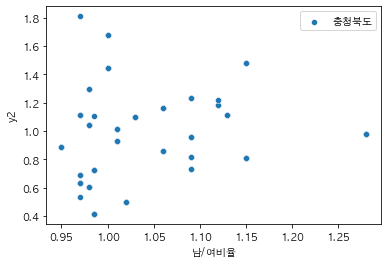

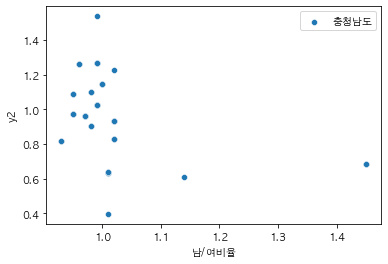

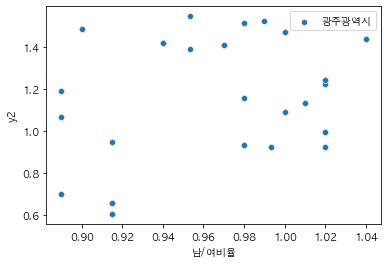

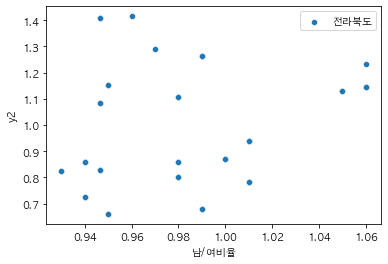

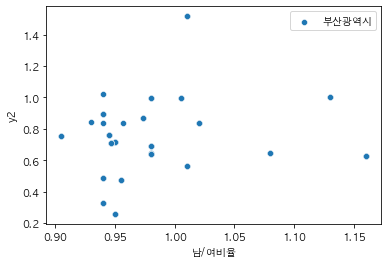

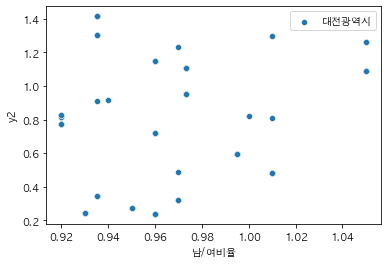

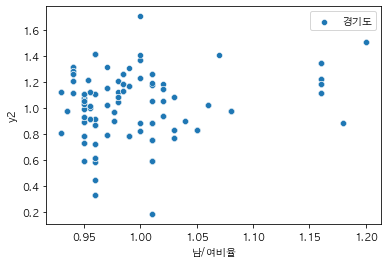

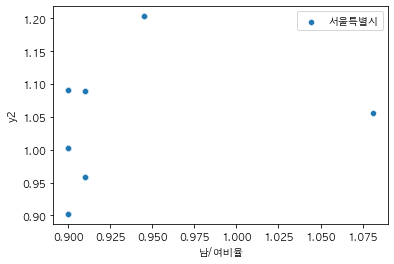

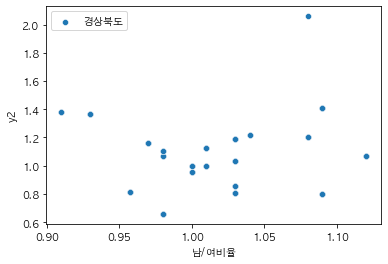

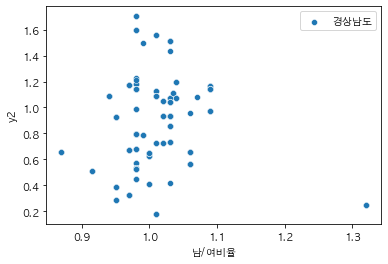

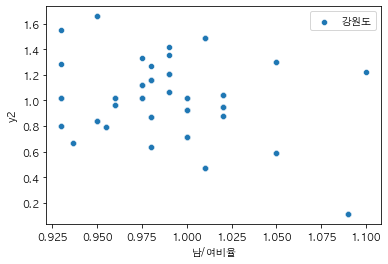

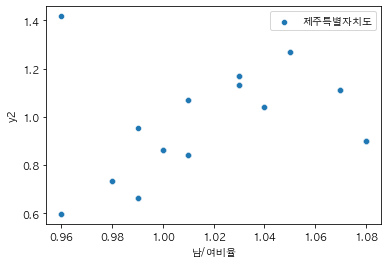

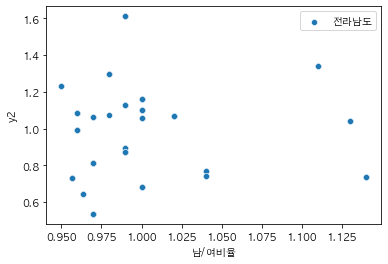

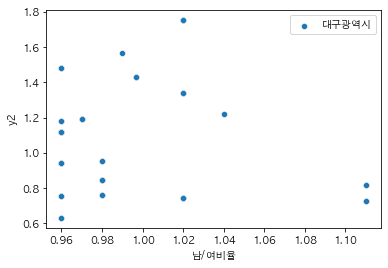

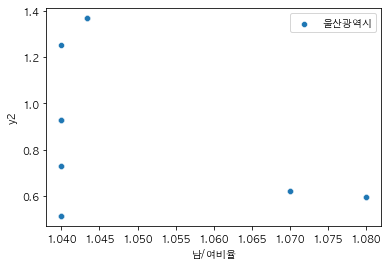

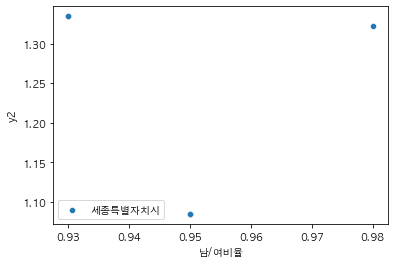

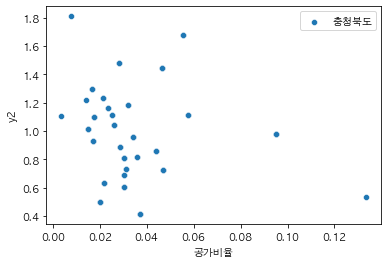

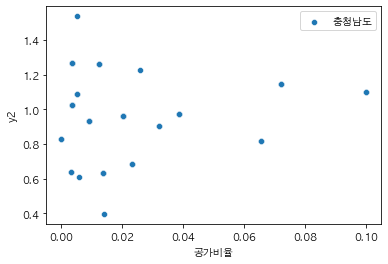

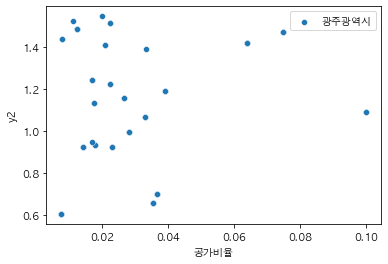

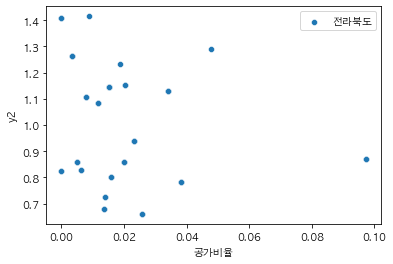

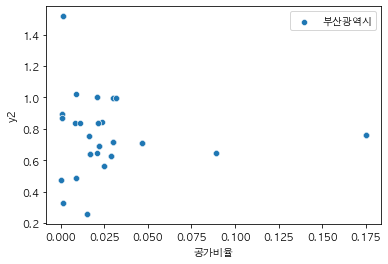

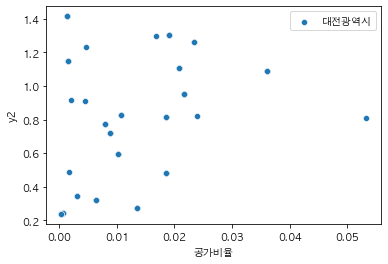

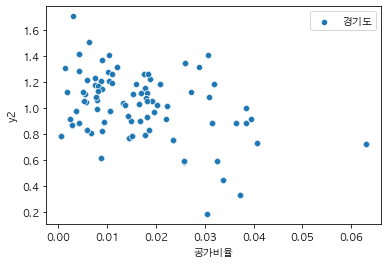

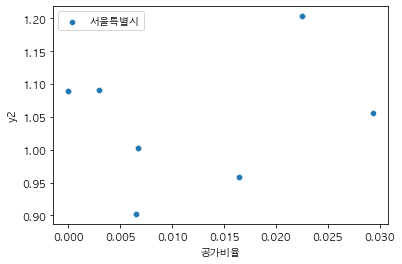

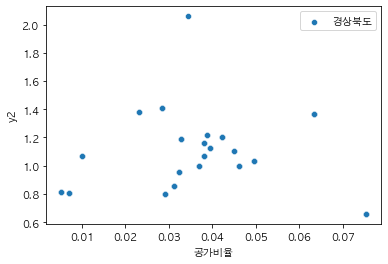

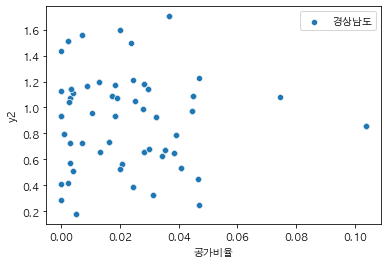

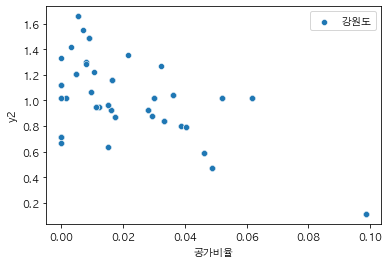

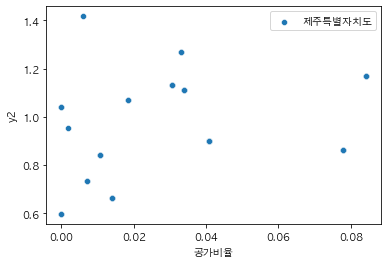

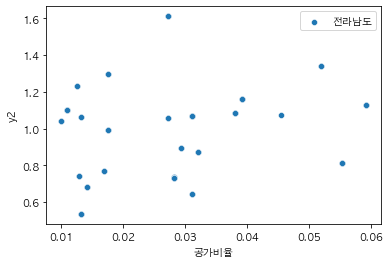

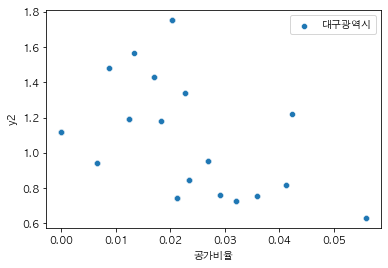

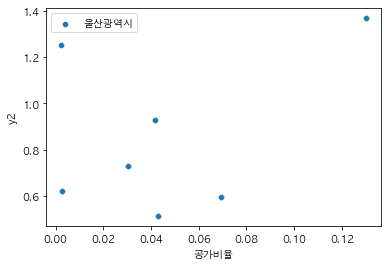

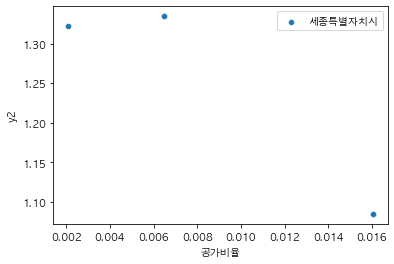

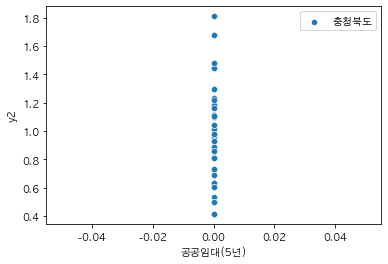

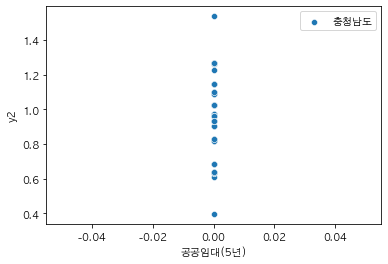

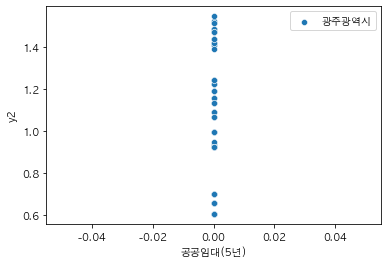

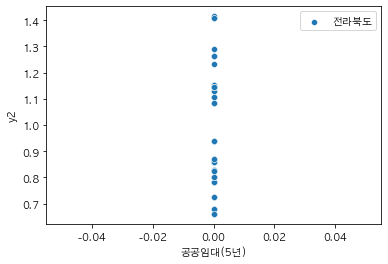

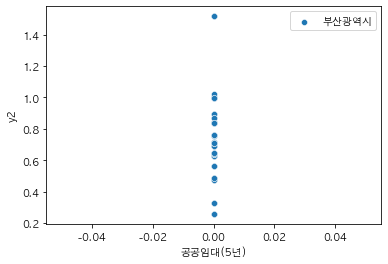

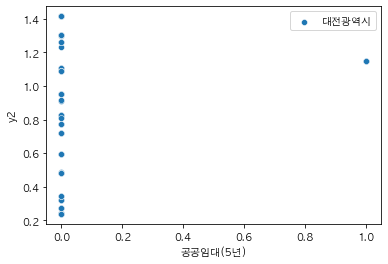

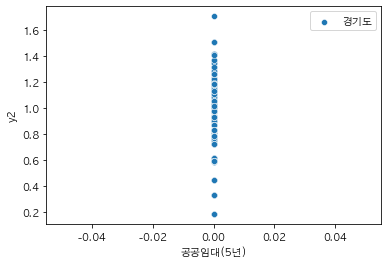

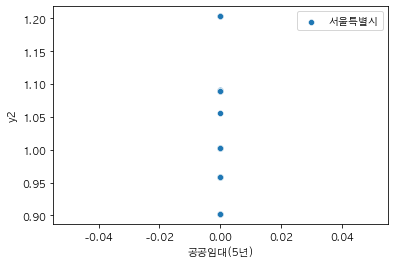

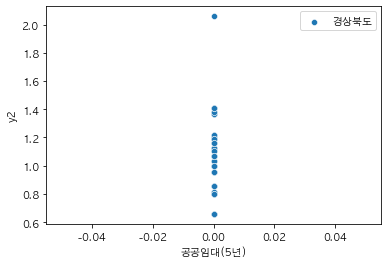

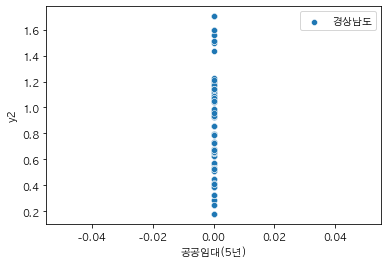

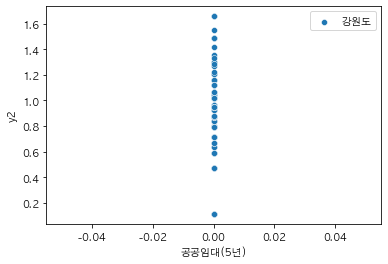

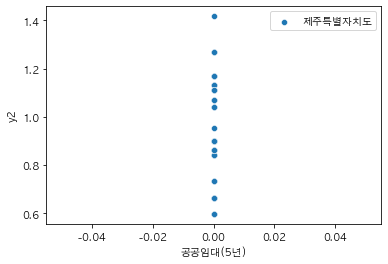

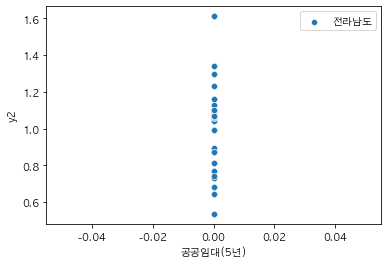

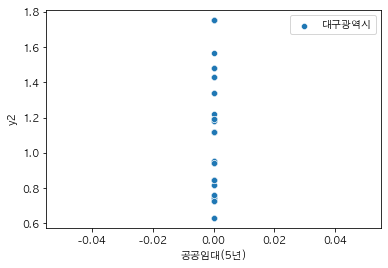

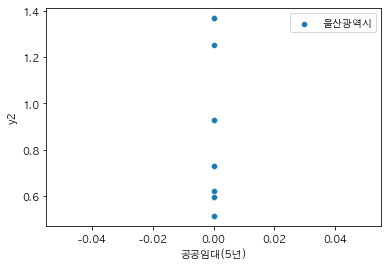

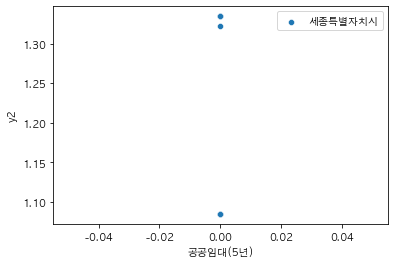

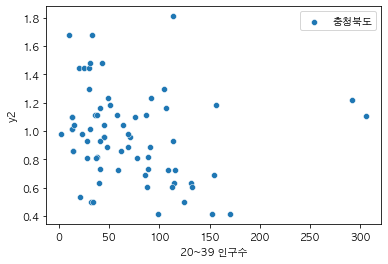

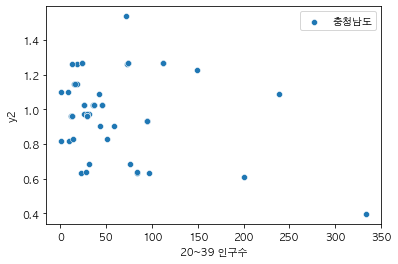

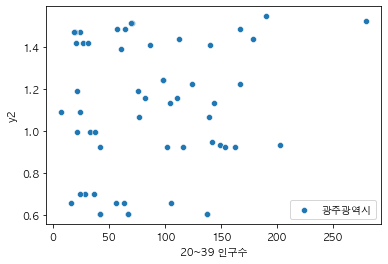

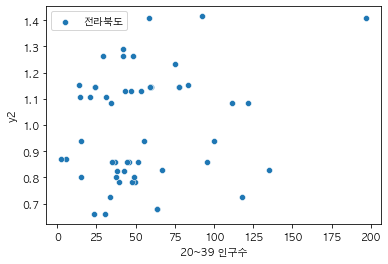

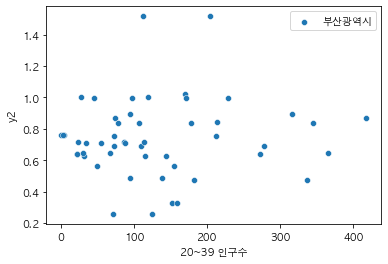

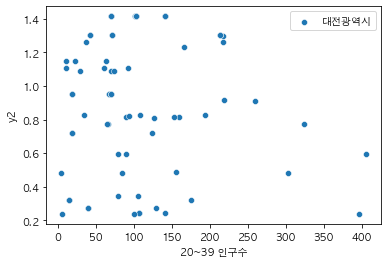

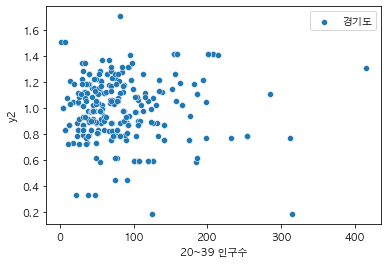

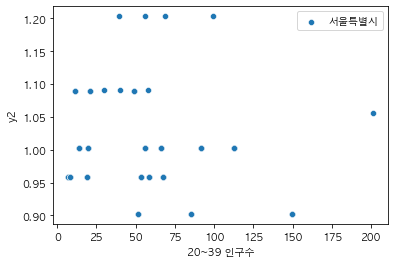

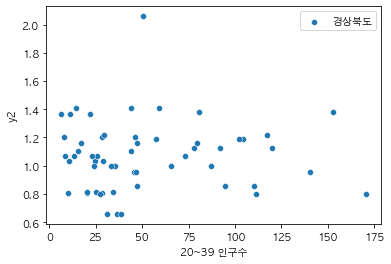

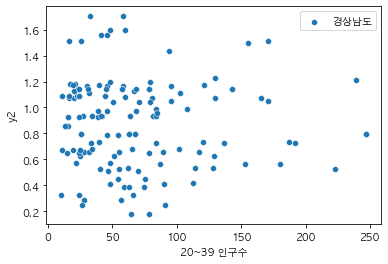

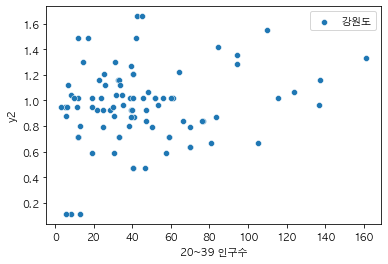

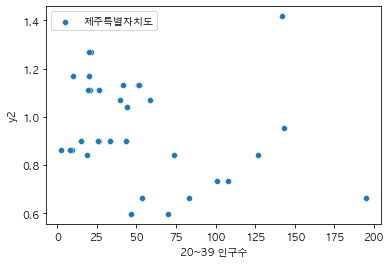

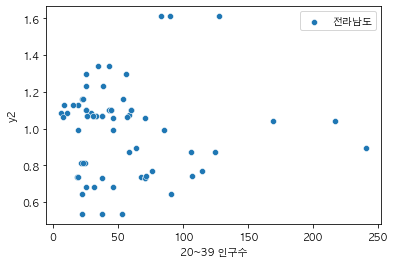

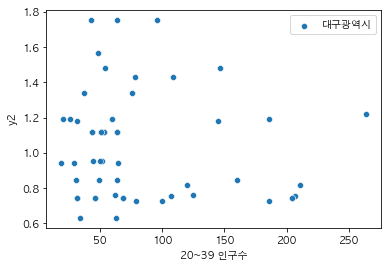

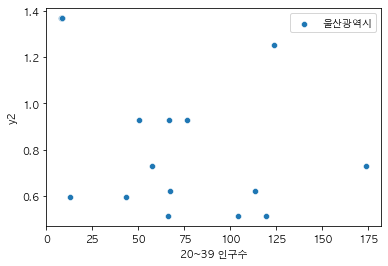

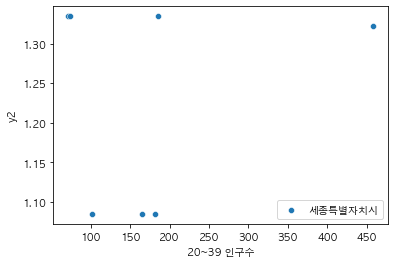

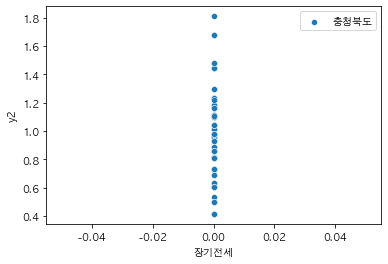

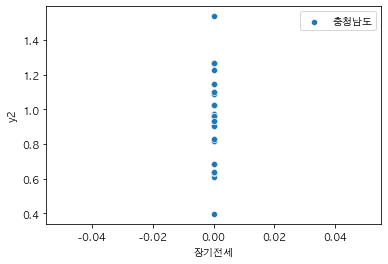

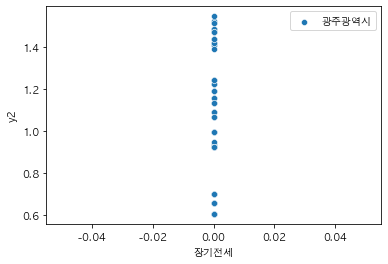

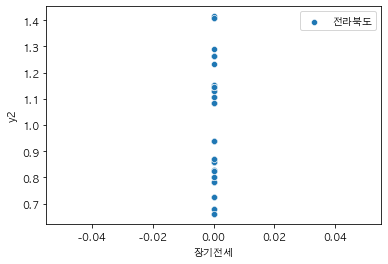

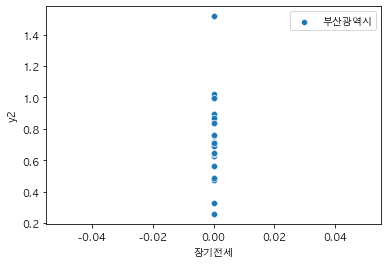

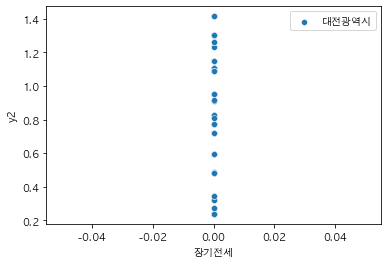

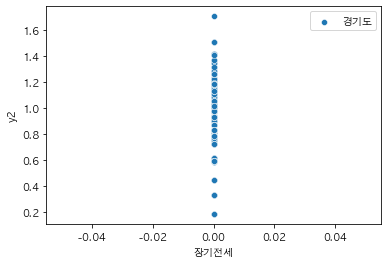

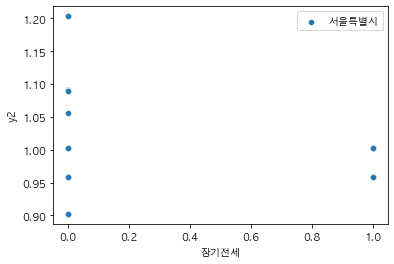

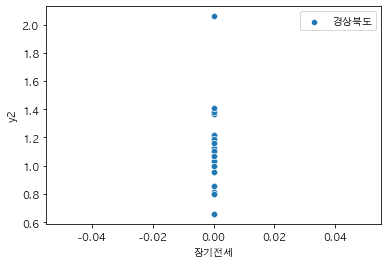

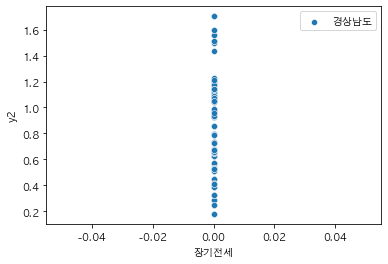

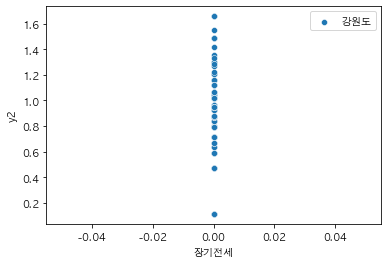

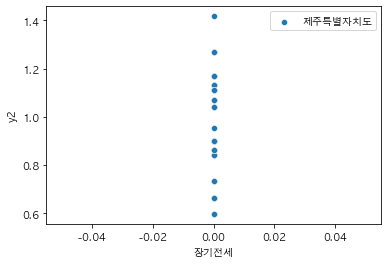

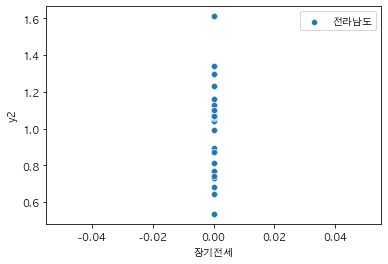

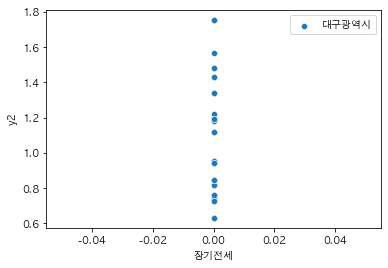

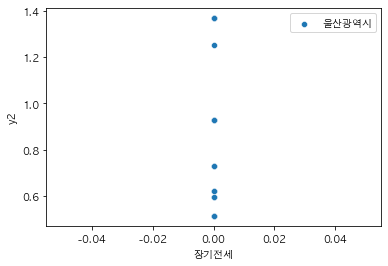

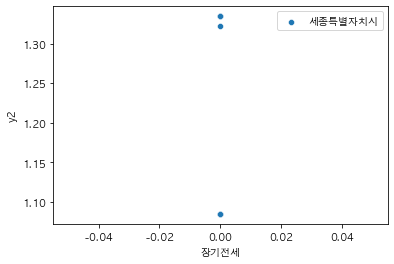

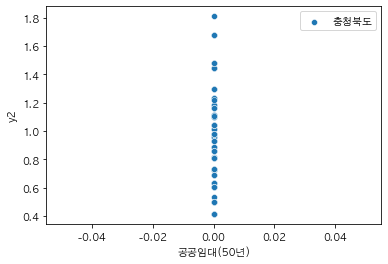

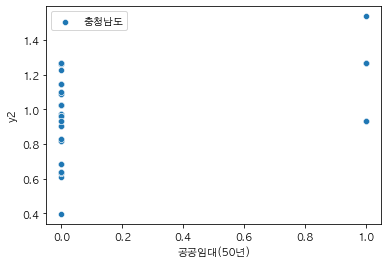

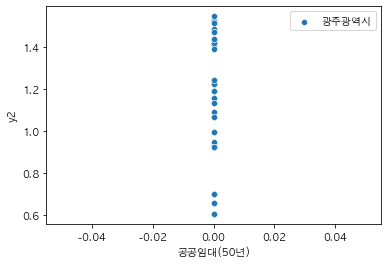

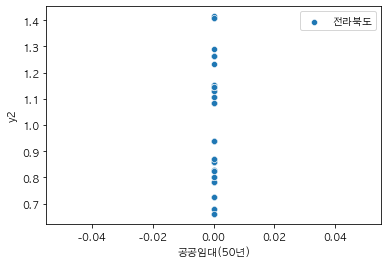

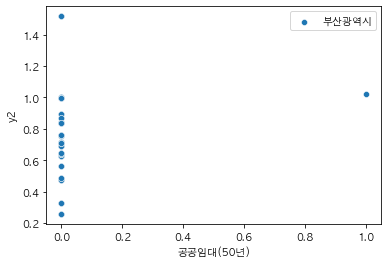

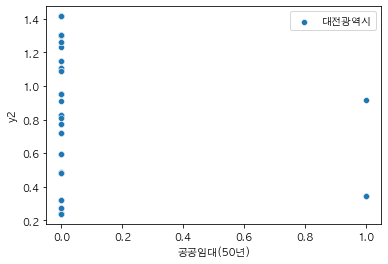

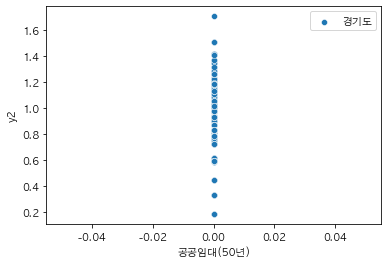

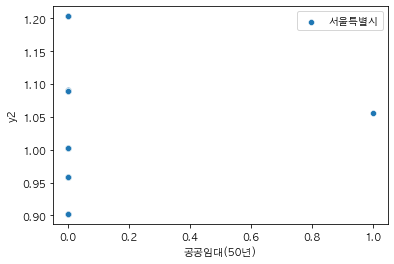

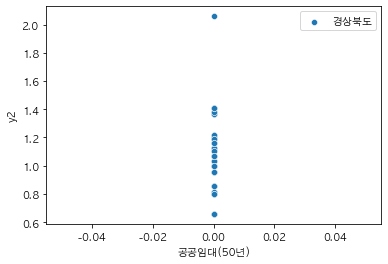

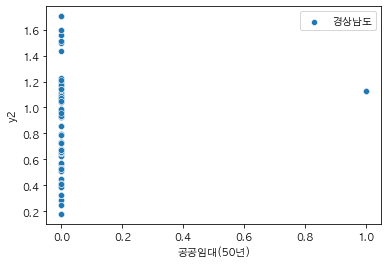

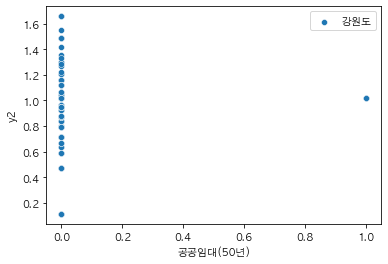

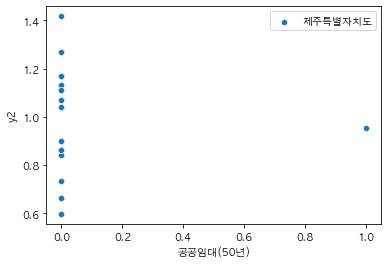

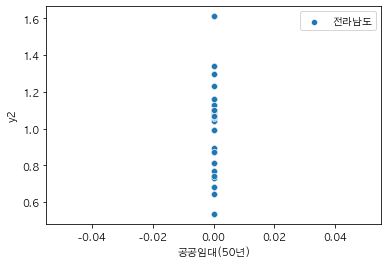

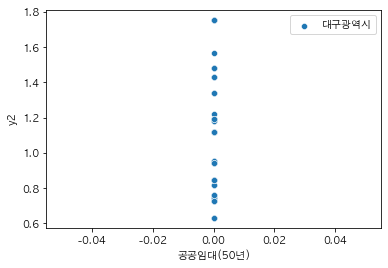

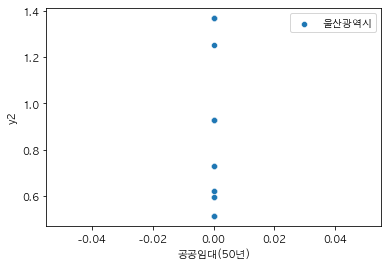

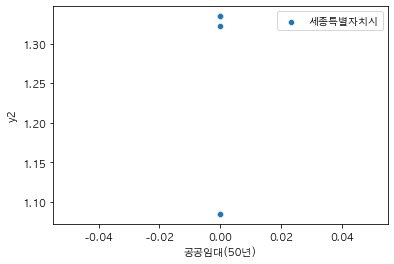

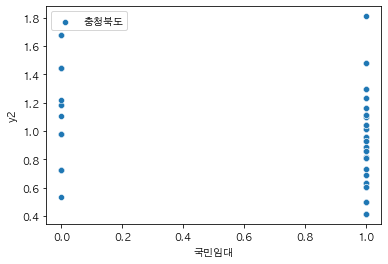

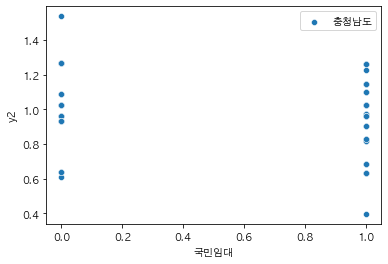

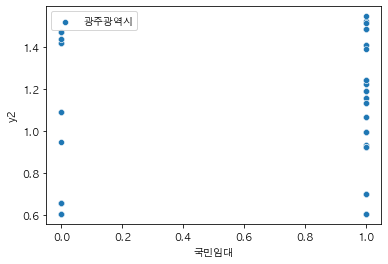

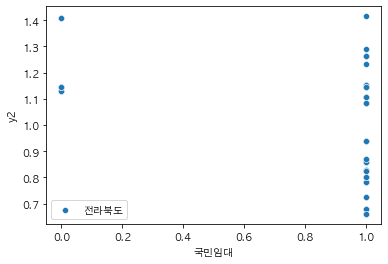

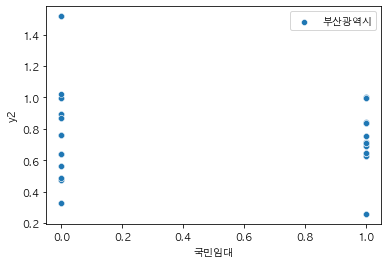

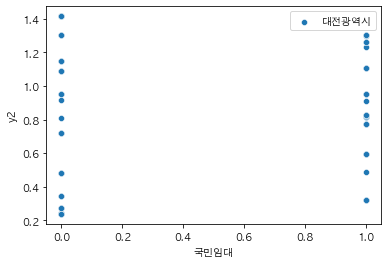

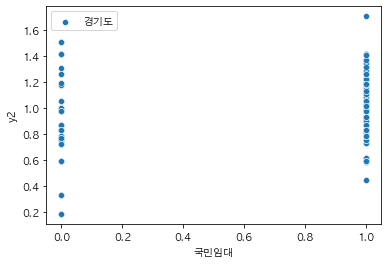

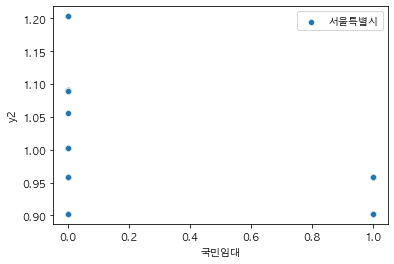

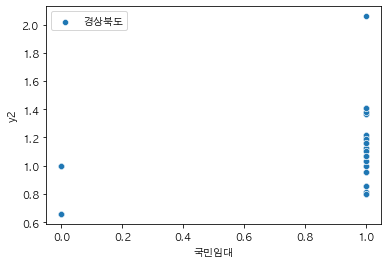

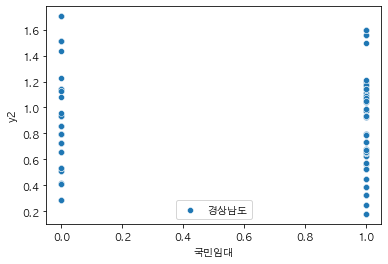

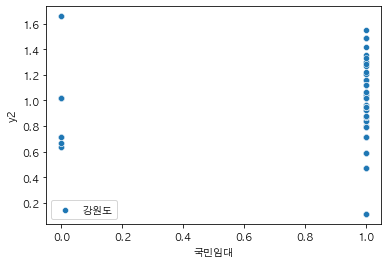

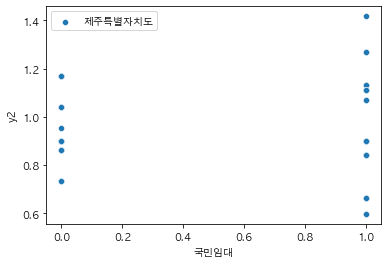

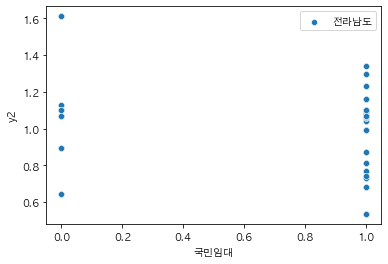

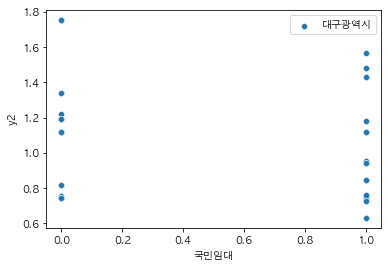

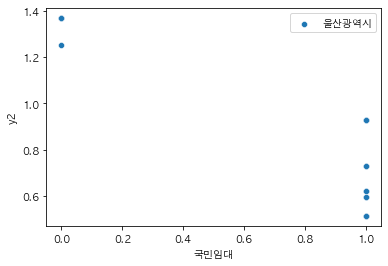

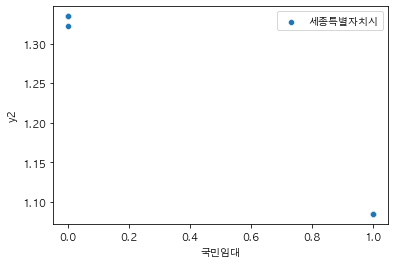

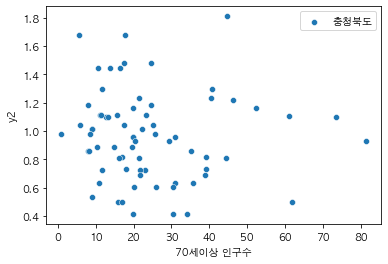

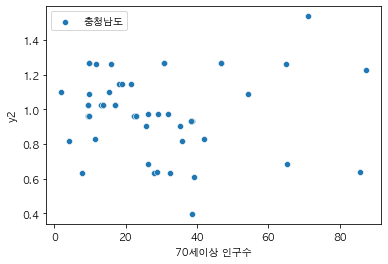

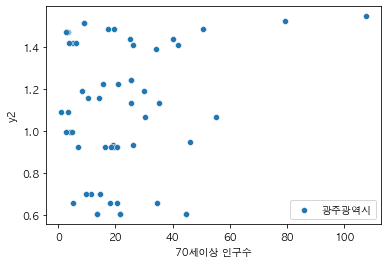

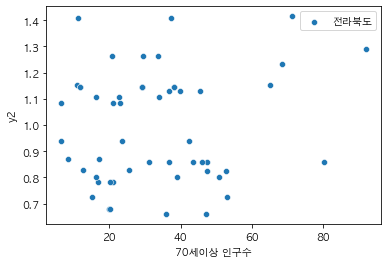

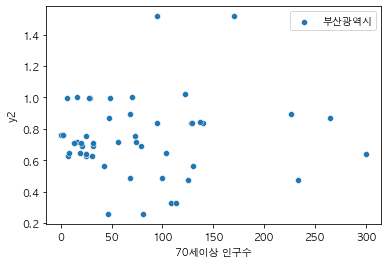

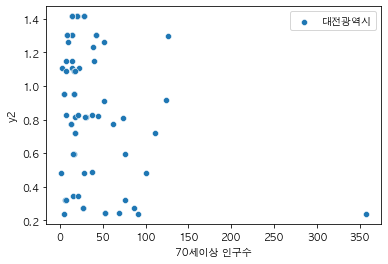

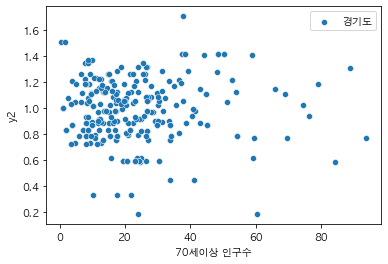

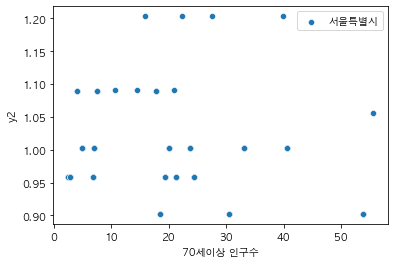

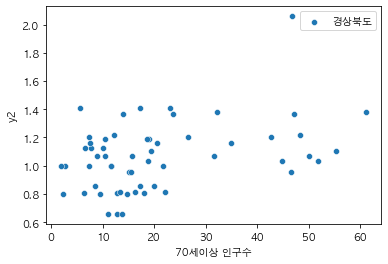

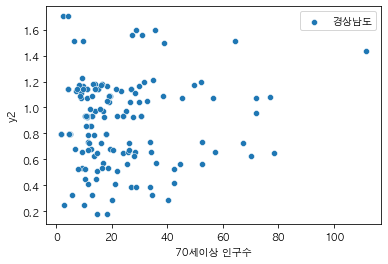

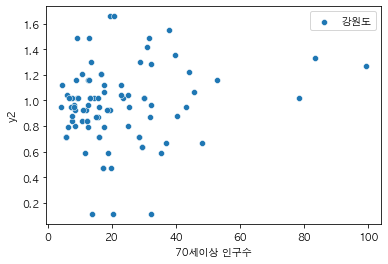

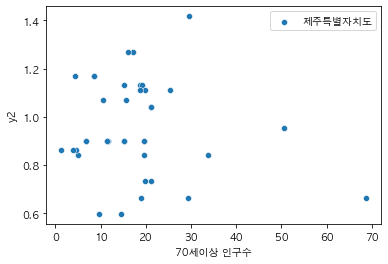

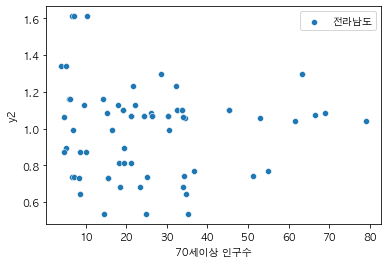

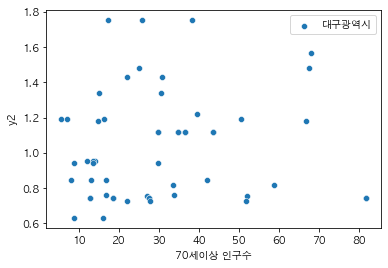

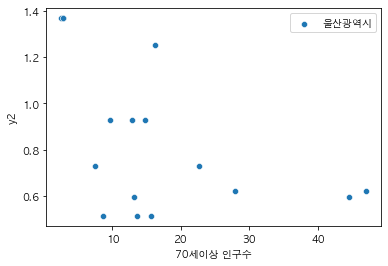

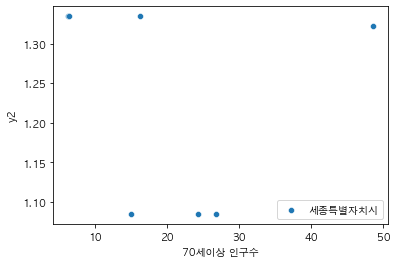

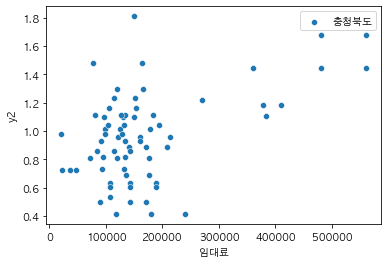

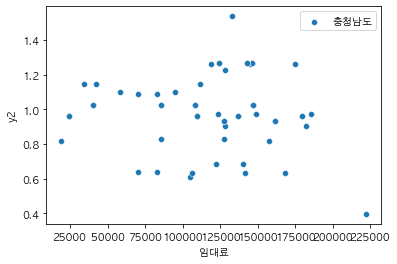

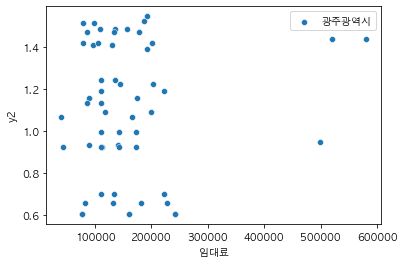

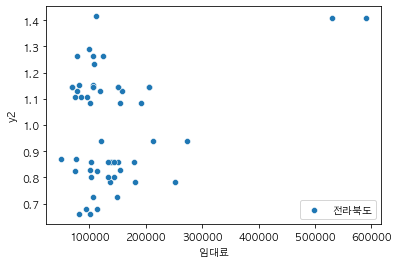

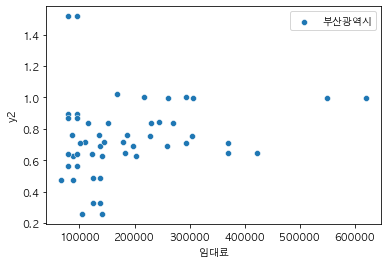

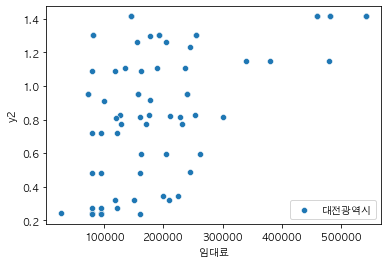

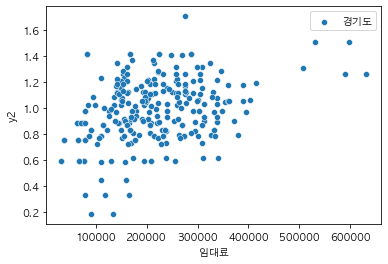

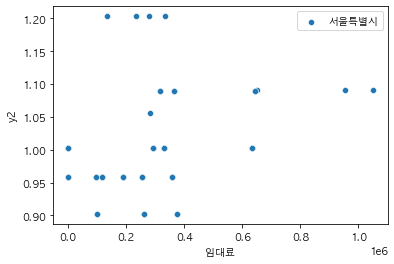

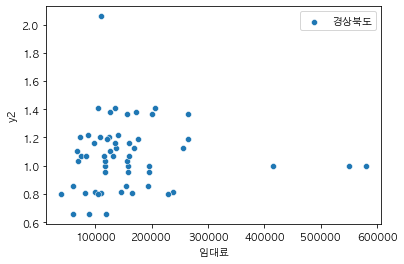

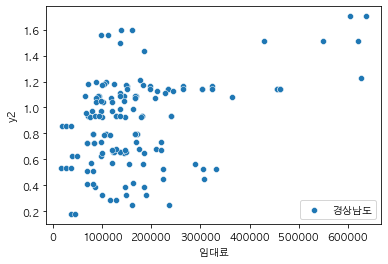

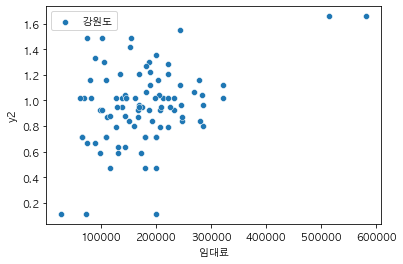

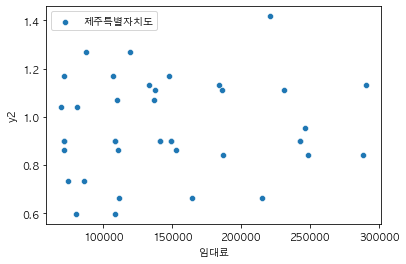

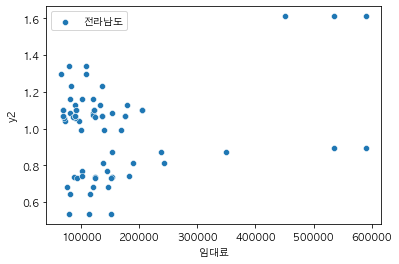

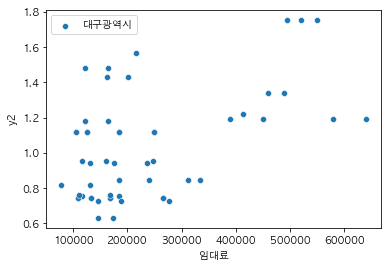

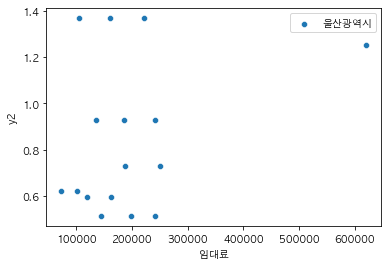

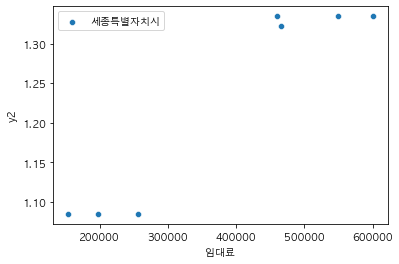

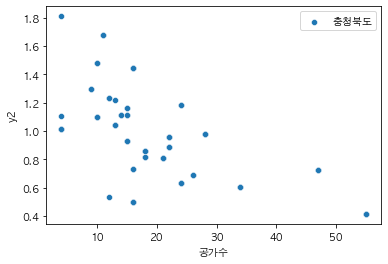

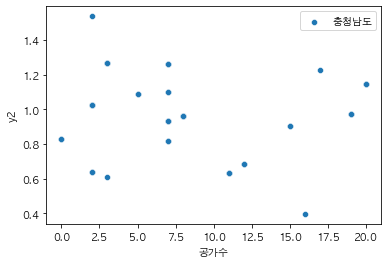

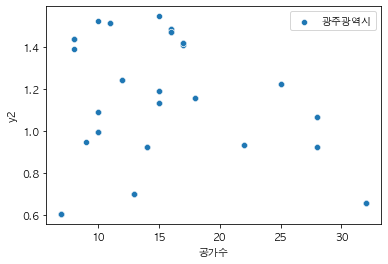

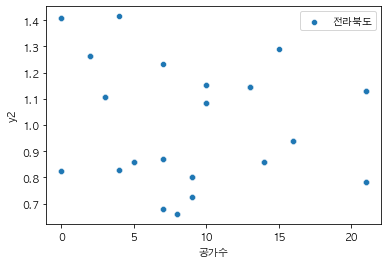

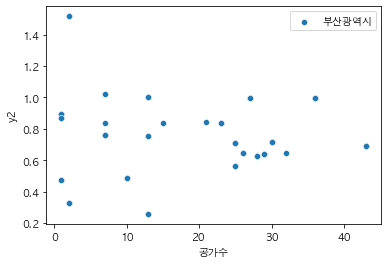

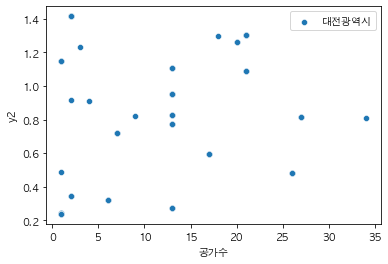

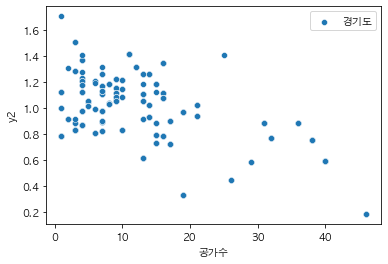

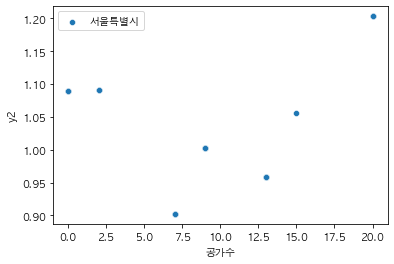

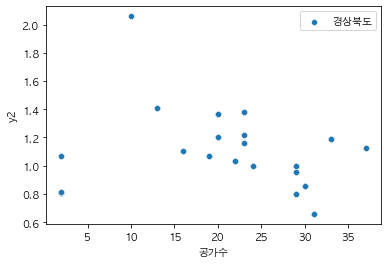

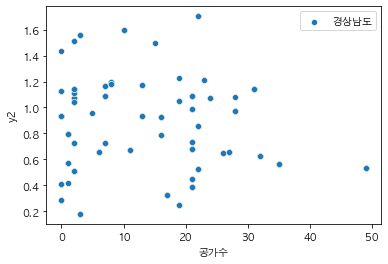

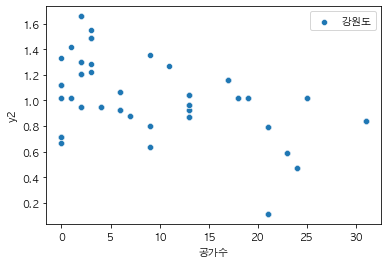

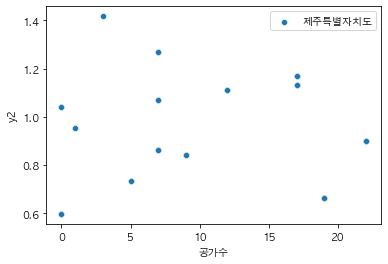

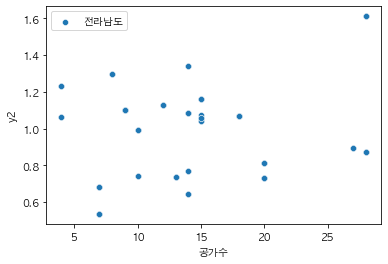

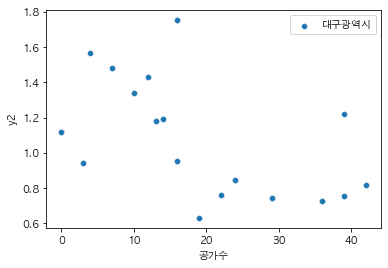

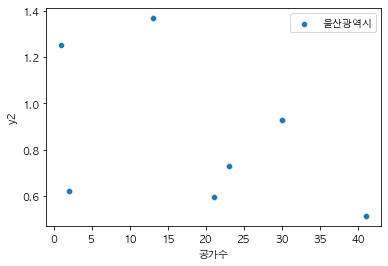

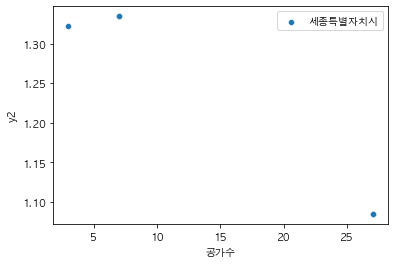

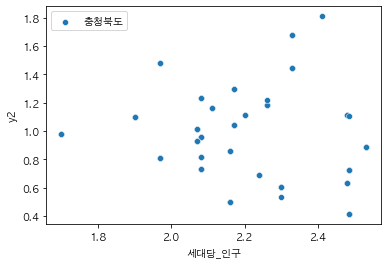

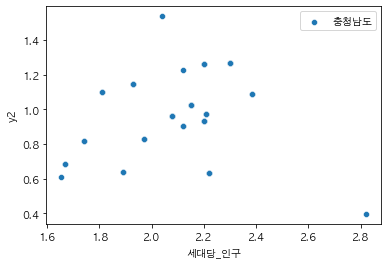

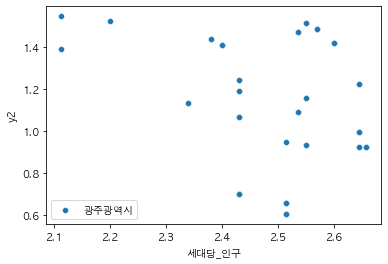

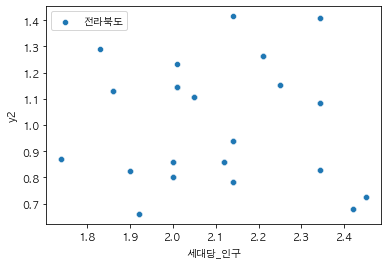

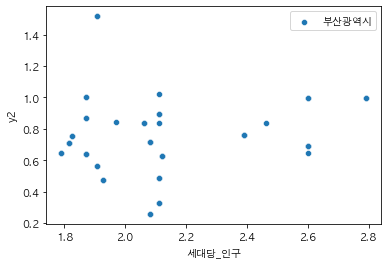

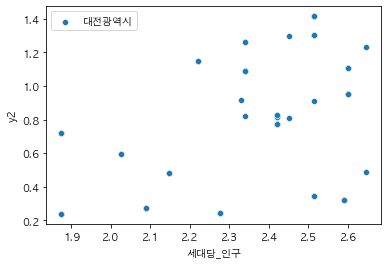

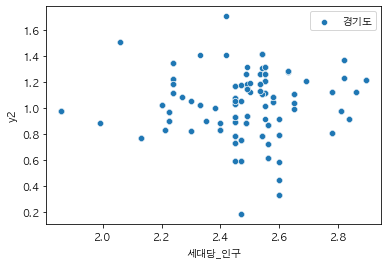

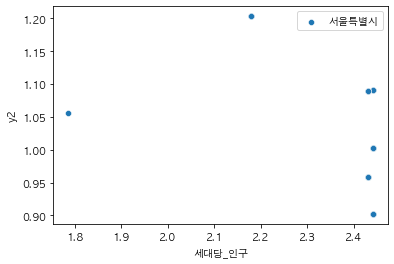

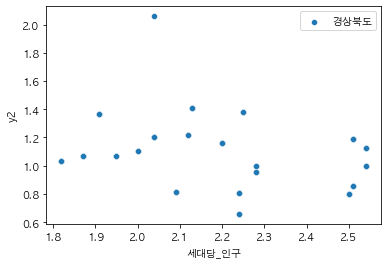

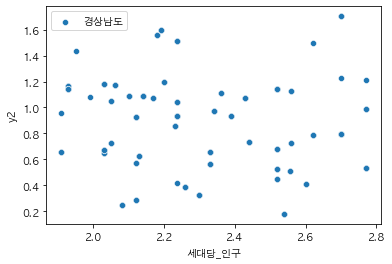

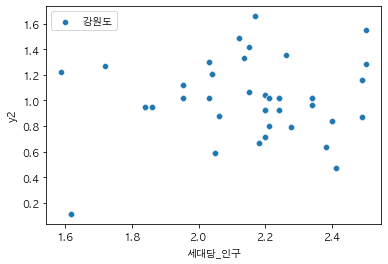

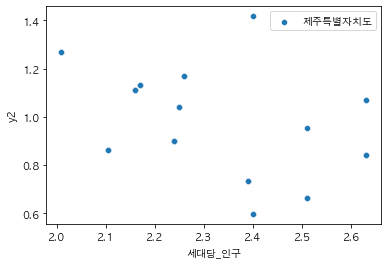

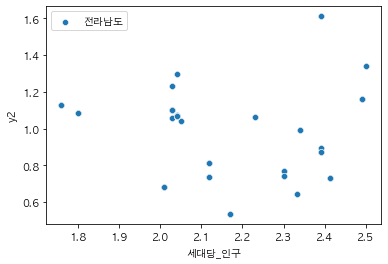

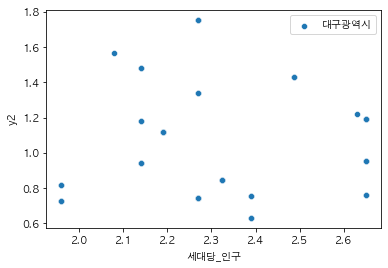

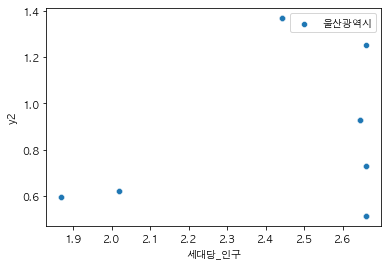

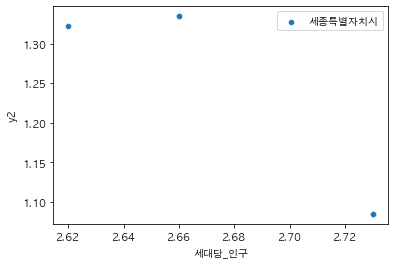

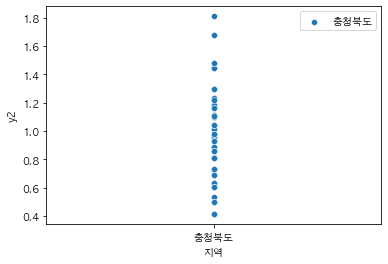

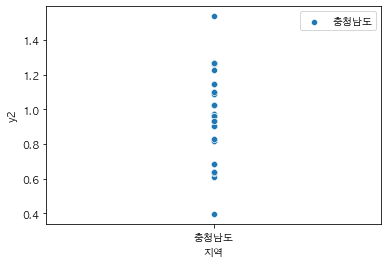

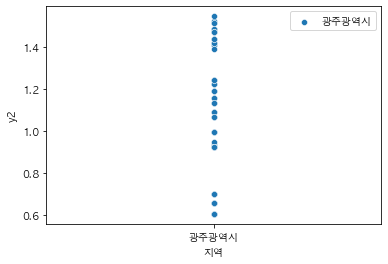

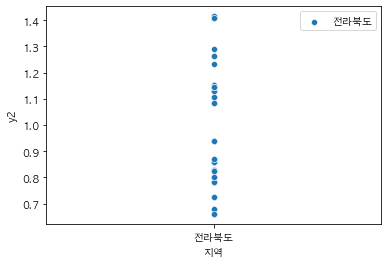

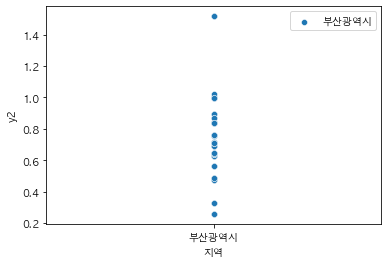

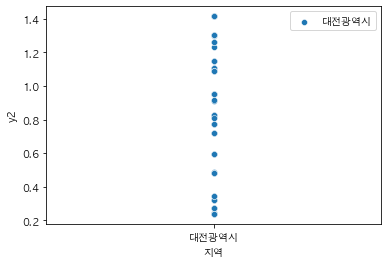

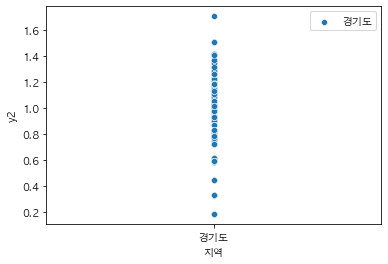

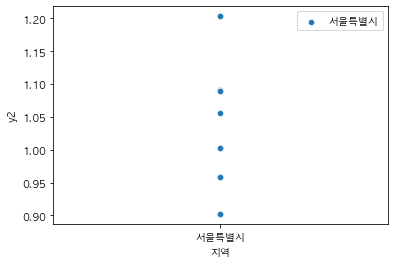

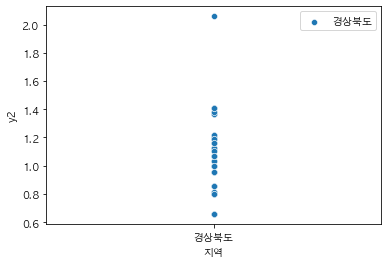

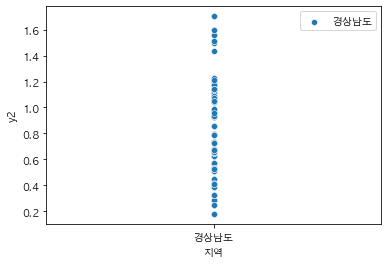

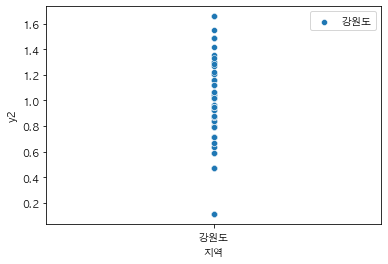

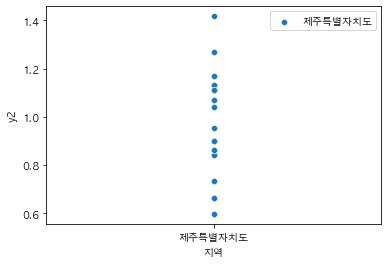

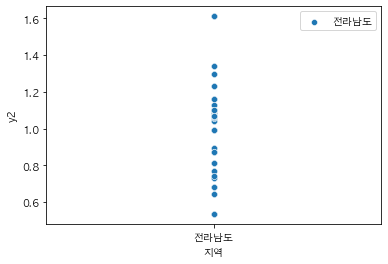

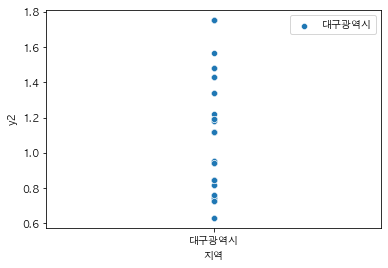

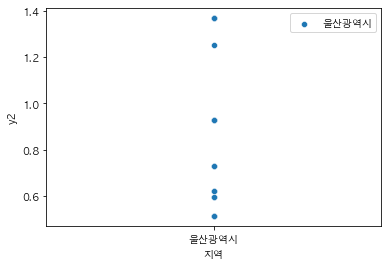

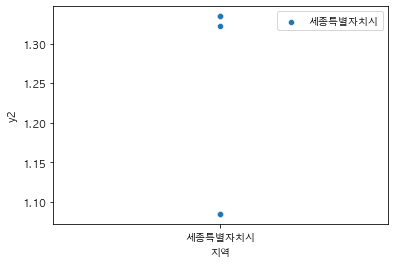

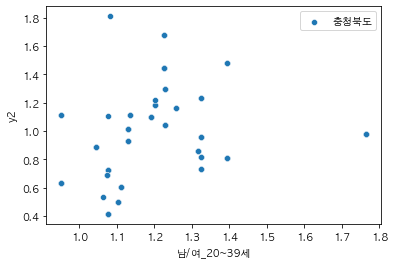

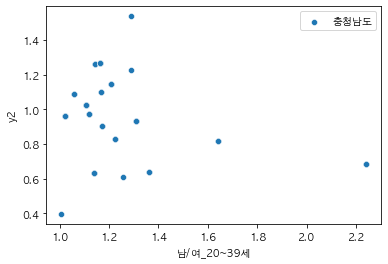

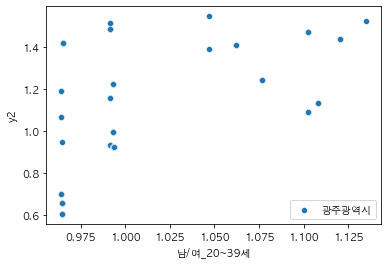

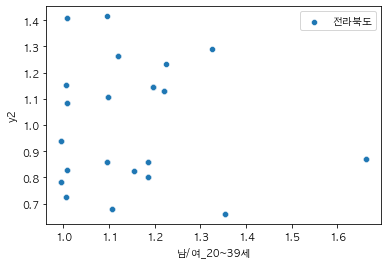

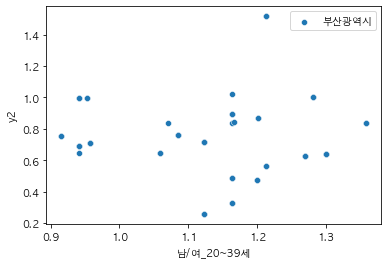

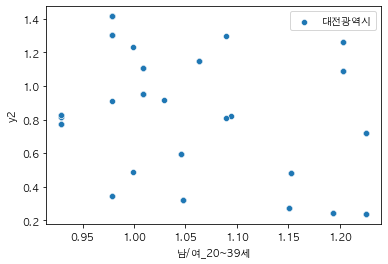

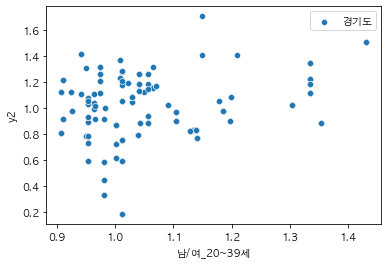

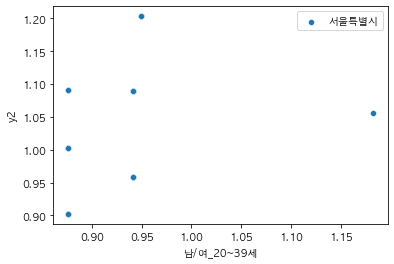

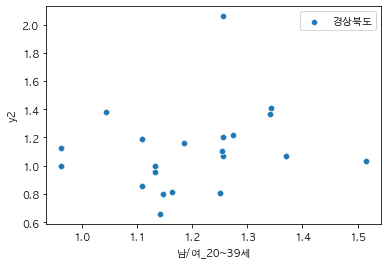

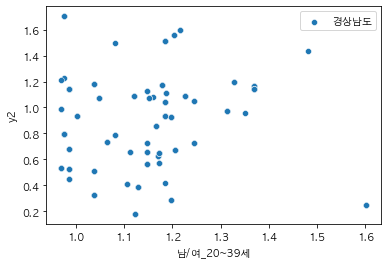

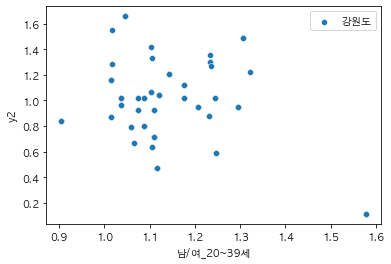

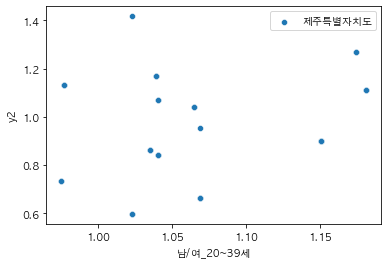

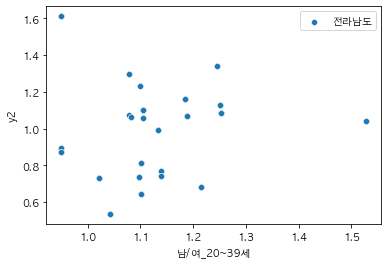

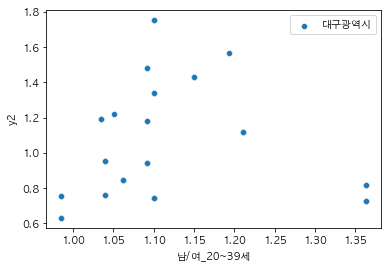

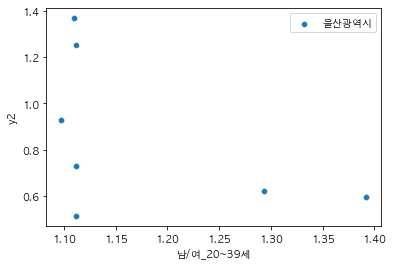

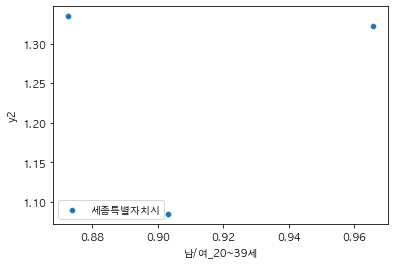

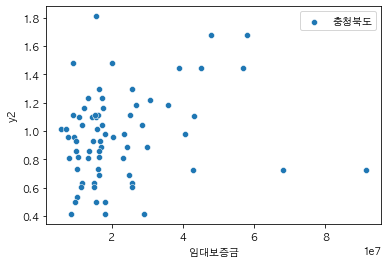

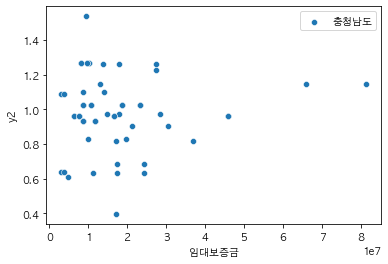

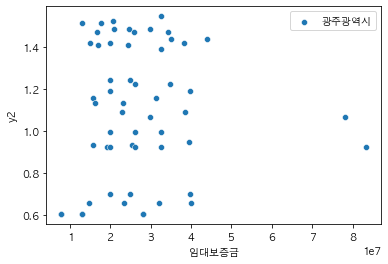

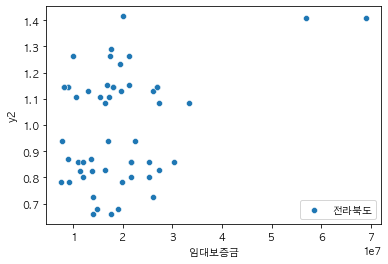

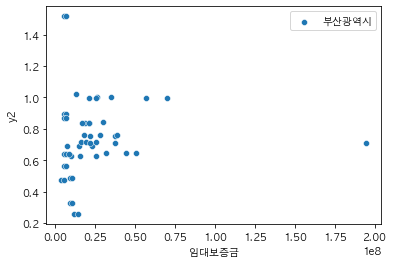

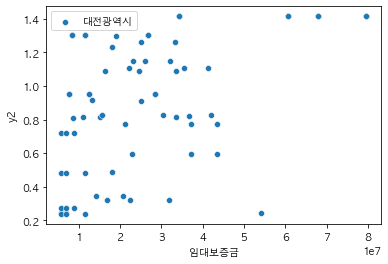

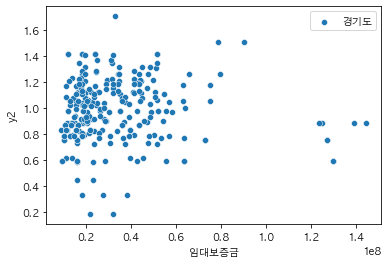

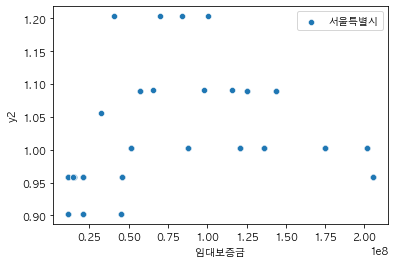

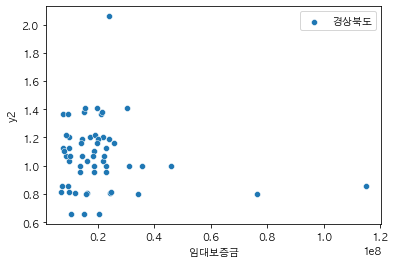

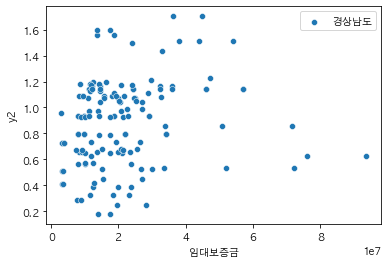

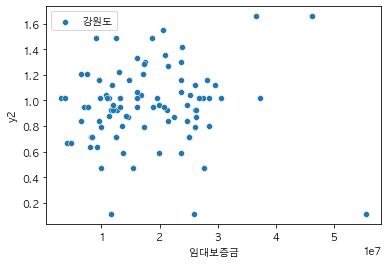

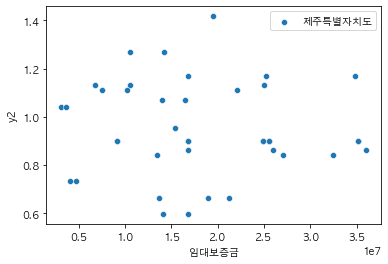

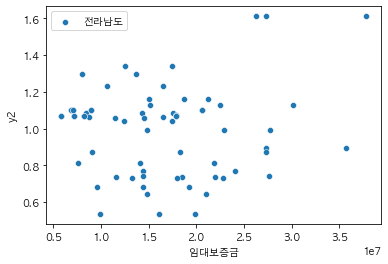

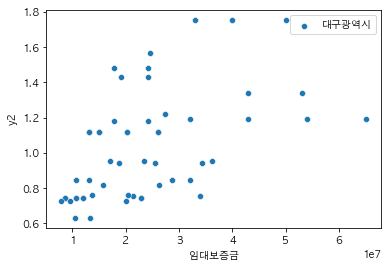

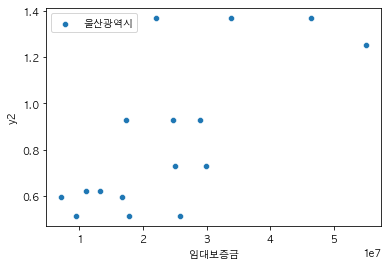

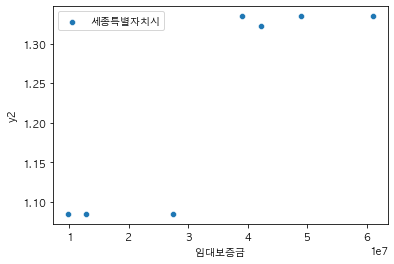

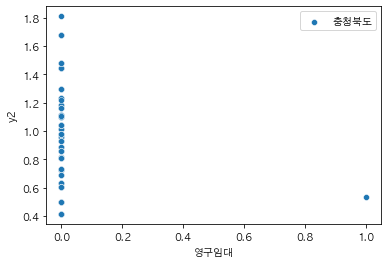

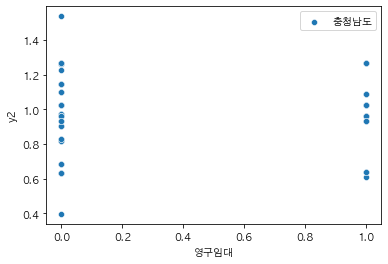

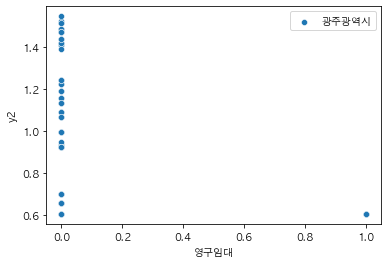

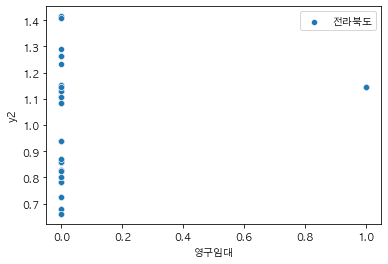

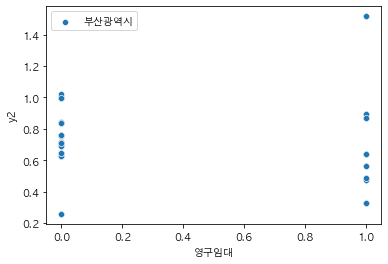

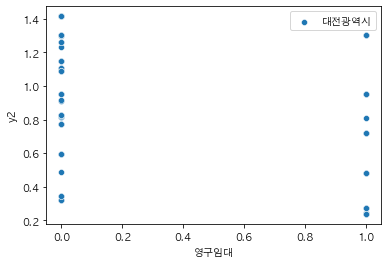

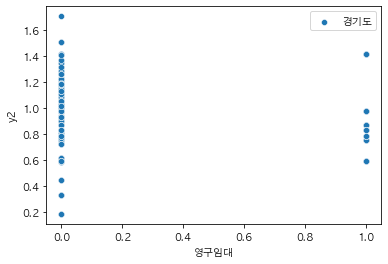

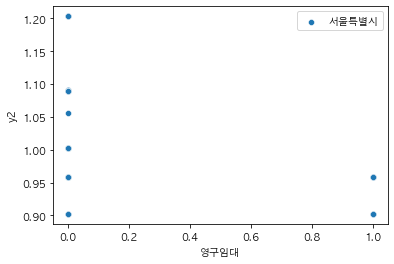

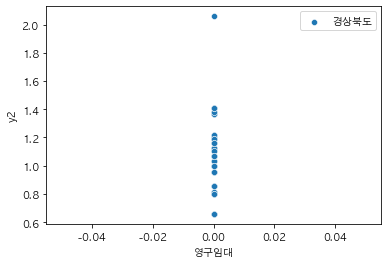

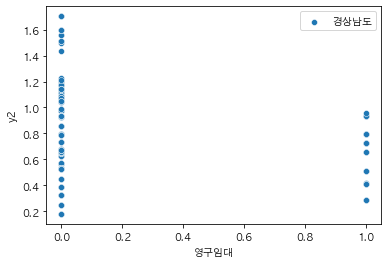

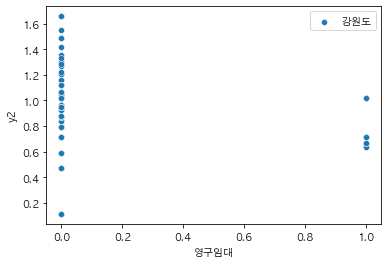

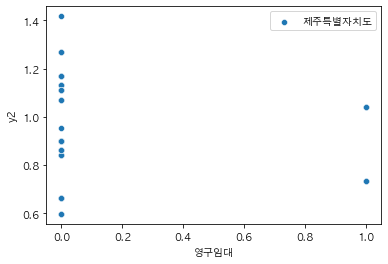

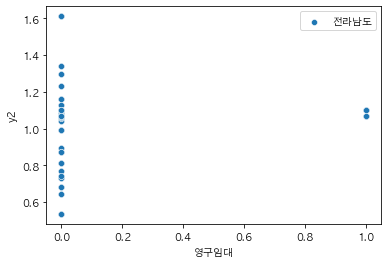

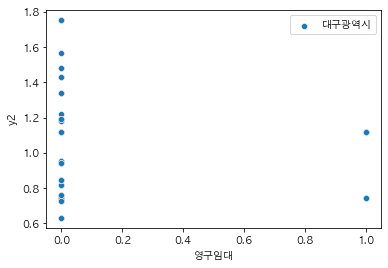

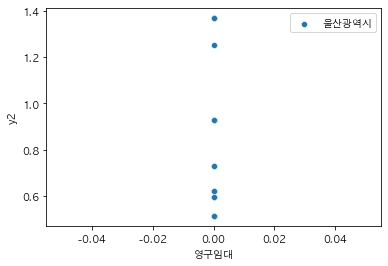

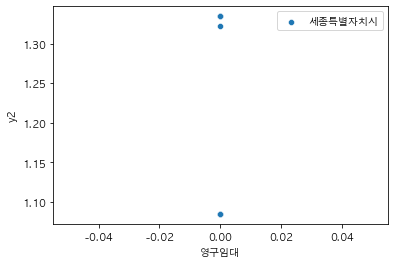

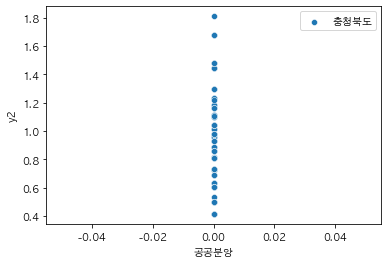

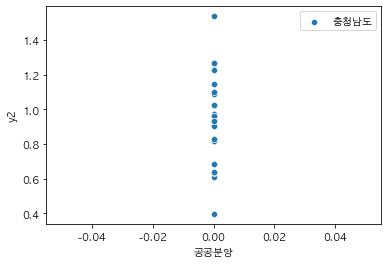

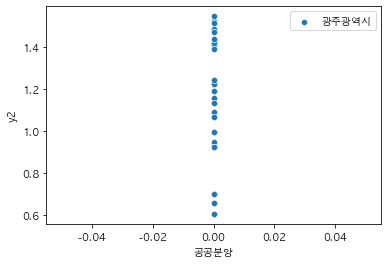

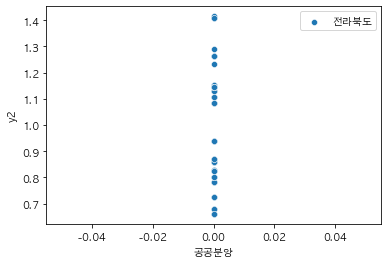

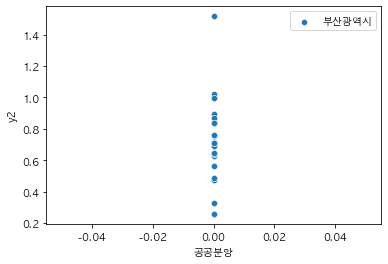

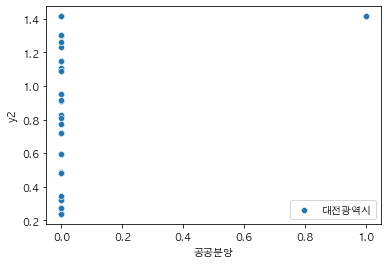

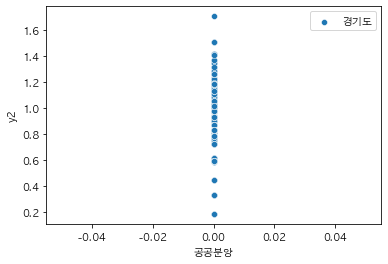

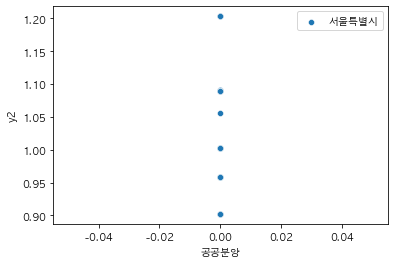

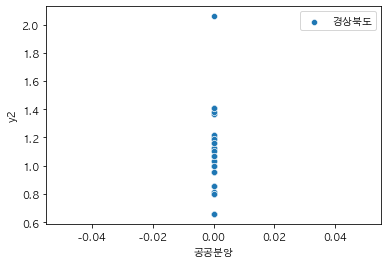

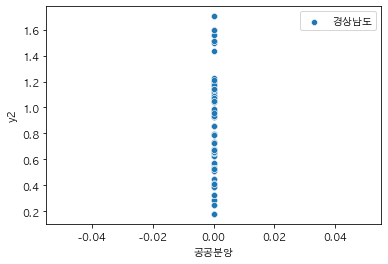

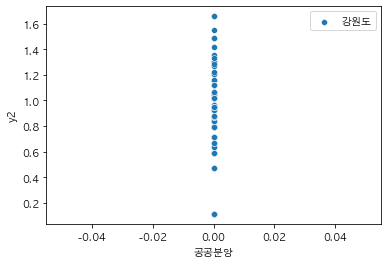

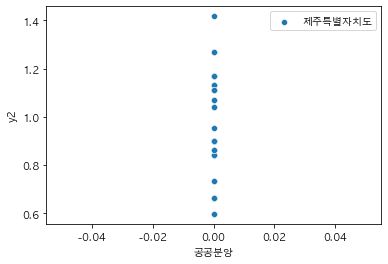

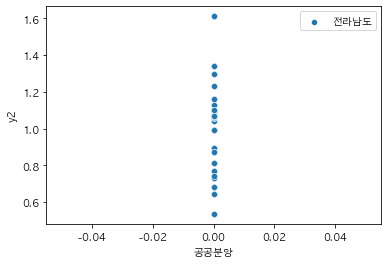

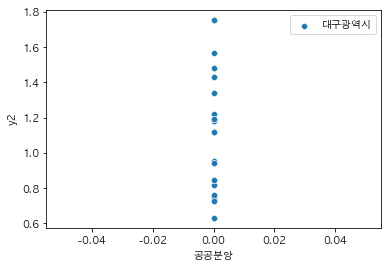

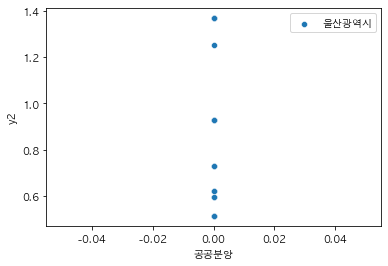

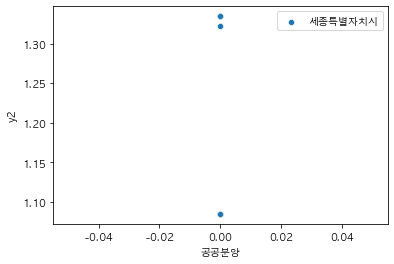

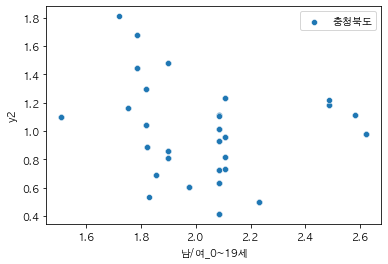

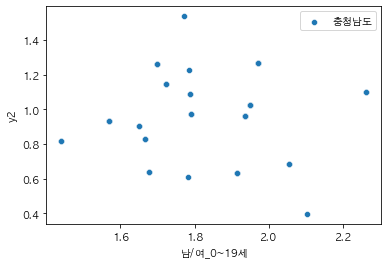

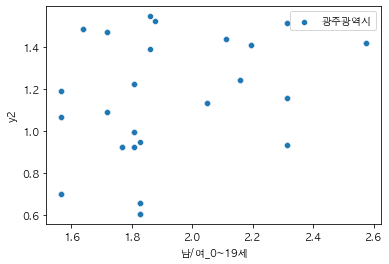

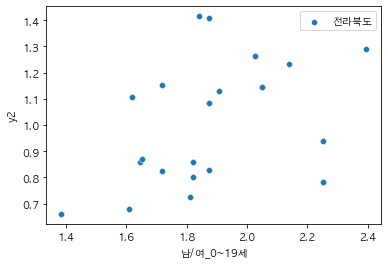

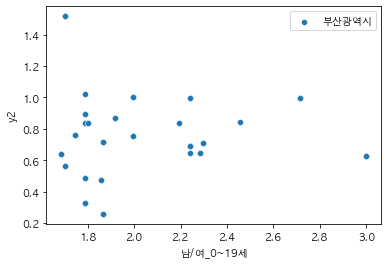

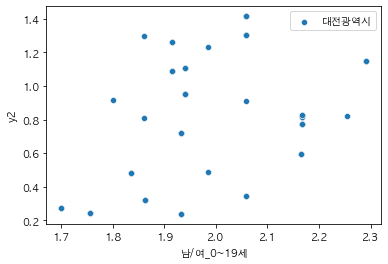

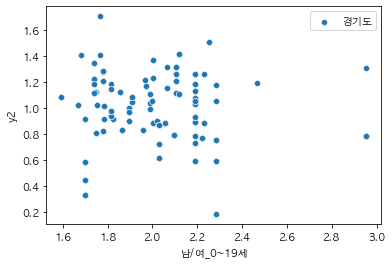

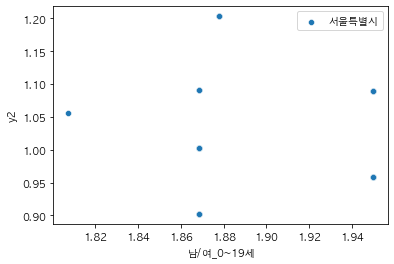

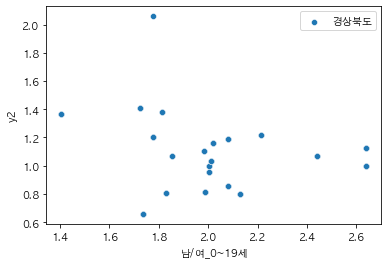

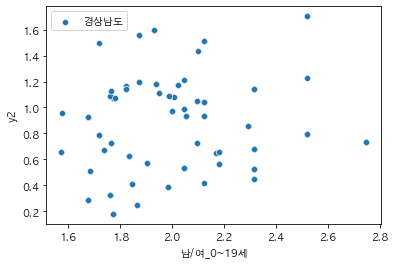

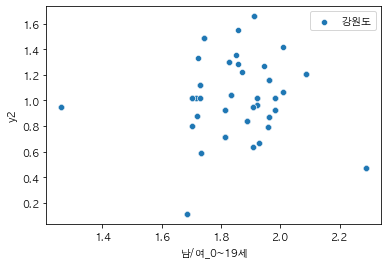

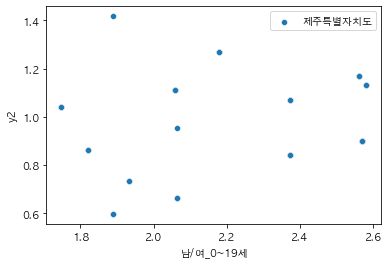

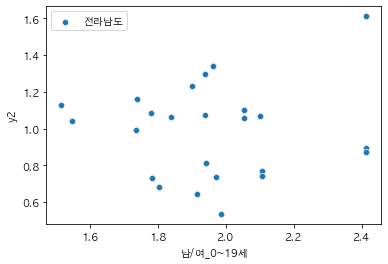

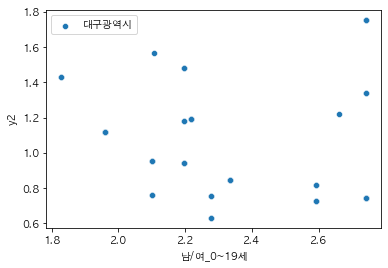

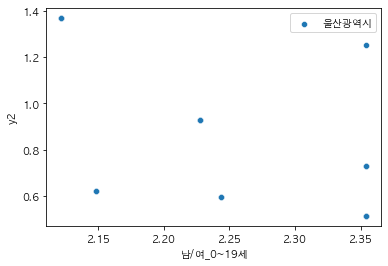

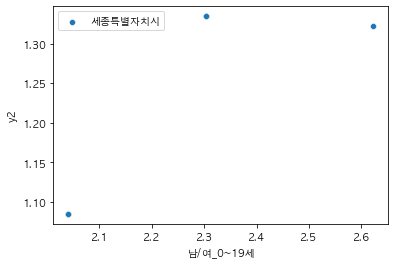

In [162]:
# plt.figure(figsize=(20,24))
#plt.figure(figsize=(8,6))
for r in coll:
    for i, d in enumerate(train.지역.unique()):
        tmp = train[train.지역 == d]
        sns.scatterplot(tmp[r],tmp["y2"],label = d)
        plt.show()


<Figure size 576x432 with 0 Axes>

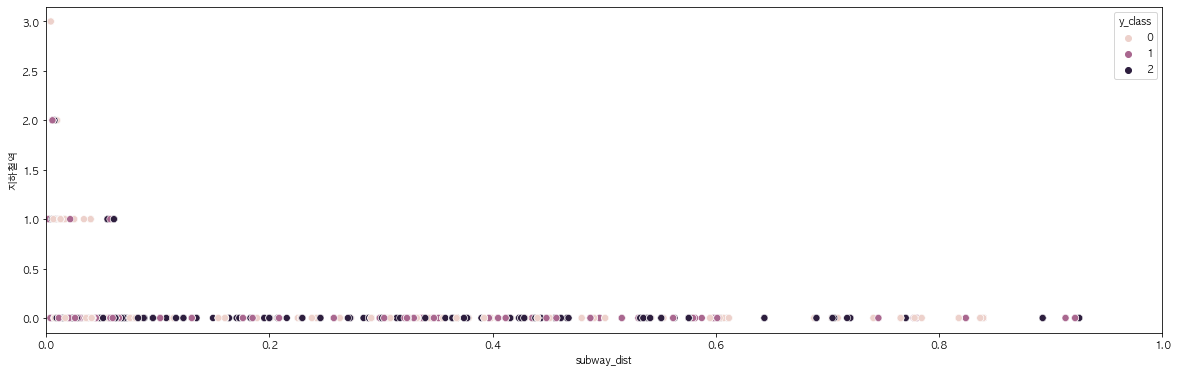

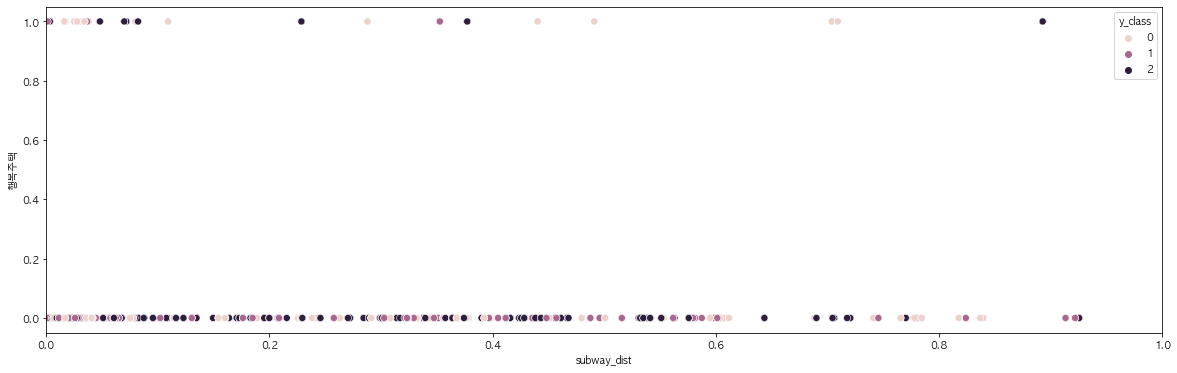

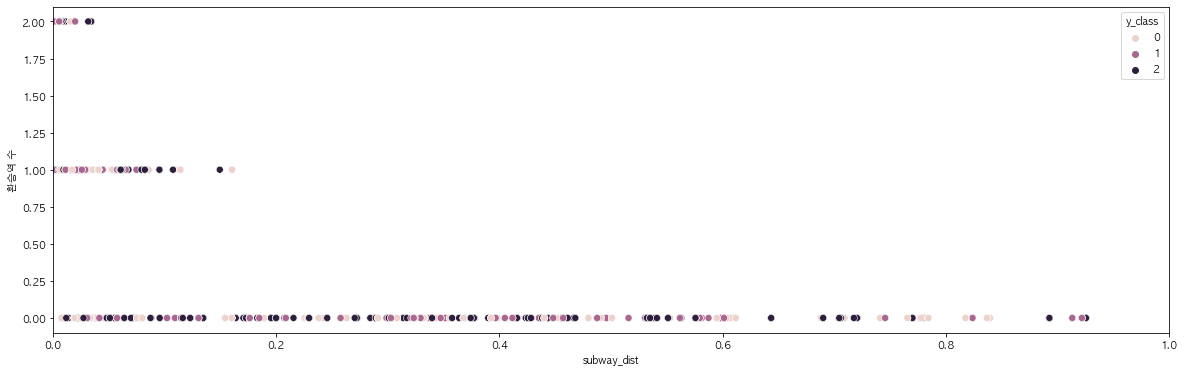

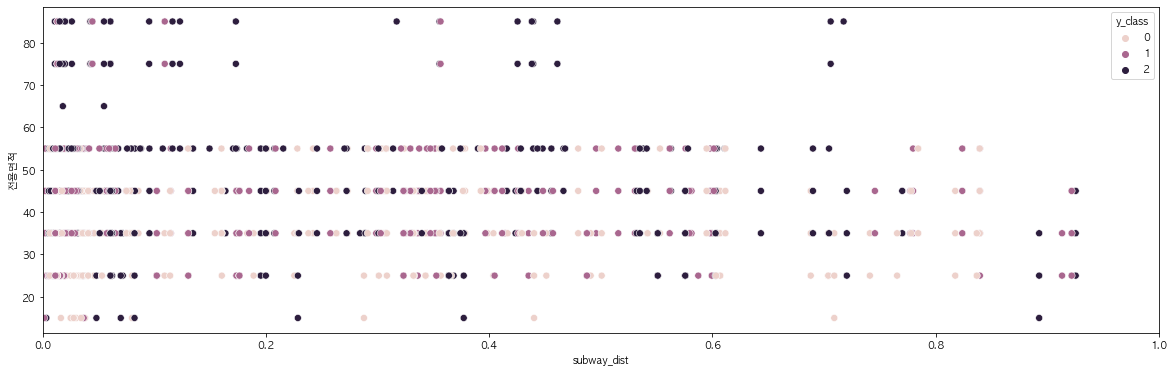

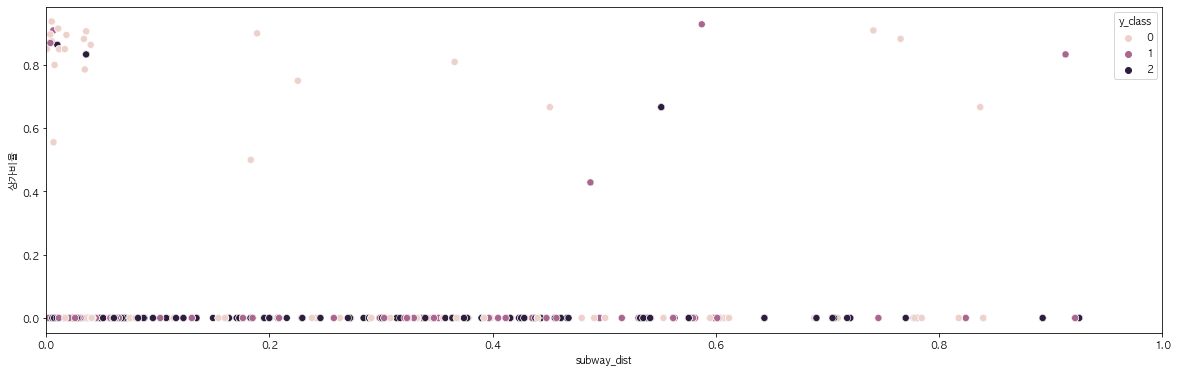

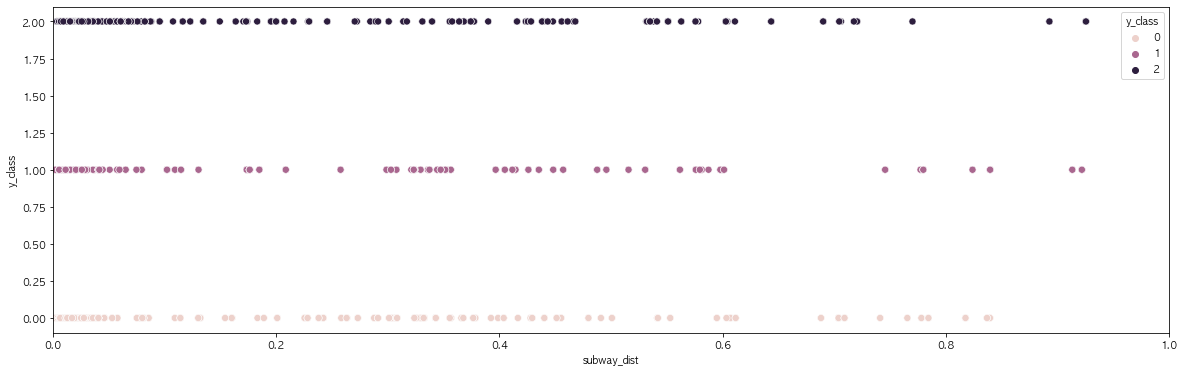

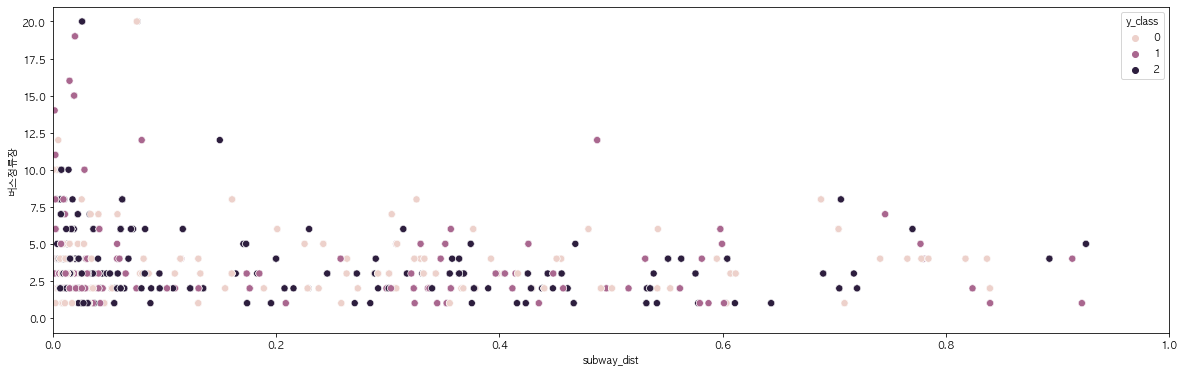

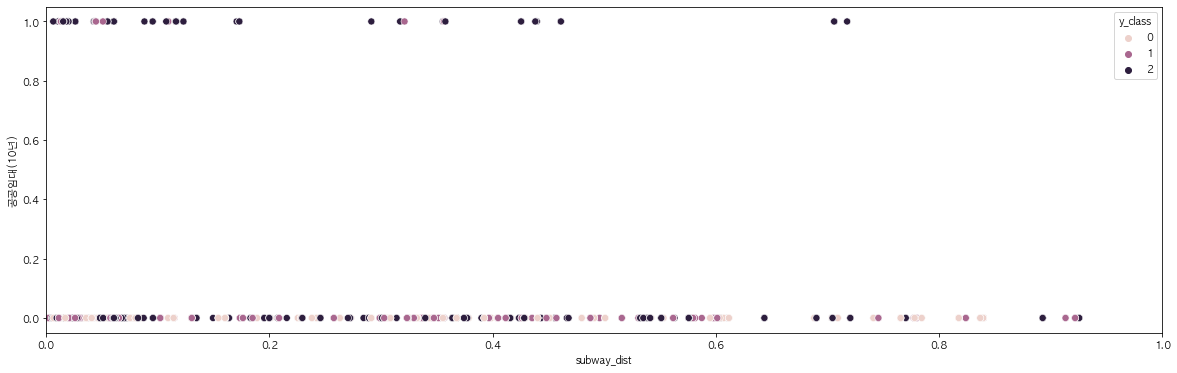

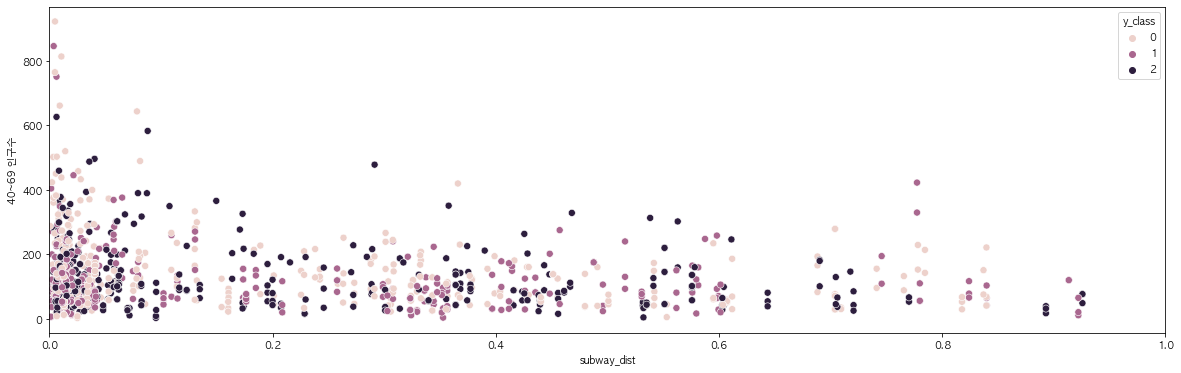

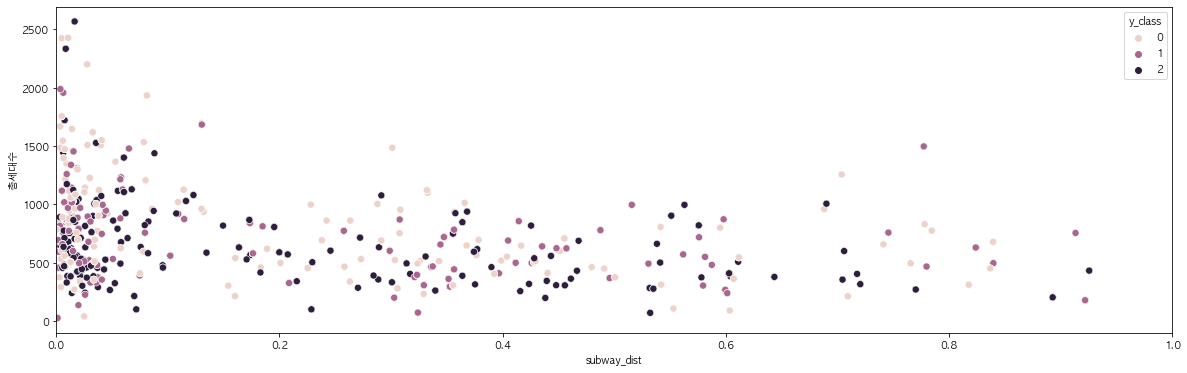

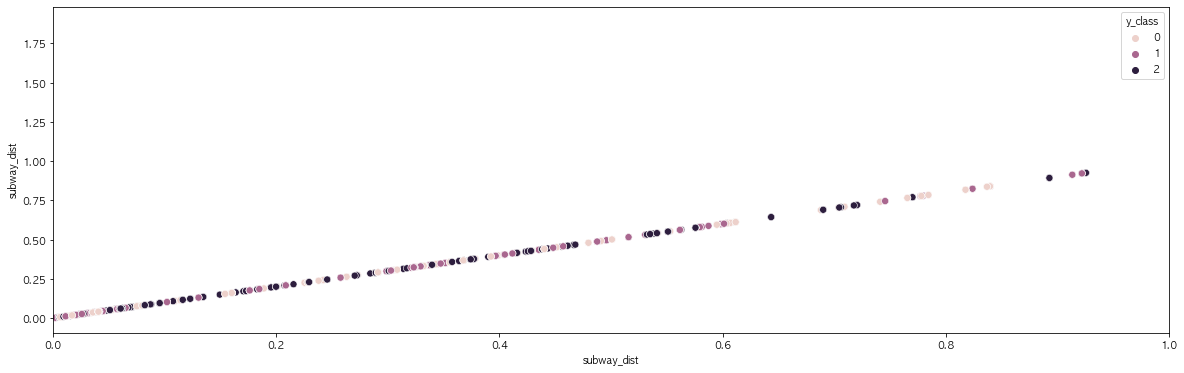

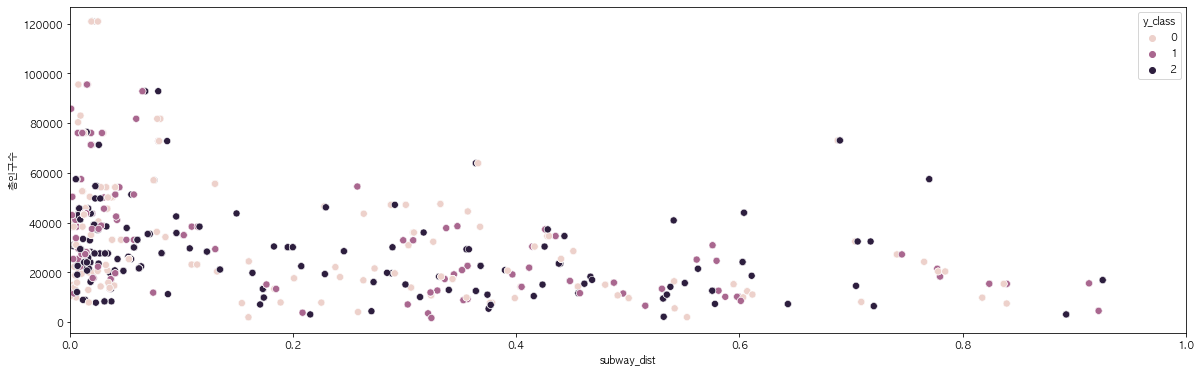

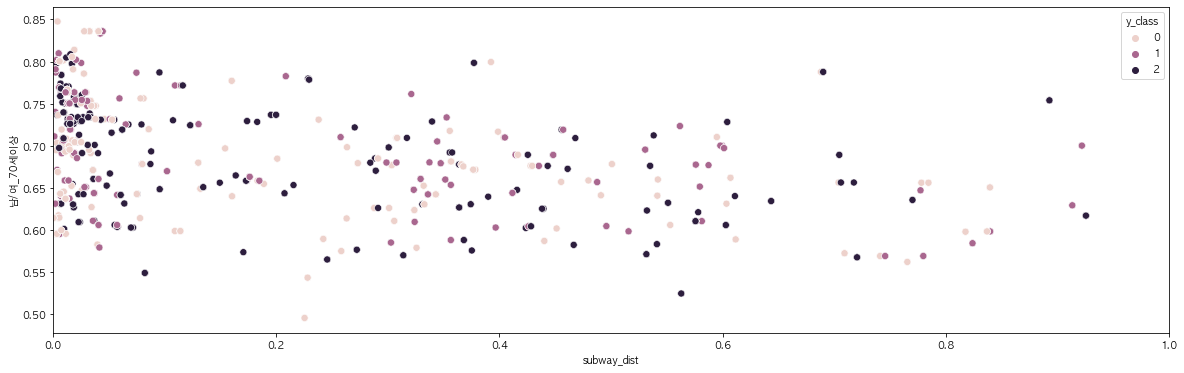

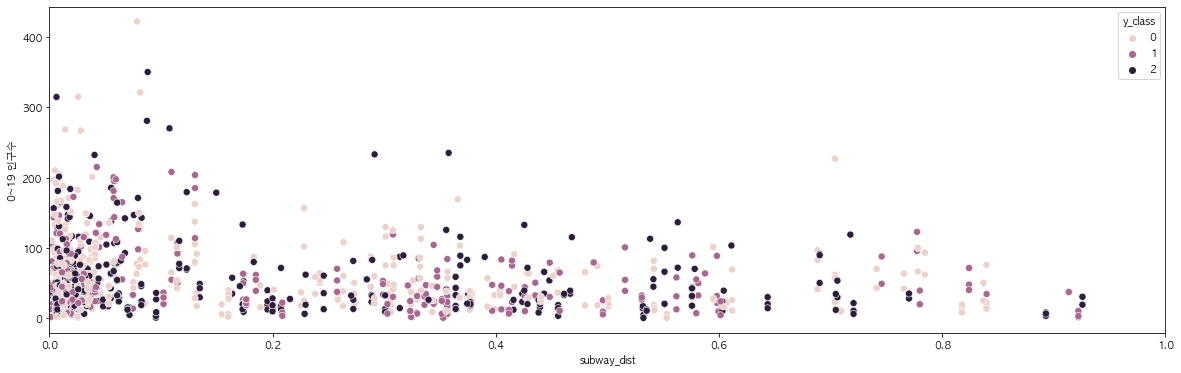

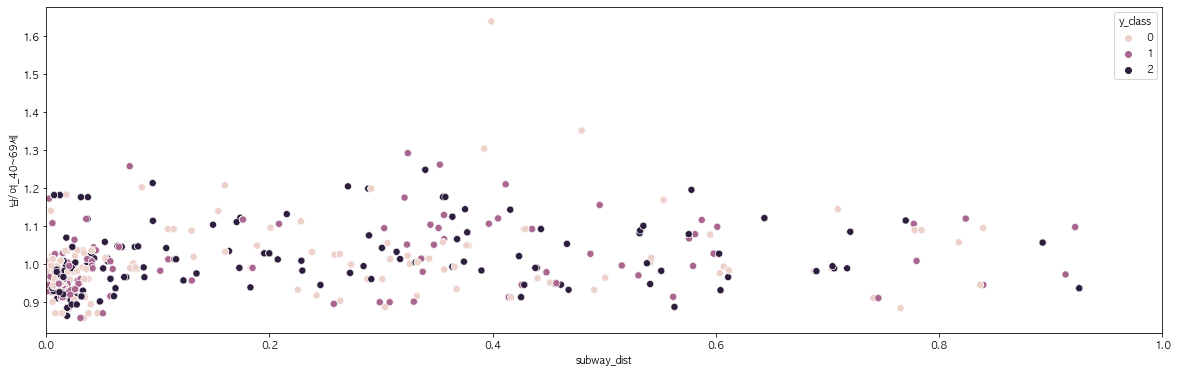

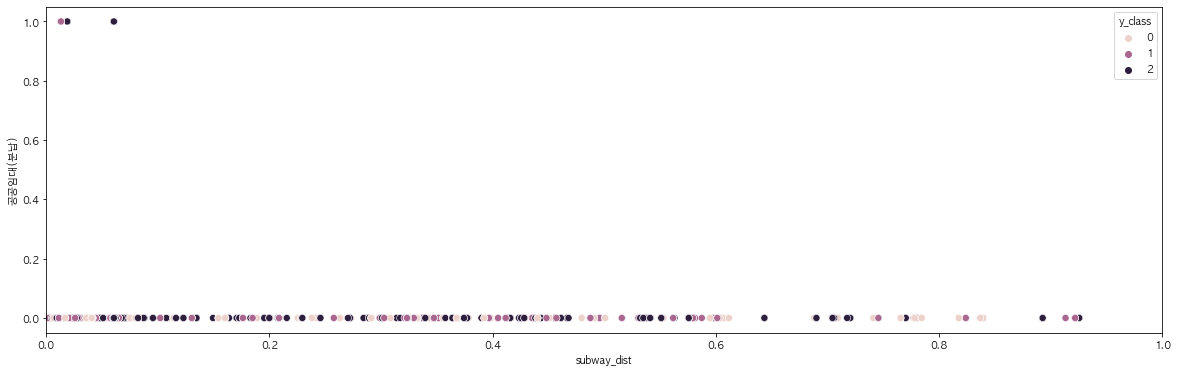

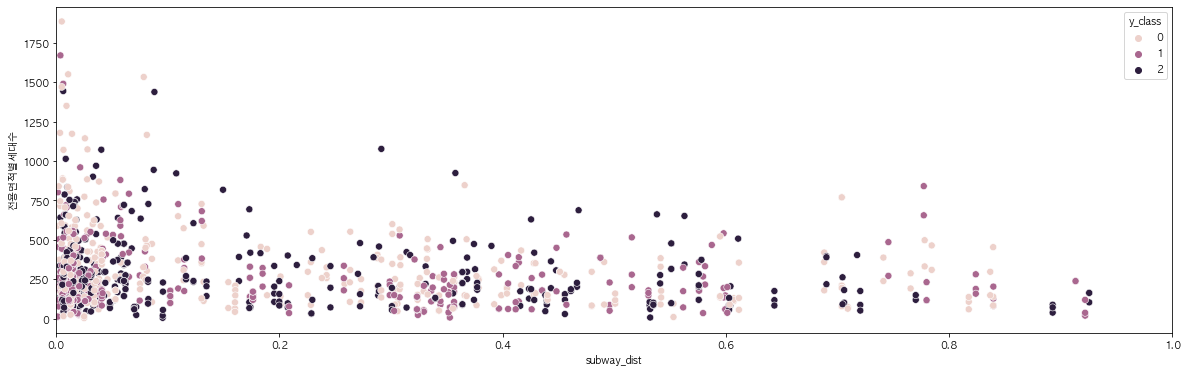

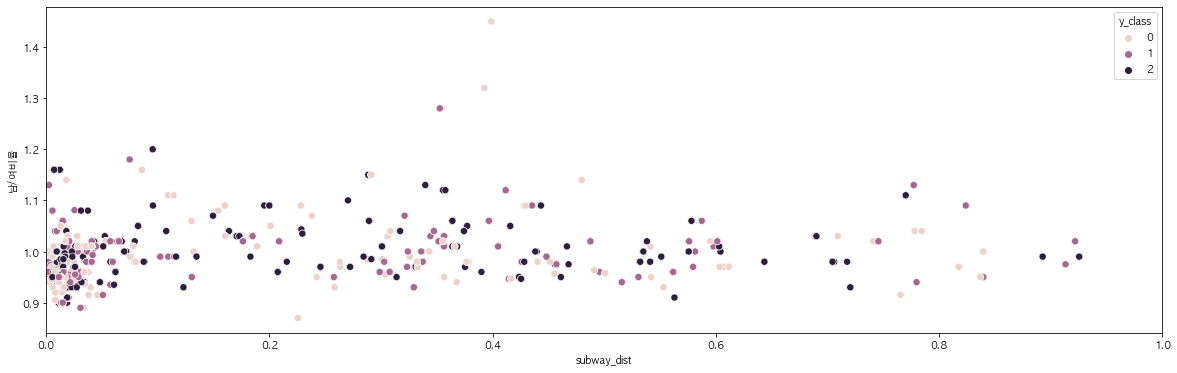

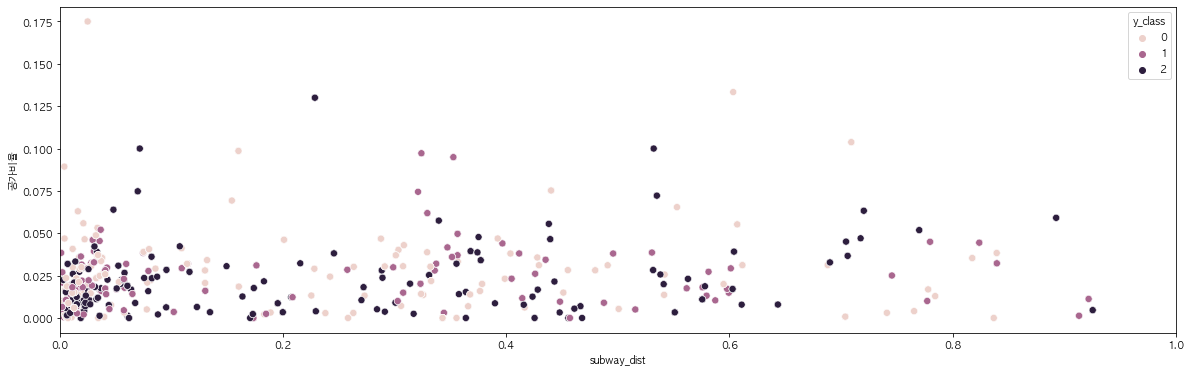

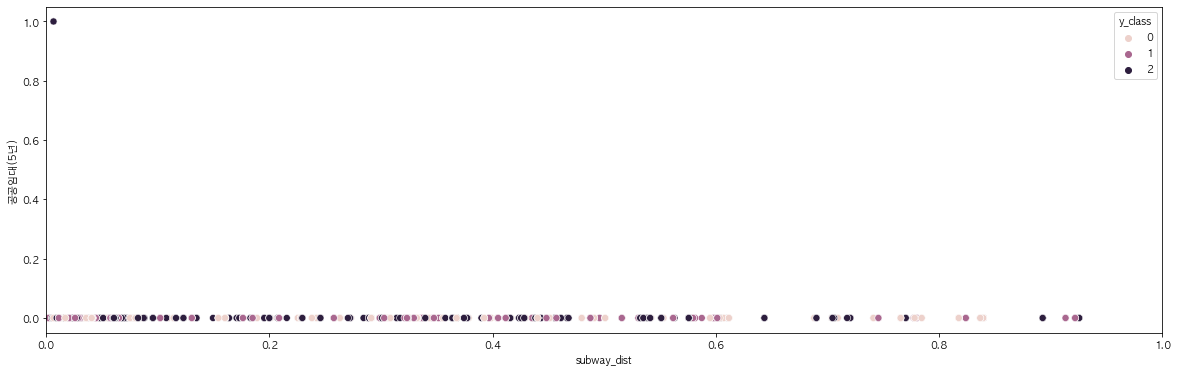

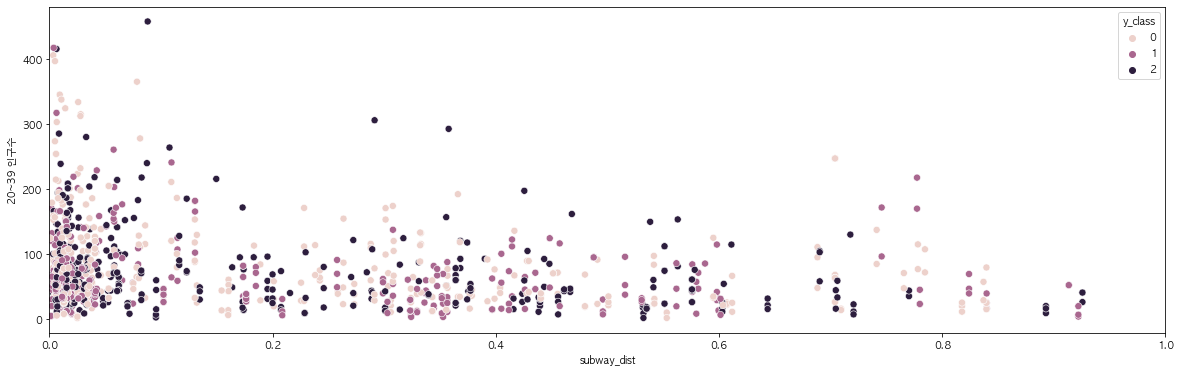

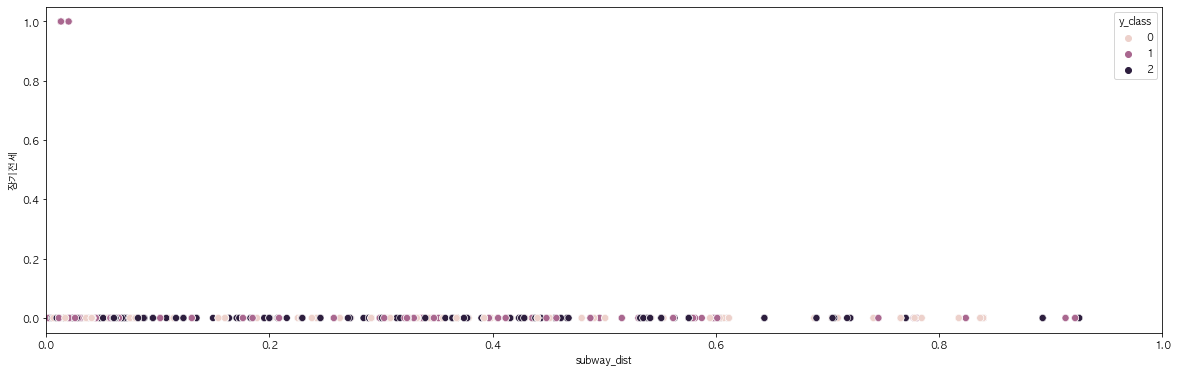

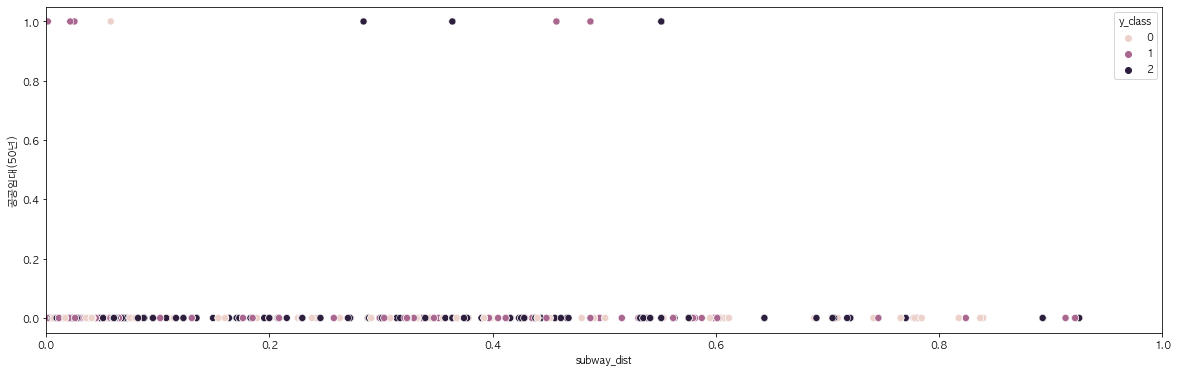

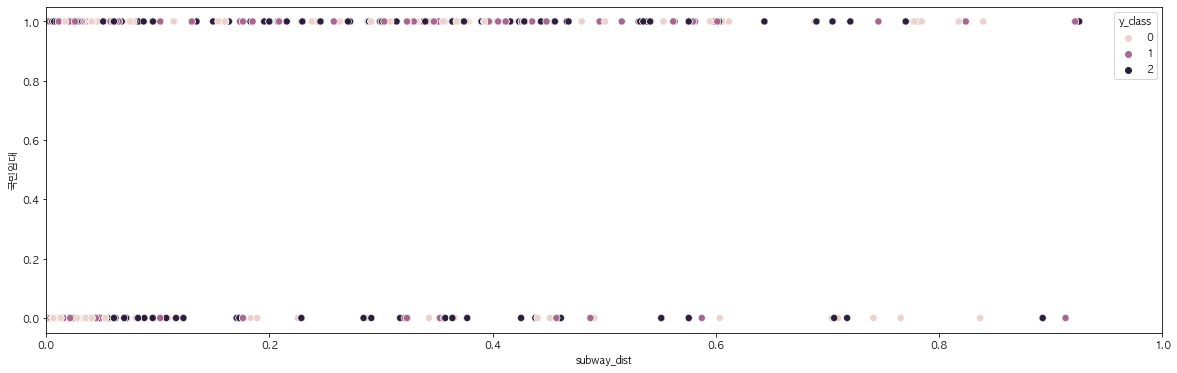

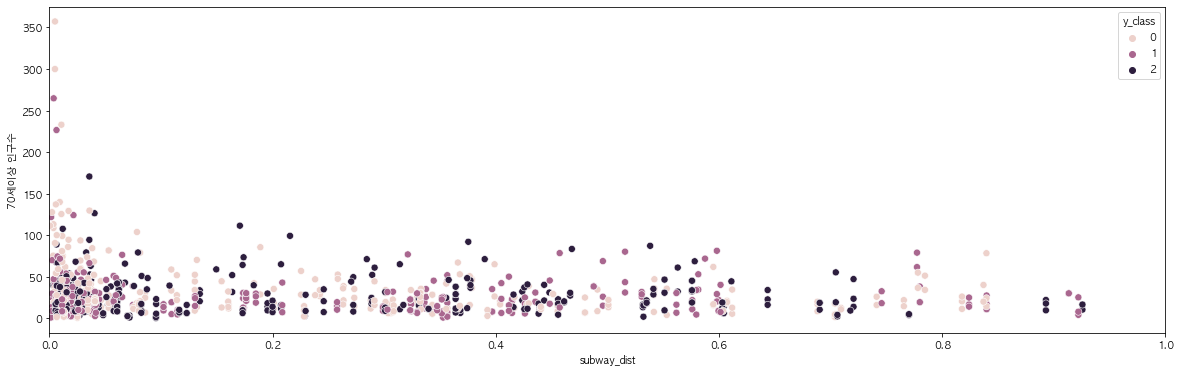

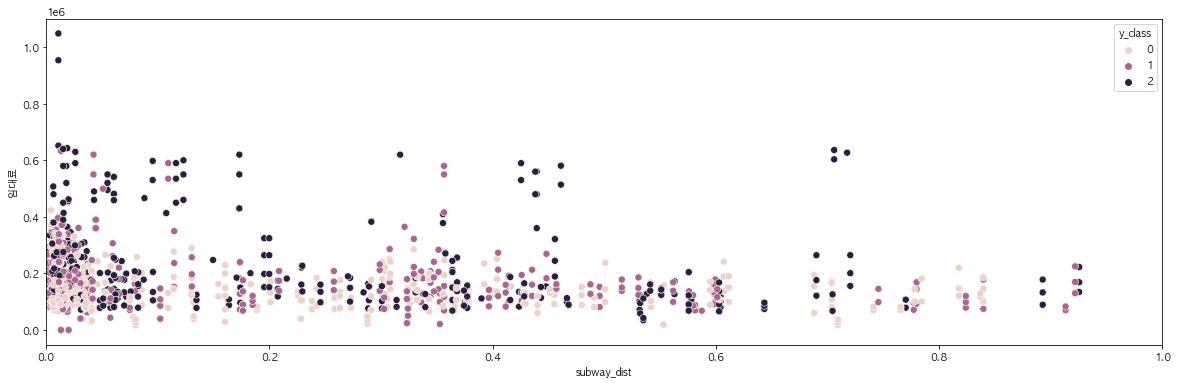

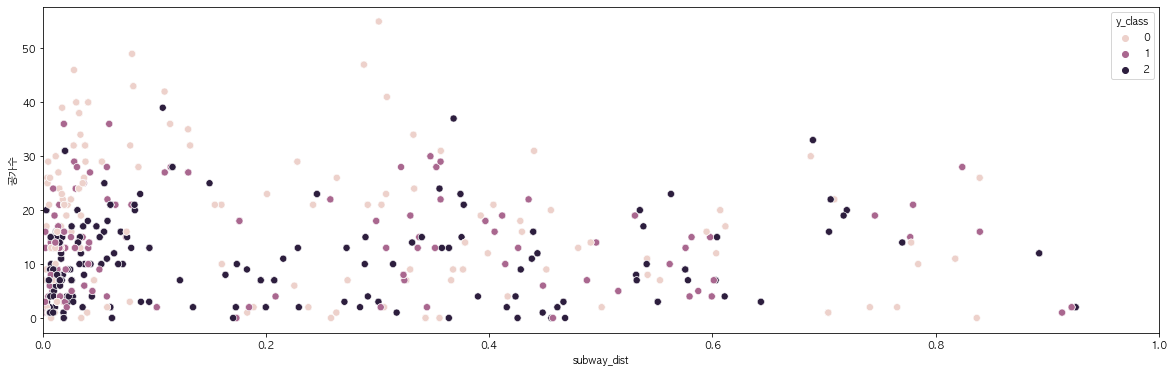

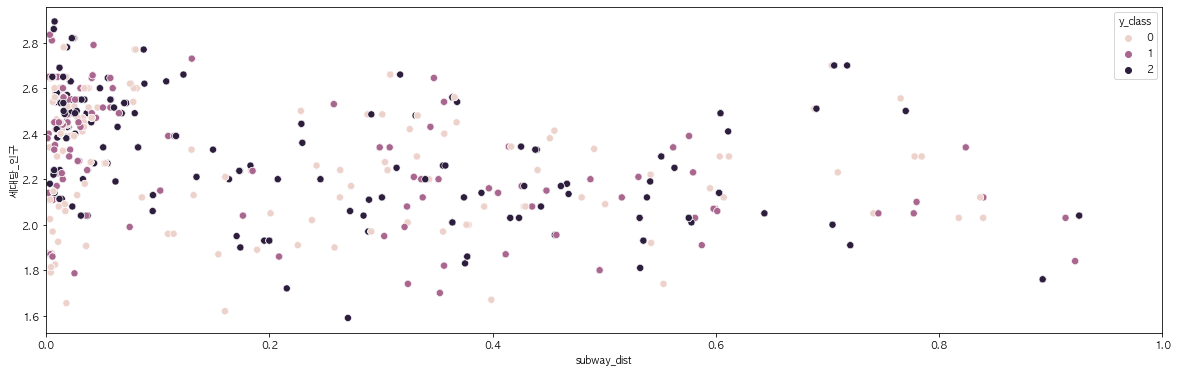

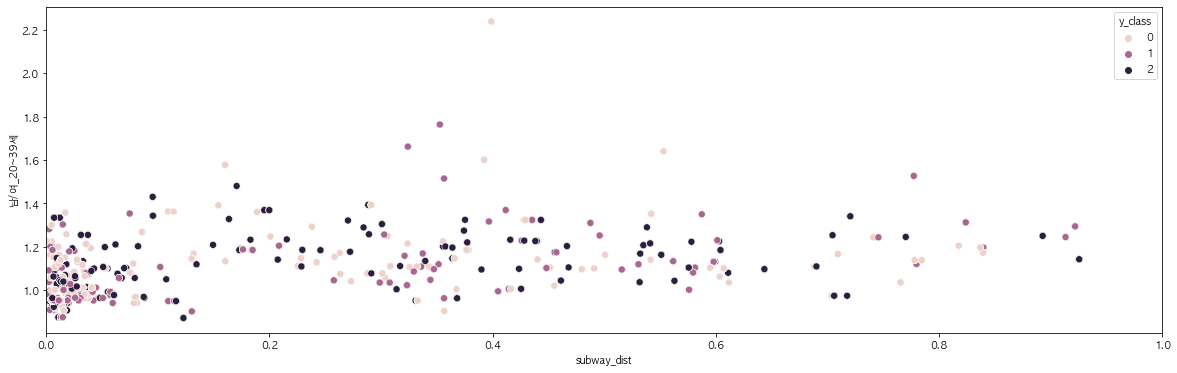

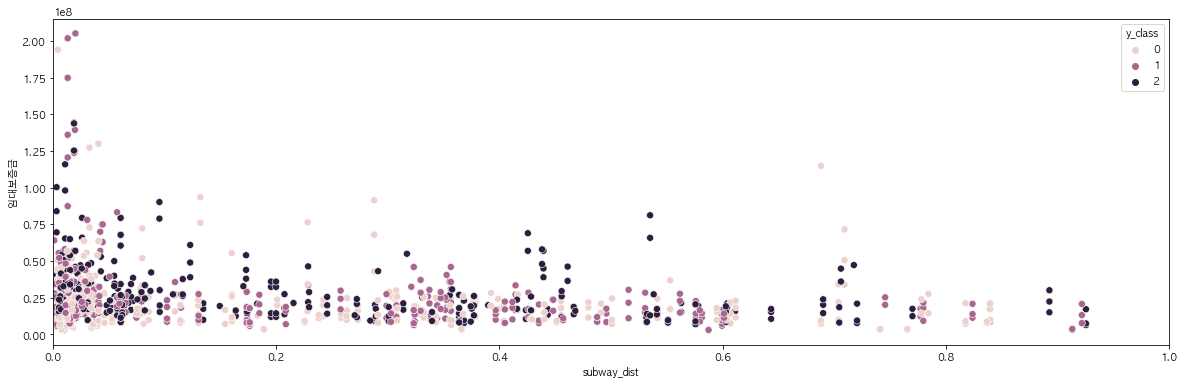

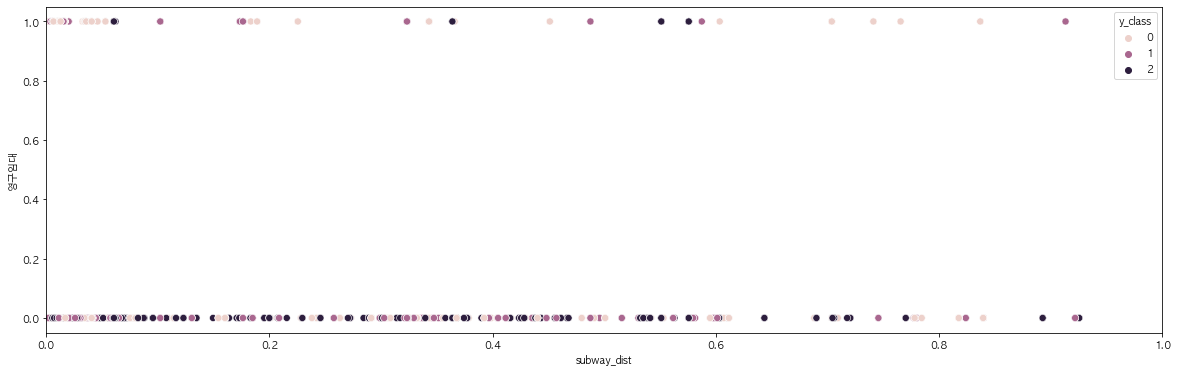

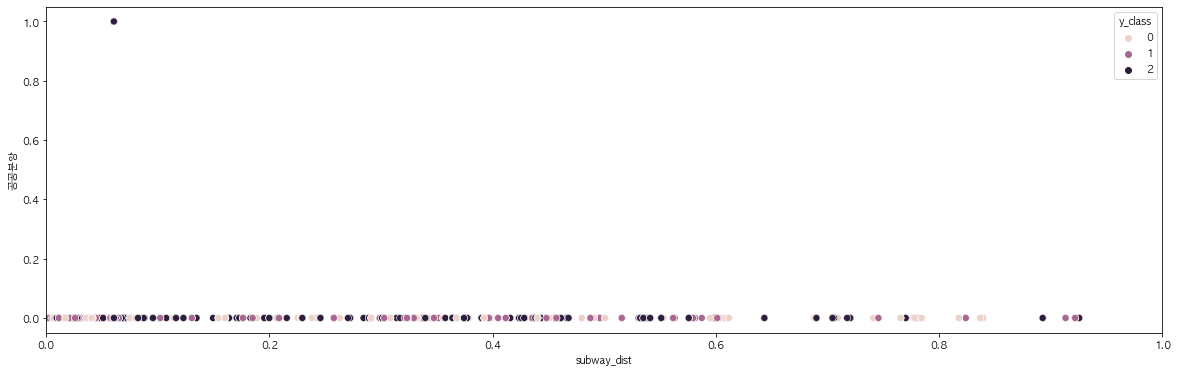

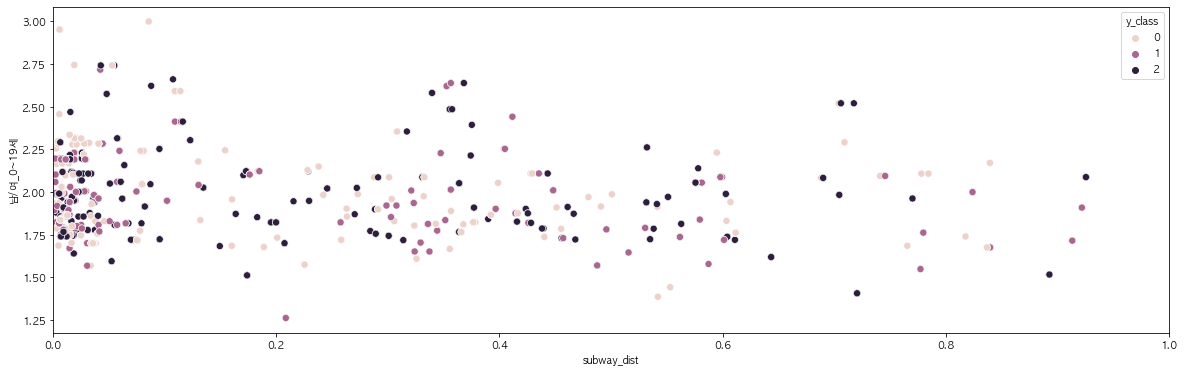

In [127]:
# tmp = train[train.subway_dist<1]
# plt.figure(figsize=(8,6))
# for r in coll:
#     plt.figure(figsize=(20,6))
#     sns.scatterplot(y = train[r],x = train["subway_dist"], hue = train.y_class,s = 50 )
#     plt.xlim((0,1))
#     plt.show()


In [179]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
#from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#import lightgbm as LGB
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
#from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn import preprocessing

In [180]:
code = pd.DataFrame()
code['단지코드'] = train['단지코드'].unique()
code = code.reset_index()
train = pd.merge(train,code,on='단지코드') #80

In [183]:
list(set(train.columns)- set(['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','y1','y2','위도','경도','공급유형','연면적','단지내주차면수_new','index']))

['지하철역',
 '행복주택',
 '환승역 수',
 '전용면적',
 '상가비율',
 '버스정류장',
 '공공임대(10년)',
 '40~69 인구수',
 '총세대수',
 'subway_dist',
 '총인구수',
 '남/여_70세이상',
 '0~19 인구수',
 '남/여_40~69세',
 '공공임대(분납)',
 '전용면적별세대수',
 '남/여비율',
 '공가비율',
 '공공임대(5년)',
 '20~39 인구수',
 '장기전세',
 '공공임대(50년)',
 '국민임대',
 '70세이상 인구수',
 '임대료',
 '공가수',
 '세대당_인구',
 '남/여_20~39세',
 '임대보증금',
 '영구임대',
 '공공분양',
 '남/여_0~19세']

In [210]:
train["전용면적*공가비율"] = train["전용면적"]*train["공가비율"]
train['임대료/전용면적'] = train["임대료"]/ train["전용면적"]
train["총세대수*전용면적"] = train["총세대수"]*train["전용면적"]

In [213]:
sel_col = ["임대료","전용면적*공가비율","공가수", '0~19 인구수','subway_dist']

In [214]:
model = [LinearRegression(), 
            PLSRegression(), 
            Ridge(random_state=2021),
            Lasso(random_state=2021), 
            ElasticNet(random_state=2021),
            SVR(),
            CatBoostRegressor(random_state=2021,loss_function='MAE',verbose=False),
            RandomForestRegressor(random_state=2021),
            GradientBoostingRegressor(random_state=2021)]
best = 100000
best_model = None


for j in model:
    s = 0
    #print(j)
    for i in [80,160,240,320,400]:
        X = train[-train['index'].isin(range(i-80,i))]
        col = ['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','y1','y2','위도','경도','공급유형','연면적','단지내주차면수_new','index']
        X_train = X.drop(col,axis=1)
        X_train = X_train[sel_col]
        y_train = X['y2']
        X = train[train['index'].isin(range(i-80,i))]
        X_test = X.drop(col,axis=1)
        X_test = X_test[sel_col]
        y_test = X['y2']

        cb = j.fit(X_train,y_train)
        pred = cb.predict(X_test)
        
        X['y2pred'] = pred
        X['y1pred'] = X['단지내주차면수_new']*X['y2pred']
        tmp1 = pd.DataFrame()
        tmp1['단지코드'] = X['단지코드'].unique()
        tmp1['y1'] = X.groupby(['단지코드']).sum()['y1'].tolist()
        tmp1['y1pred'] = X.groupby(['단지코드']).sum()['y1pred'].tolist()
        error = mean_absolute_error(tmp1['y1pred'],tmp1['y1'])
#         print(error)
        s += error
    #print('----done----')
    print(j,s/5)
    if s/5 < best:
        best_model = j
        best = s/5
print('----result----')
print(best_model,best)

LinearRegression() 123.17144489822033
PLSRegression() 123.84040747877228
Ridge(random_state=2021) 123.17198858068602
Lasso(random_state=2021) 133.49607261502814
ElasticNet(random_state=2021) 129.49409216887324
SVR() 130.905265414306
<catboost.core.CatBoostRegressor object at 0x7fb4c292f8e0> 121.18813172689693
RandomForestRegressor(random_state=2021) 125.87289367606309
GradientBoostingRegressor(random_state=2021) 126.49458524448008
----result----
<catboost.core.CatBoostRegressor object at 0x7fb4c292f8e0> 121.18813172689693


In [111]:
code = train[-train['index'].isin(range(0,80))]['단지코드'].unique()

In [112]:
X = train[-train['index'].isin(range(0,80))]
col = ['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','y1','y2','공급유형','연면적','단지내주차면수_new','index']
X_train = X.drop(col,axis=1)
y_train = X['y2']
X = train[train['index'].isin(range(0,80))]
X_test = X.drop(col,axis=1)
y_test = X['y2']

rf = RandomForestRegressor(random_state=2021).fit(X_train,y_train)
pred = rf.predict(X_test)

cb = CatBoostRegressor(random_state=2021,loss_function='MAE',verbose=False).fit(X_train,y_train)
pred2 = cb.predict(X_test)

In [113]:
train.shape

(1169, 49)

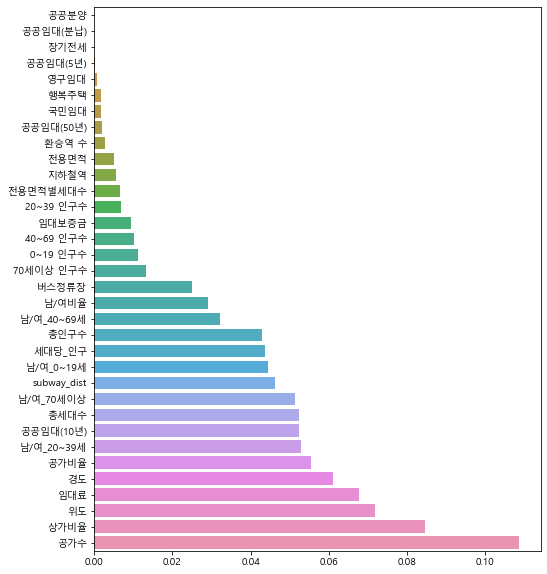

In [114]:
plt.figure(figsize=(8,10))
sns.barplot(y = X_test.columns[np.argsort(rf.feature_importances_)], x = list(rf.feature_importances_[np.argsort(rf.feature_importances_)]))

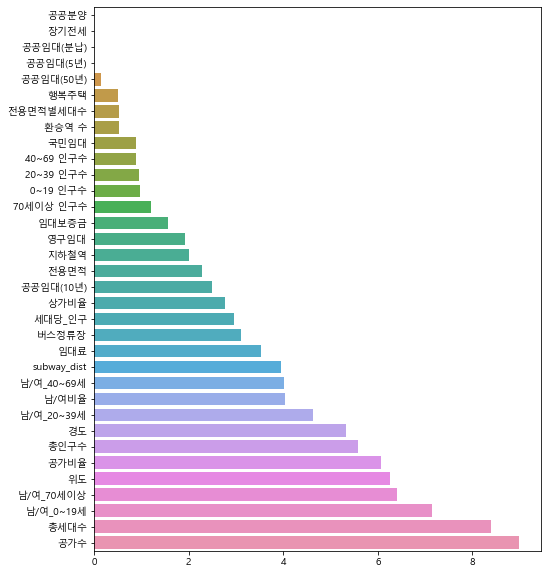

In [115]:
plt.figure(figsize=(8,10))
sns.barplot(y = X_test.columns[np.argsort(cb.feature_importances_)], x = list(cb.feature_importances_[np.argsort(cb.feature_importances_)]))

In [116]:
set(test.columns) - set(train.columns)

set()

In [117]:
col = ['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','y1','y2','공급유형','연면적','단지내주차면수_new','index']
X_train = train.drop(col,axis=1)
y_train = train['y2']
col = ['단지코드','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','공급유형','연면적','단지내주차면수_new']
X_test = test.drop(col,axis=1)

rf = RandomForestRegressor(random_state=2021).fit(X_train,y_train)
pred = rf.predict(X_test)

cb = CatBoostRegressor(random_state=2021,loss_function='MAE',verbose=False).fit(X_train,y_train)
pred2 = cb.predict(X_test)

In [118]:
test['y2pred_rf'] = pred
test['y1pred_rf'] = test['단지내주차면수_new']*test['y2pred_rf']
test['y2pred_cb'] = pred2
test['y1pred_cb'] = test['단지내주차면수_new']*test['y2pred_cb']
res = pd.DataFrame()
res['단지코드'] = test['단지코드'].unique()
res['rf'] = test.groupby(['단지코드']).sum()['y1pred_rf'].tolist()
res['cb'] = test.groupby(['단지코드']).sum()['y1pred_cb'].tolist()
res['지역'] = test.groupby(['단지코드'])['지역'].unique().tolist()
res['공급유형'] = test.groupby(['단지코드'])['공급유형'].unique().tolist()
res['단지내주차면수'] = test.groupby(['단지코드']).mean()['단지내주차면수'].tolist()

In [119]:
mae94 = pd.read_csv("result/MAE_94.csv")
mae96 = pd.read_csv("0728.csv")

In [120]:
final = pd.merge(res[['단지코드','rf','cb']],mae94,left_on='단지코드',right_on='code',how='left').rename(columns={'num':'mae94'})
final = pd.merge(final,mae96,left_on='단지코드',right_on='code',how='left').rename(columns={'num':'mae96'})
final = final.drop(['code_x','code_y'],axis=1)

In [121]:
code = test[test['단지내주차면수']<=987]['단지코드'].unique()
tmp = final[-final['단지코드'].isin(code)]

In [122]:
submit = final[['단지코드','rf']]
submit.columns = ['code','num']
submit.loc[147,:] = ['C1327',0]
submit.loc[148,:] = ['C2335',0]
submit.loc[149,:] = ['C2675',0]

In [123]:
submit.to_csv("0728.csv",index=False)

In [124]:
print(mean_absolute_error(final['rf'],final['mae96']))
print(mean_absolute_error(final['cb'],final['mae96']))

3.3206997242665904e-14
34.705071431366044


In [125]:
print(mean_absolute_error(tmp['rf'],tmp['mae96']))
print(mean_absolute_error(tmp['cb'],tmp['mae96']))

4.786814219857517e-14
74.72949098770418


In [126]:
def plot(x):
    df = area[area['지역']==x]
    n = df['공급유형'].nunique()
    fig,ax = plt.subplots(n,1,figsize=(25,15))
    for ind,i in enumerate(df['공급유형'].unique()):
        df1 = df[df['공급유형']==i]
        sns.histplot(data=df1,x='y2',ax=ax[ind],bins=20,label=x+i)
        ax[ind].legend()

In [ ]:
for i in train['지역'].unique():
    plot(i)

In [ ]:
area[(area['지역']=='전라북도')&(area['공급유형']=='행복주택')][['단지코드','y2']]

In [ ]:
def plot2():
    n = train['지역'].nunique()
    fig,ax = plt.subplots(n,1,figsize=(15,60))
    for ind,i in enumerate(train['지역'].unique()):
        df = train[train['지역']==i]
        sns.histplot(data=df,x='y2',ax=ax[ind],bins=20,label=i)
        ax[ind].legend()

In [ ]:
plot2()